In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
from shelllock import PyCCELL_PRFQT as px

In [2]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (8,5)
sns.set_palette("colorblind")

In [11]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i])
    return end_point

In [19]:
targets = px.mainf('../../data/050123.xlsx'
               ,1,'col',['K8','L8','M8'])

'''
pour le gain c'est 

0: le premier que tu as mis
1: le 2eme
2: le 3 eme
3: le 4 eme

''' 

"\npour le gain c'est \n\n0: le premier que tu as mis\n1: le 2eme\n2: le 3 eme\n3: le 4 eme\n\n"

In [20]:
# For the correction 

correction = [186,2100,3410,283567] # correction pour 50,70,75,100 de gain et sur le synergy 

# apres tu peux faire

#c = [x for x in targets.columns if x != 'Time'] # columns to be corrected
#targets = targets[c]/correction[x] 

In [21]:
targets.dropna(axis=1,inplace=True) # enlève les colonnes N,O,P de 4 à 11 (y'avais rien dedans)
targets

['H2', 'I2', 'J2']  ['K2', 'L2', 'M2']  ['N2', 'O2', 'P2']  \
0         36866.666667            0.000000        34660.333333   
1         11636.666667          268.333333        18799.666667   
2          8023.666667          100.666667         8040.666667   
3          8114.000000           61.000000         7782.666667   
4          7907.000000          207.333333         7821.333333   
5          7808.666667          106.000000         7791.666667   
6          7647.666667            0.000000         7731.000000   
7          7579.000000           24.333333         7975.000000   
8          7631.666667            0.000000         7699.666667   
9          7804.333333            0.000000         7568.000000   
10         7733.000000            0.000000         7950.333333   
11         7477.000000            0.000000         7664.333333   
12         7574.333333            0.000000         8045.000000   
13         7615.666667            0.000000         7834.666667   
14         7539.000000            0.000000         7391.000000   
15         7688.333333            0.000000         7856.666667   
16         7505.000000            0.000000         7699.000000   
17         7878.666667            0.000000         7616.000000   
18         7679.666667            0.000000         7712.333333   
19         8030.000000            0.000000         8241.000000   
20         7831.666667            0.000000         7953.000000   
21         7570.000000            0.000000         7597.333333   
22         7809.333333            0.000000         7721.000000   
23         7524.333333            0.000000         7597.000000   
24         7714.333333            0.000000         7931.000000   
25         7294.666667            0.000000         7575.333333   
26         7627.666667            0.000000         7708.333333   
27         7507.000000            0.000000         7721.000000   
28         7728.666667            0.000000         7990.000000   
29         7546.000000            0.000000         8091.666667   
30         7971.000000            0.000000         8091.666667   
31         7727.333333            0.000000         8165.333333   
32         7531.666667            0.000000         7864.333333   

    ['H3', 'I3', 'J3']  ['K3', 'L3', 'M3']  ['N3', 'O3', 'P3']  \
0            22.000000        15818.666667            0.000000   
1          1722.000000         4479.000000         1704.666667   
2          1130.000000         4726.000000         1414.333333   
3          1233.666667         4387.000000         1481.000000   
4          1180.000000         4407.666667         1471.000000   
5          1372.333333         4370.333333         1654.666667   
6          1159.666667         4269.666667         1538.000000   
7          1118.333333         4383.333333         1704.000000   
8          1085.666667         4259.333333         1646.000000   
9           998.000000         4414.666667         1573.333333   
10          939.000000         4380.333333         1360.000000   
11         1255.666667         3897.000000         1465.666667   
12         1025.000000         4180.000000         1546.666667   
13          932.000000         4089.333333         1571.000000   
14          693.666667         3798.666667         1240.000000   
15          962.666667         3818.000000         1488.666667   
16         1067.333333         4798.000000         1293.666667   
17          901.666667         4684.666667         1582.666667   
18          941.666667         4791.000000         1588.666667   
19         1395.000000         5388.333333         1997.666667   
20         1008.000000         4841.333333         1373.000000   
21          857.666667         4872.000000         1425.666667   
22          941.666667         5012.000000         1741.333333   
23          863.000000         4560.333333         1158.000000   
24         1029.000000         4902.666667         1345.666667   
25          693.000000         4422.666667 

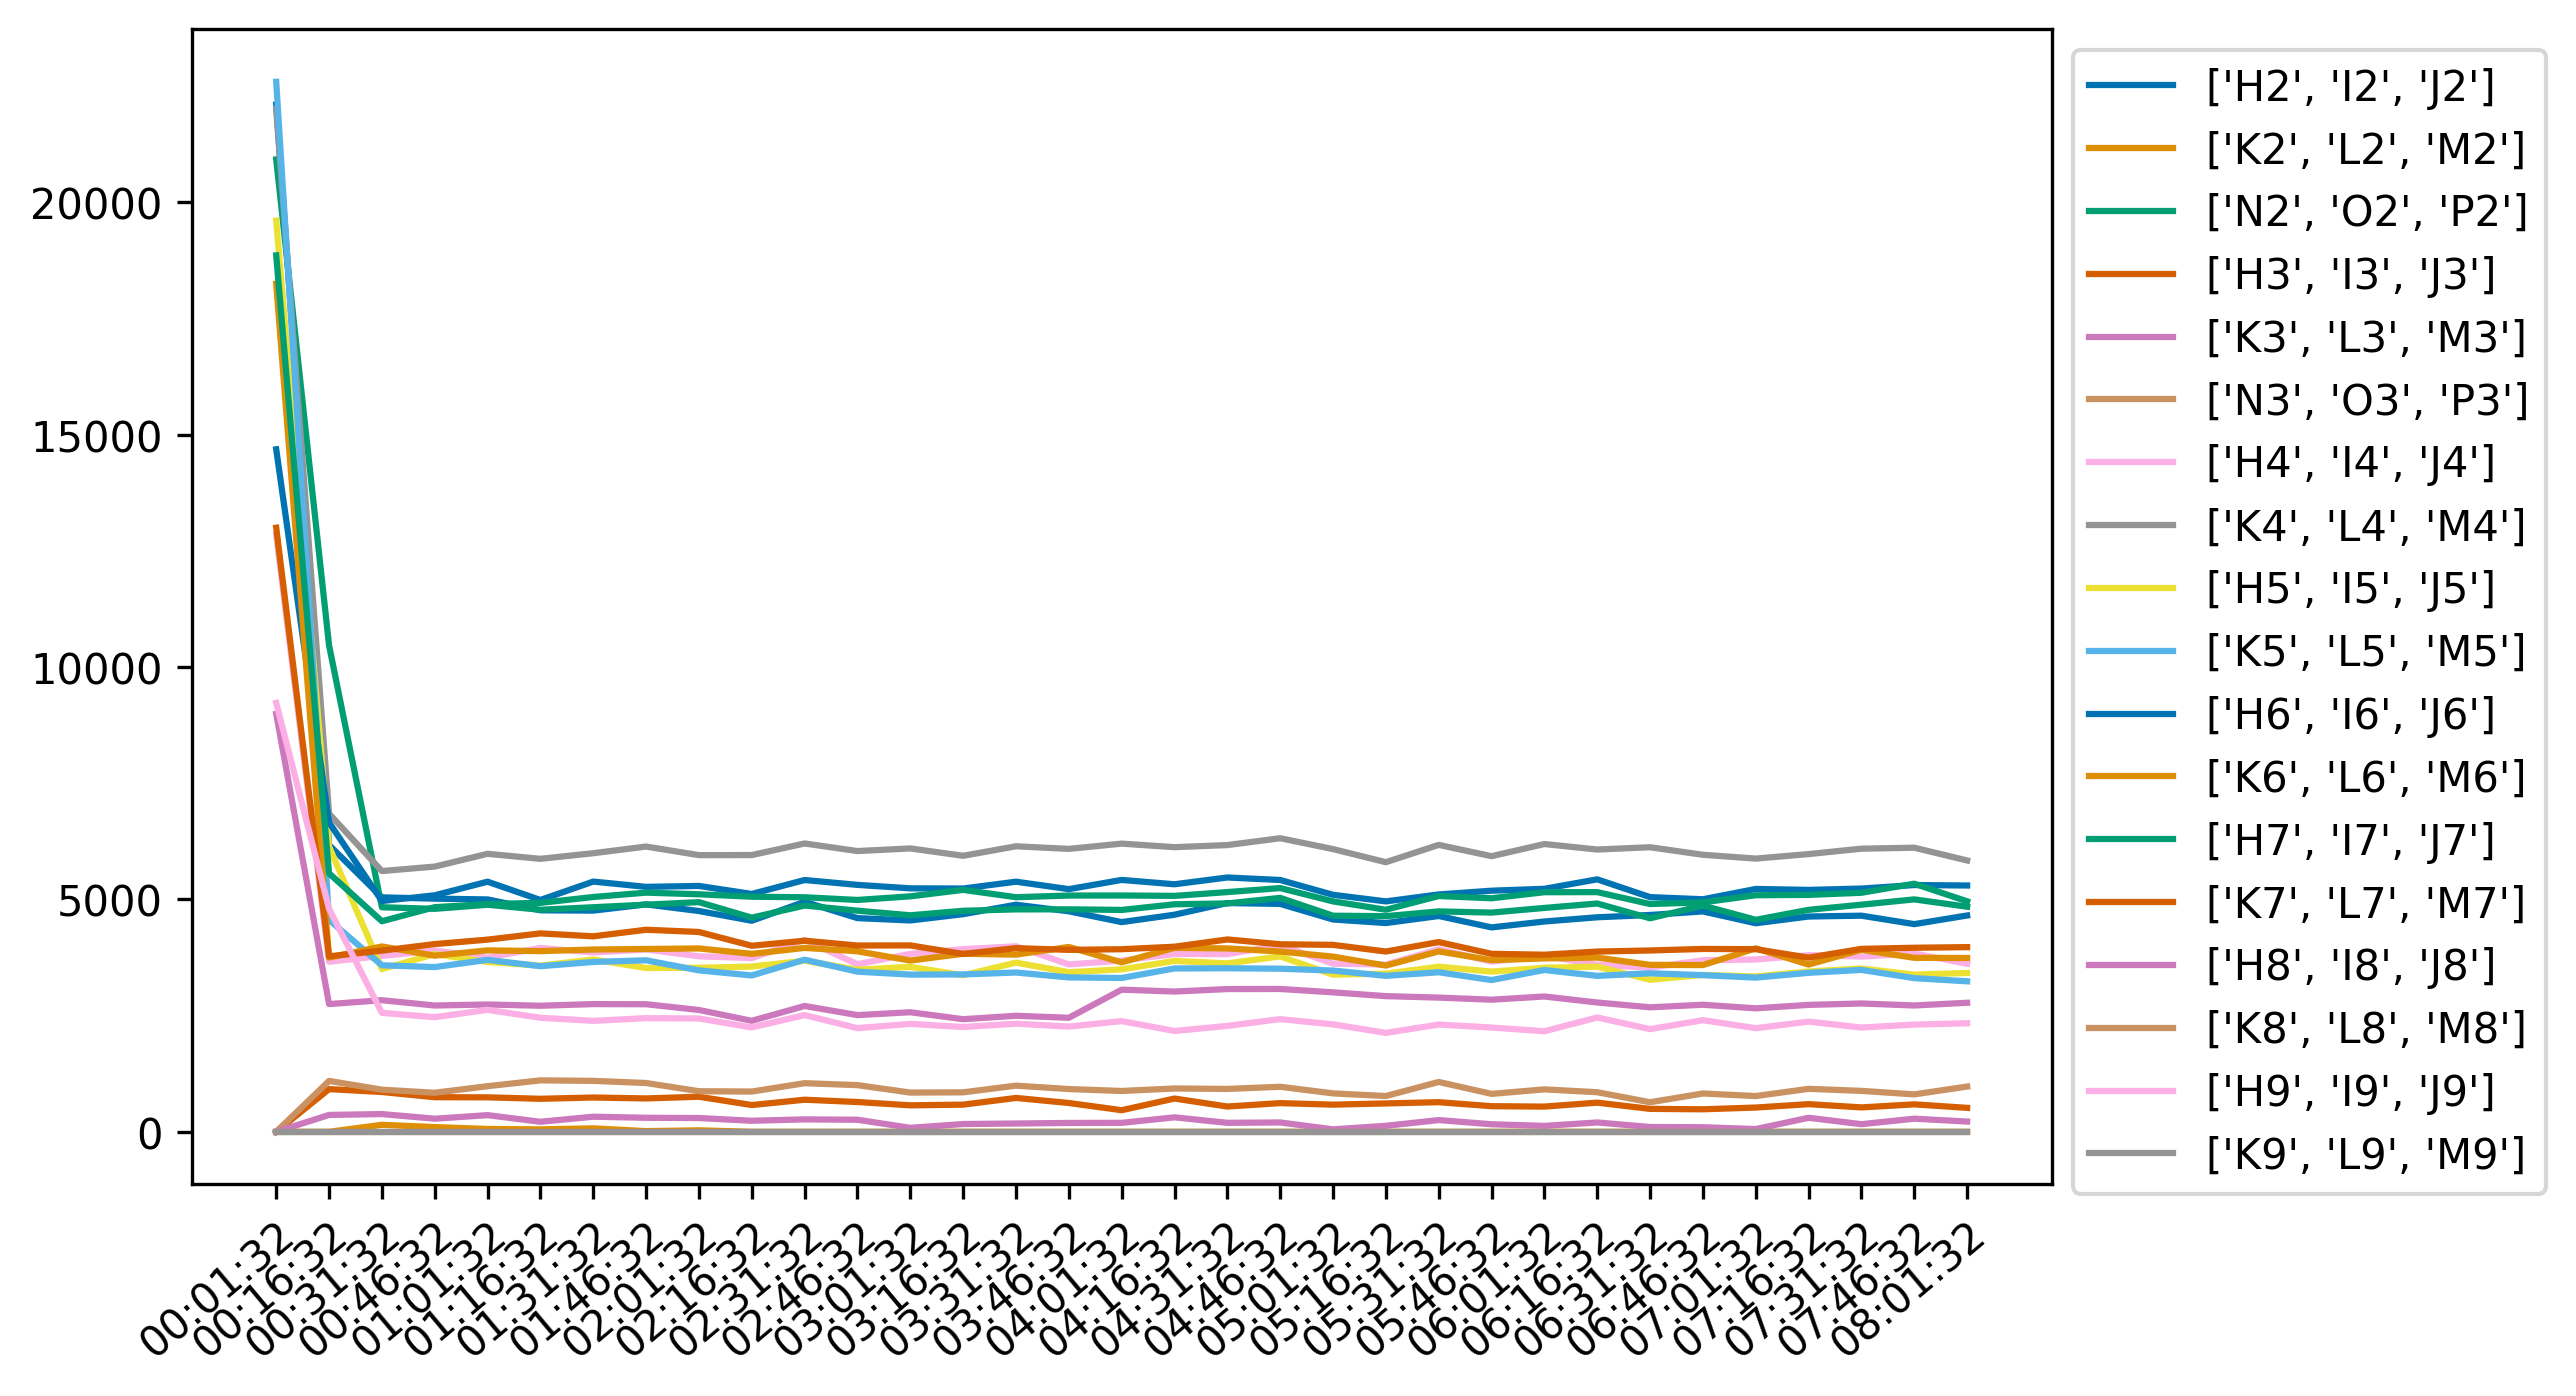

In [10]:
for i in targets.columns:
    if i != 'Time' and type(i) != int:
        targets[i].plot()
  
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(targets.index.values,targets.Time,rotation=40,rotation_mode="anchor",ha='right')
plt.show()

## Rename all the columns using the text file containing the well plan

In [22]:
# Open the file 

name = pd.ExcelFile('../../data/well_plan_050123.xlsx') 
     
test = pd.DataFrame(name.parse(0))

# remove first column

test.drop(test.columns[0],axis=1,inplace=True)

In [23]:
# get the name of all conditions tested
names = [x for x in test.values.flatten() if str(x) != 'nan' ]

# create the sd names 

sd = []
for i in names:
    sd.append(i+"_sd")
        
# add the time

names = np.append(names,['Time'])
names = np.append(names,sd)

# take only one of the repeated names (the name of the triplicate)

n = [names[0]]
for i in names:
    if i not in n:
        n.append(i)

In [24]:
# rename the columns 

for i in range(len(targets.columns)):
    targets.rename(columns={targets.columns[i]:n[i]},inplace=True)
    
targets.columns

Index(['toxR - PC', 'tox R - NC', 'tox R - toxR', 'toxR - dnaJ', 'toxR - il17',
       'dnaJ - PC', 'dnaJ - NC', 'dnaJ - toxR', 'dnaJ - dnaJ', 'dna J - il17',
       'il17 - PC', 'il17 - NC', 'il17 - toxR', 'il17 - dnaJ', 'il17 - il17',
       'NC - PC', 'NC - NC', 'NC - toxR', 'NC - dnaJ', 'NC - il17', 'PC - PC',
       'PC - NC', 'Time', 'toxR - PC_sd', 'tox R - NC_sd', 'tox R - toxR_sd',
       'toxR - dnaJ_sd', 'toxR - il17_sd', 'dnaJ - PC_sd', 'dnaJ - NC_sd',
       'dnaJ - toxR_sd', 'dnaJ - dnaJ_sd', 'dna J - il17_sd', 'il17 - PC_sd',
       'il17 - NC_sd', 'il17 - toxR_sd', 'il17 - dnaJ_sd', 'il17 - il17_sd',
       'NC - PC_sd', 'NC - NC_sd', 'NC - toxR_sd', 'NC - dnaJ_sd',
       'NC - il17_sd', 'PC - PC_sd', 'PC - NC_sd'],
      dtype='object')

# Plotting

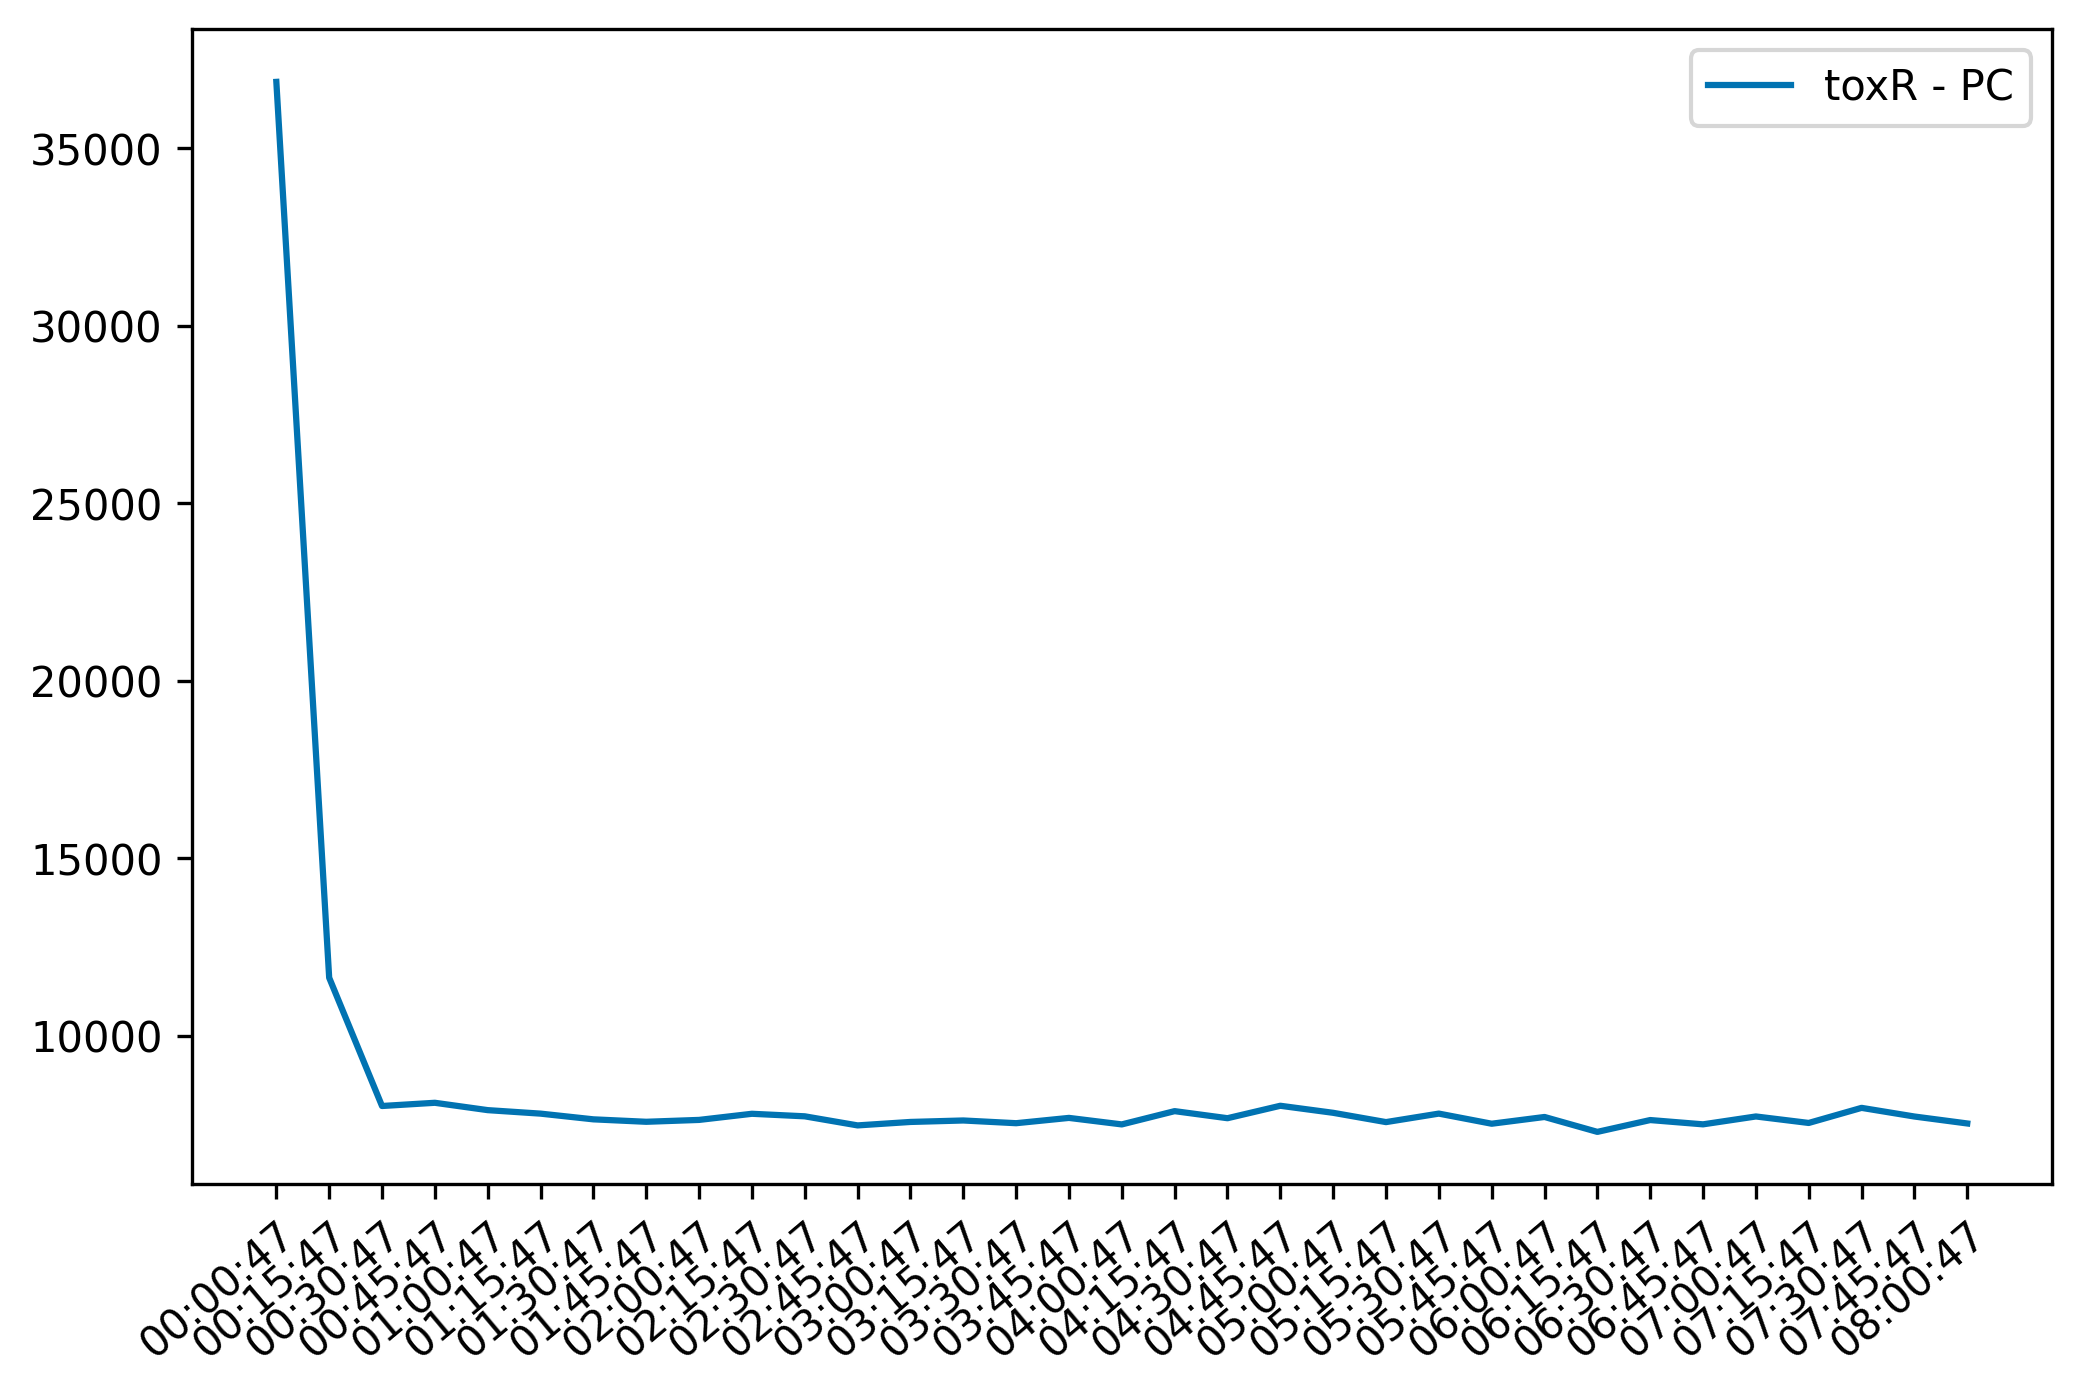

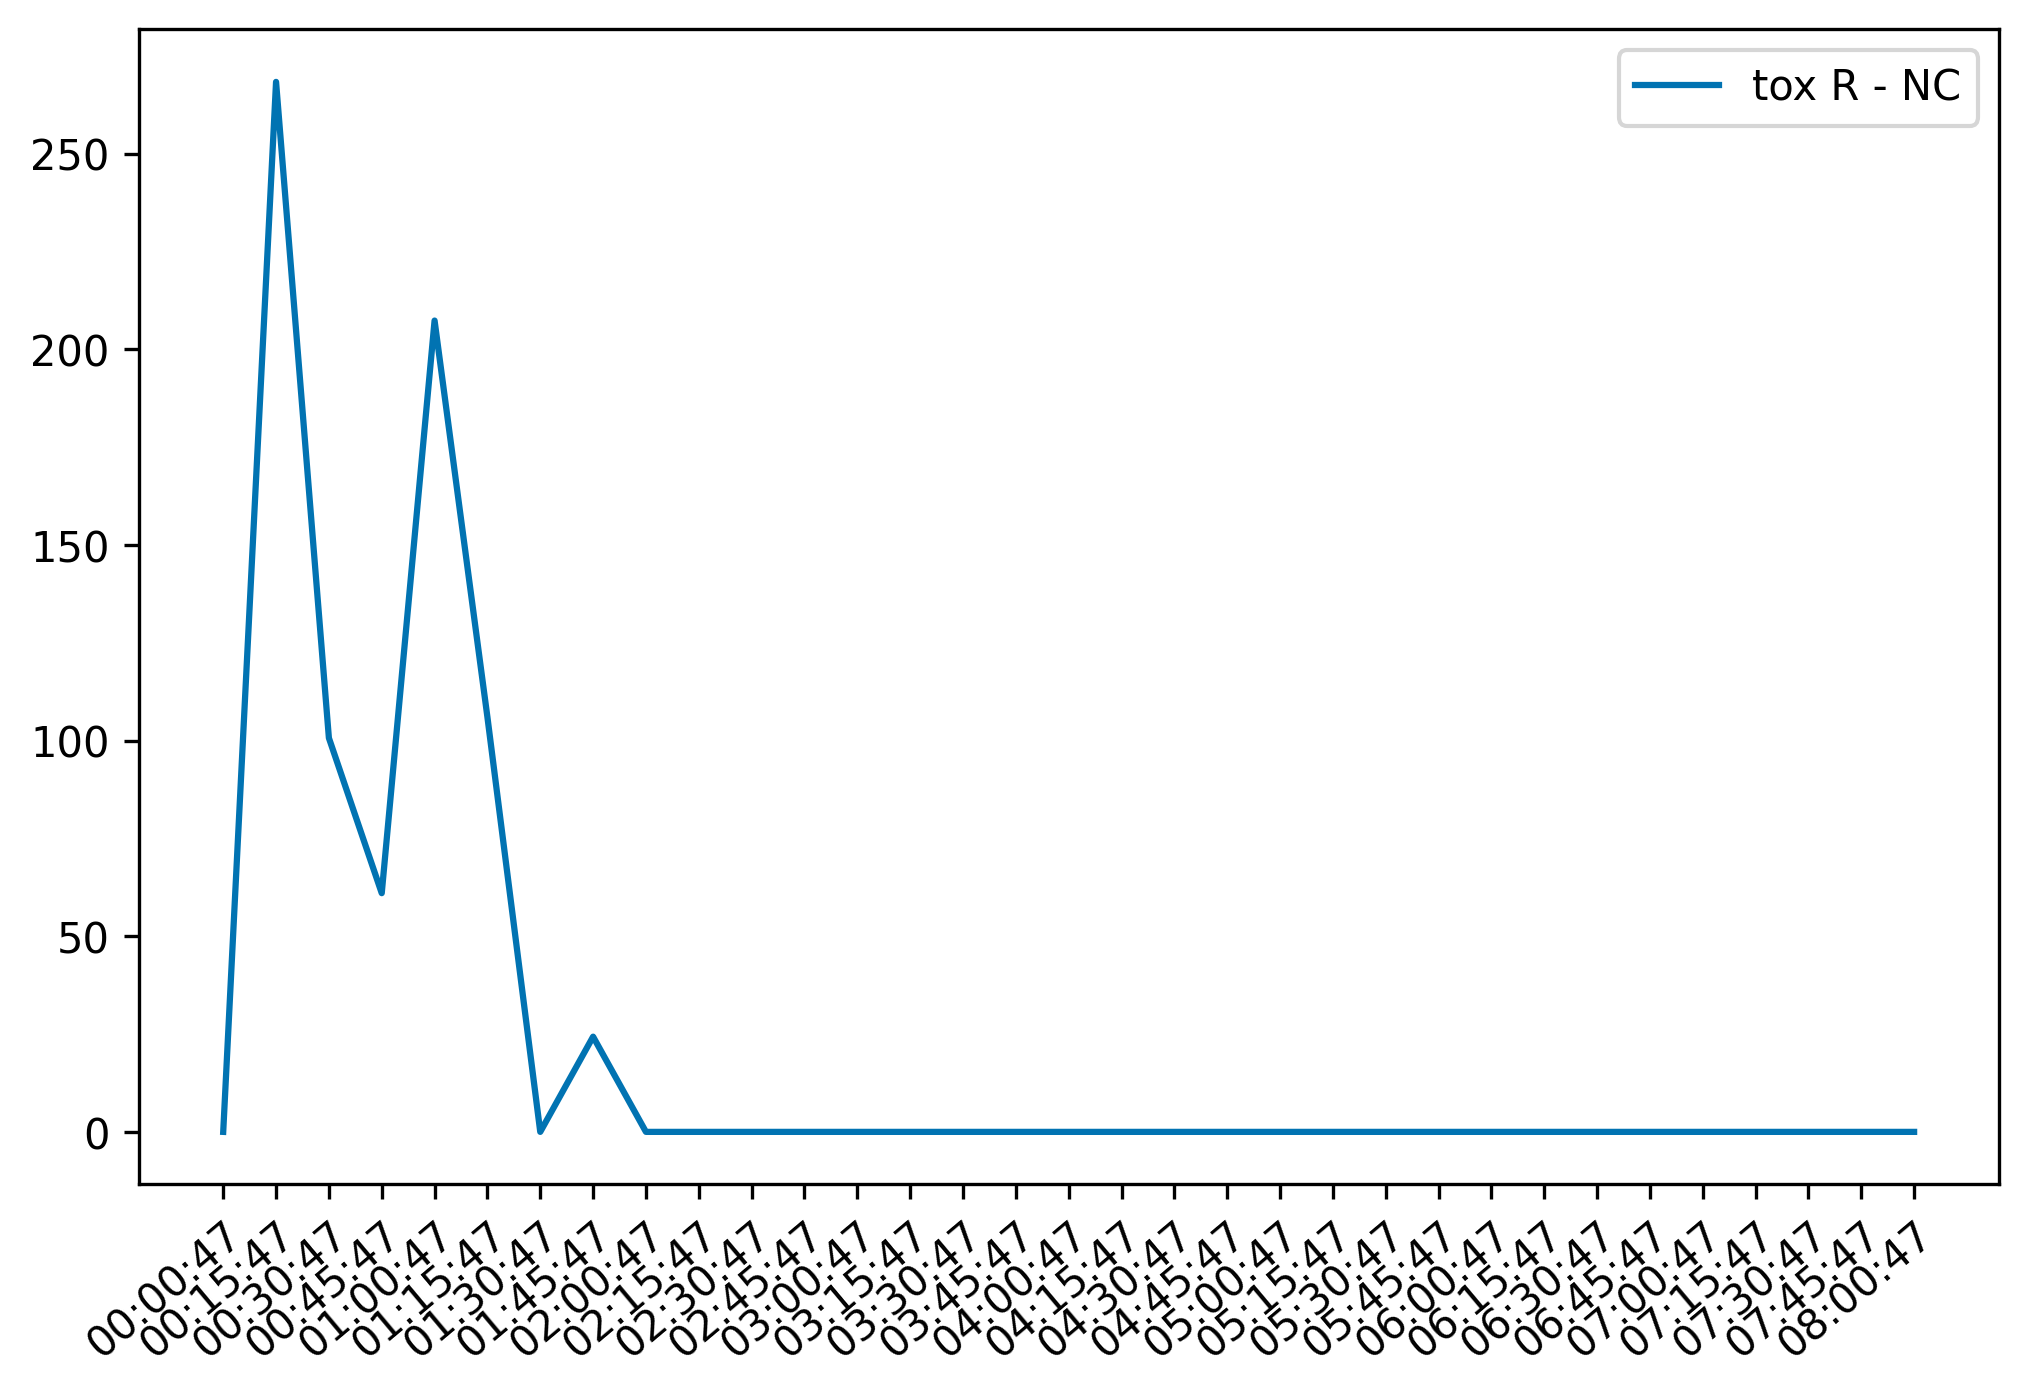

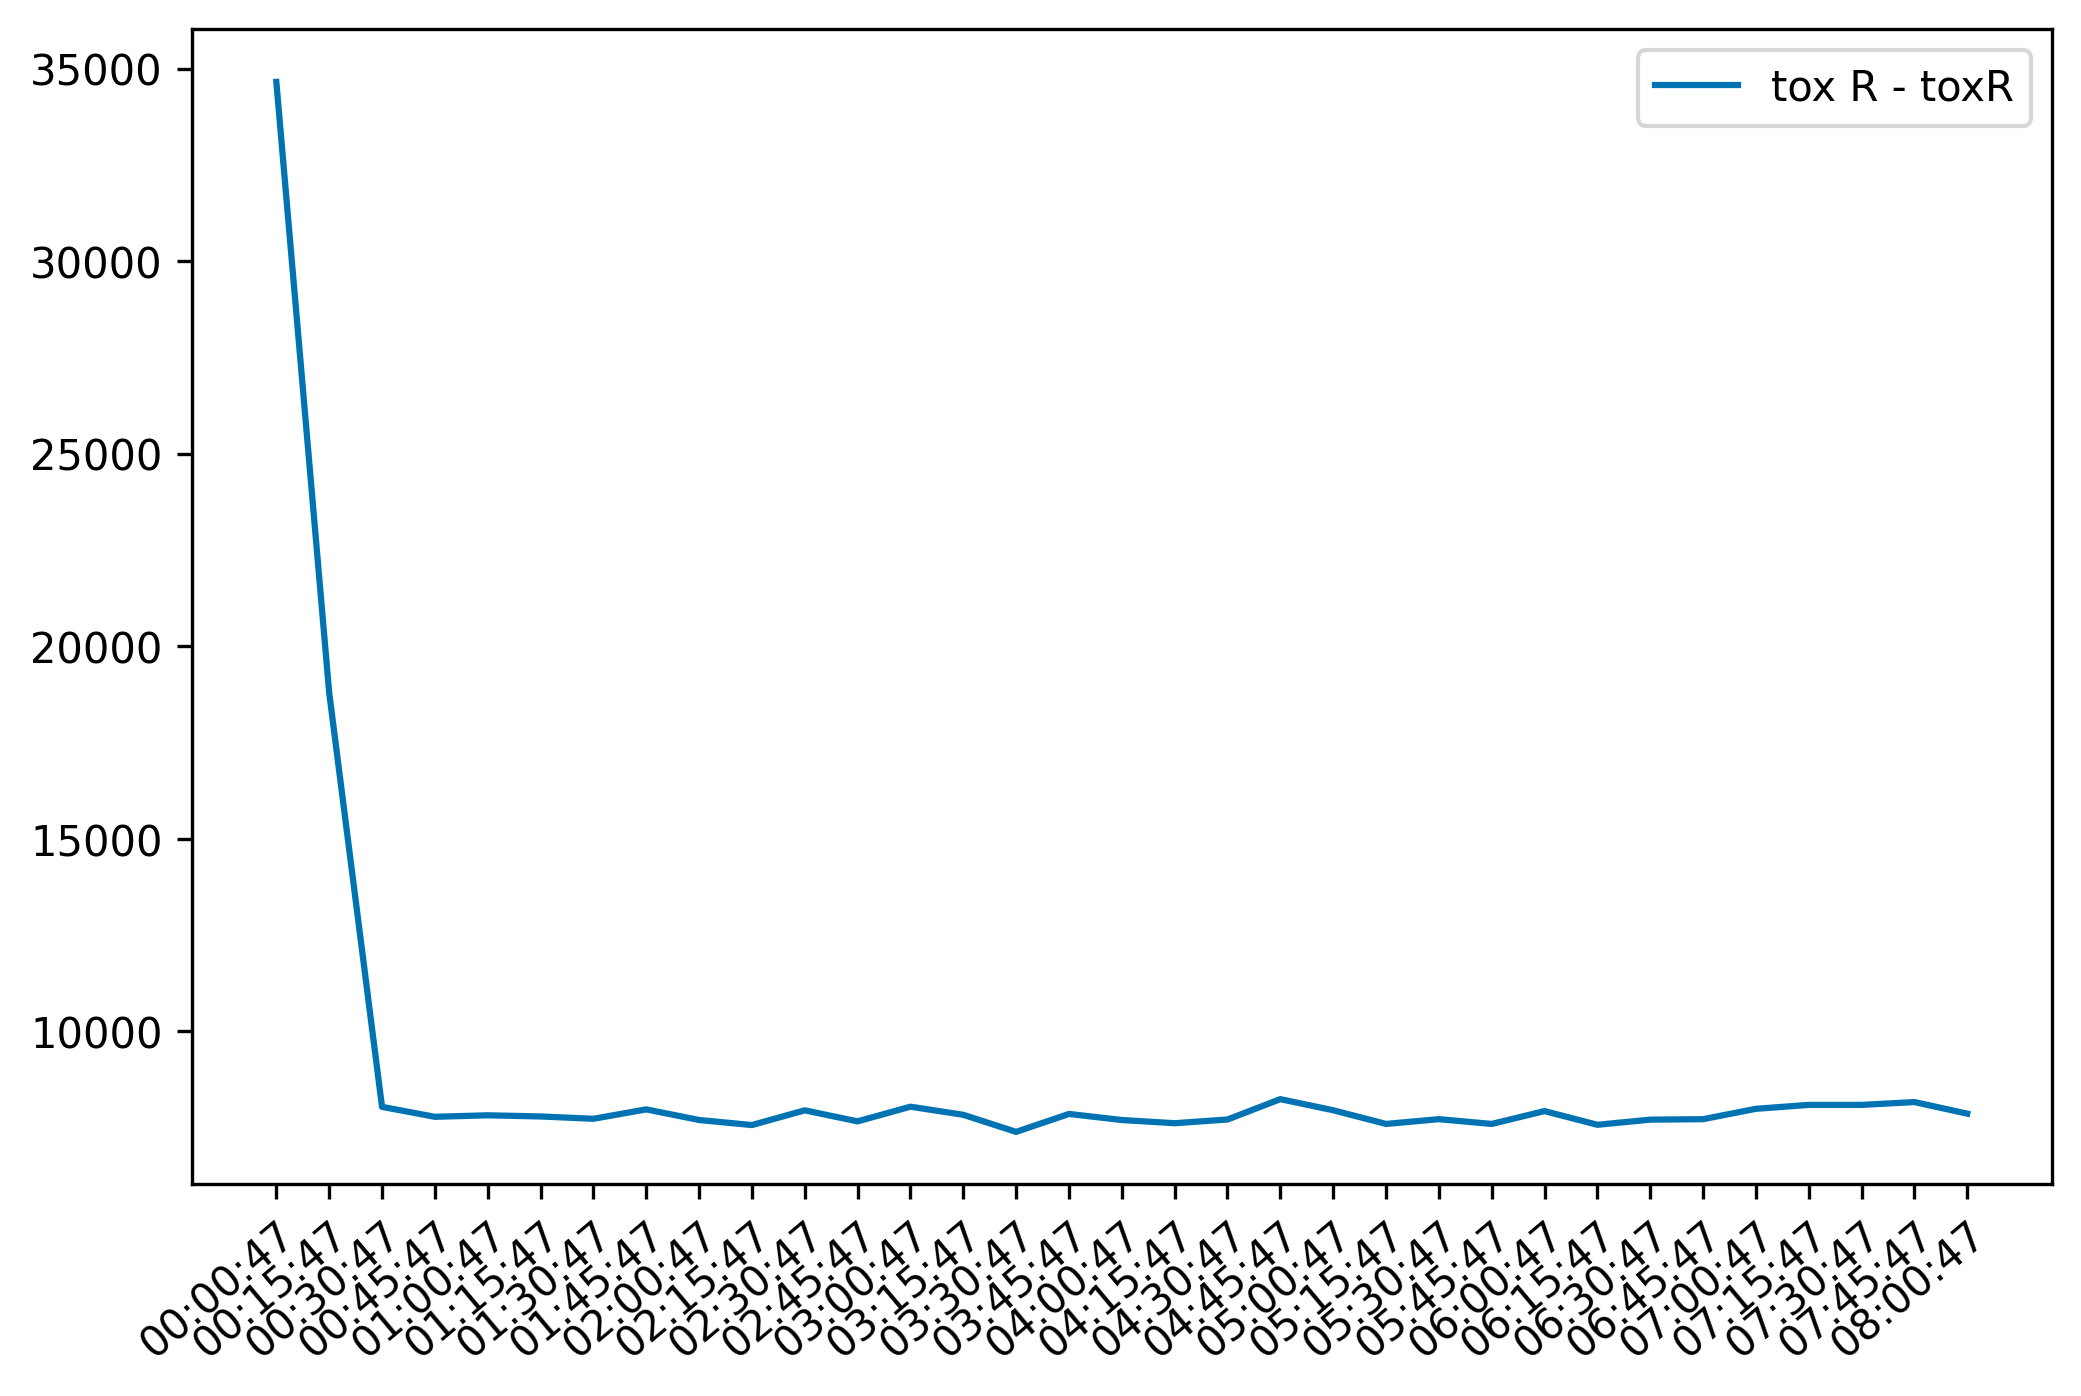

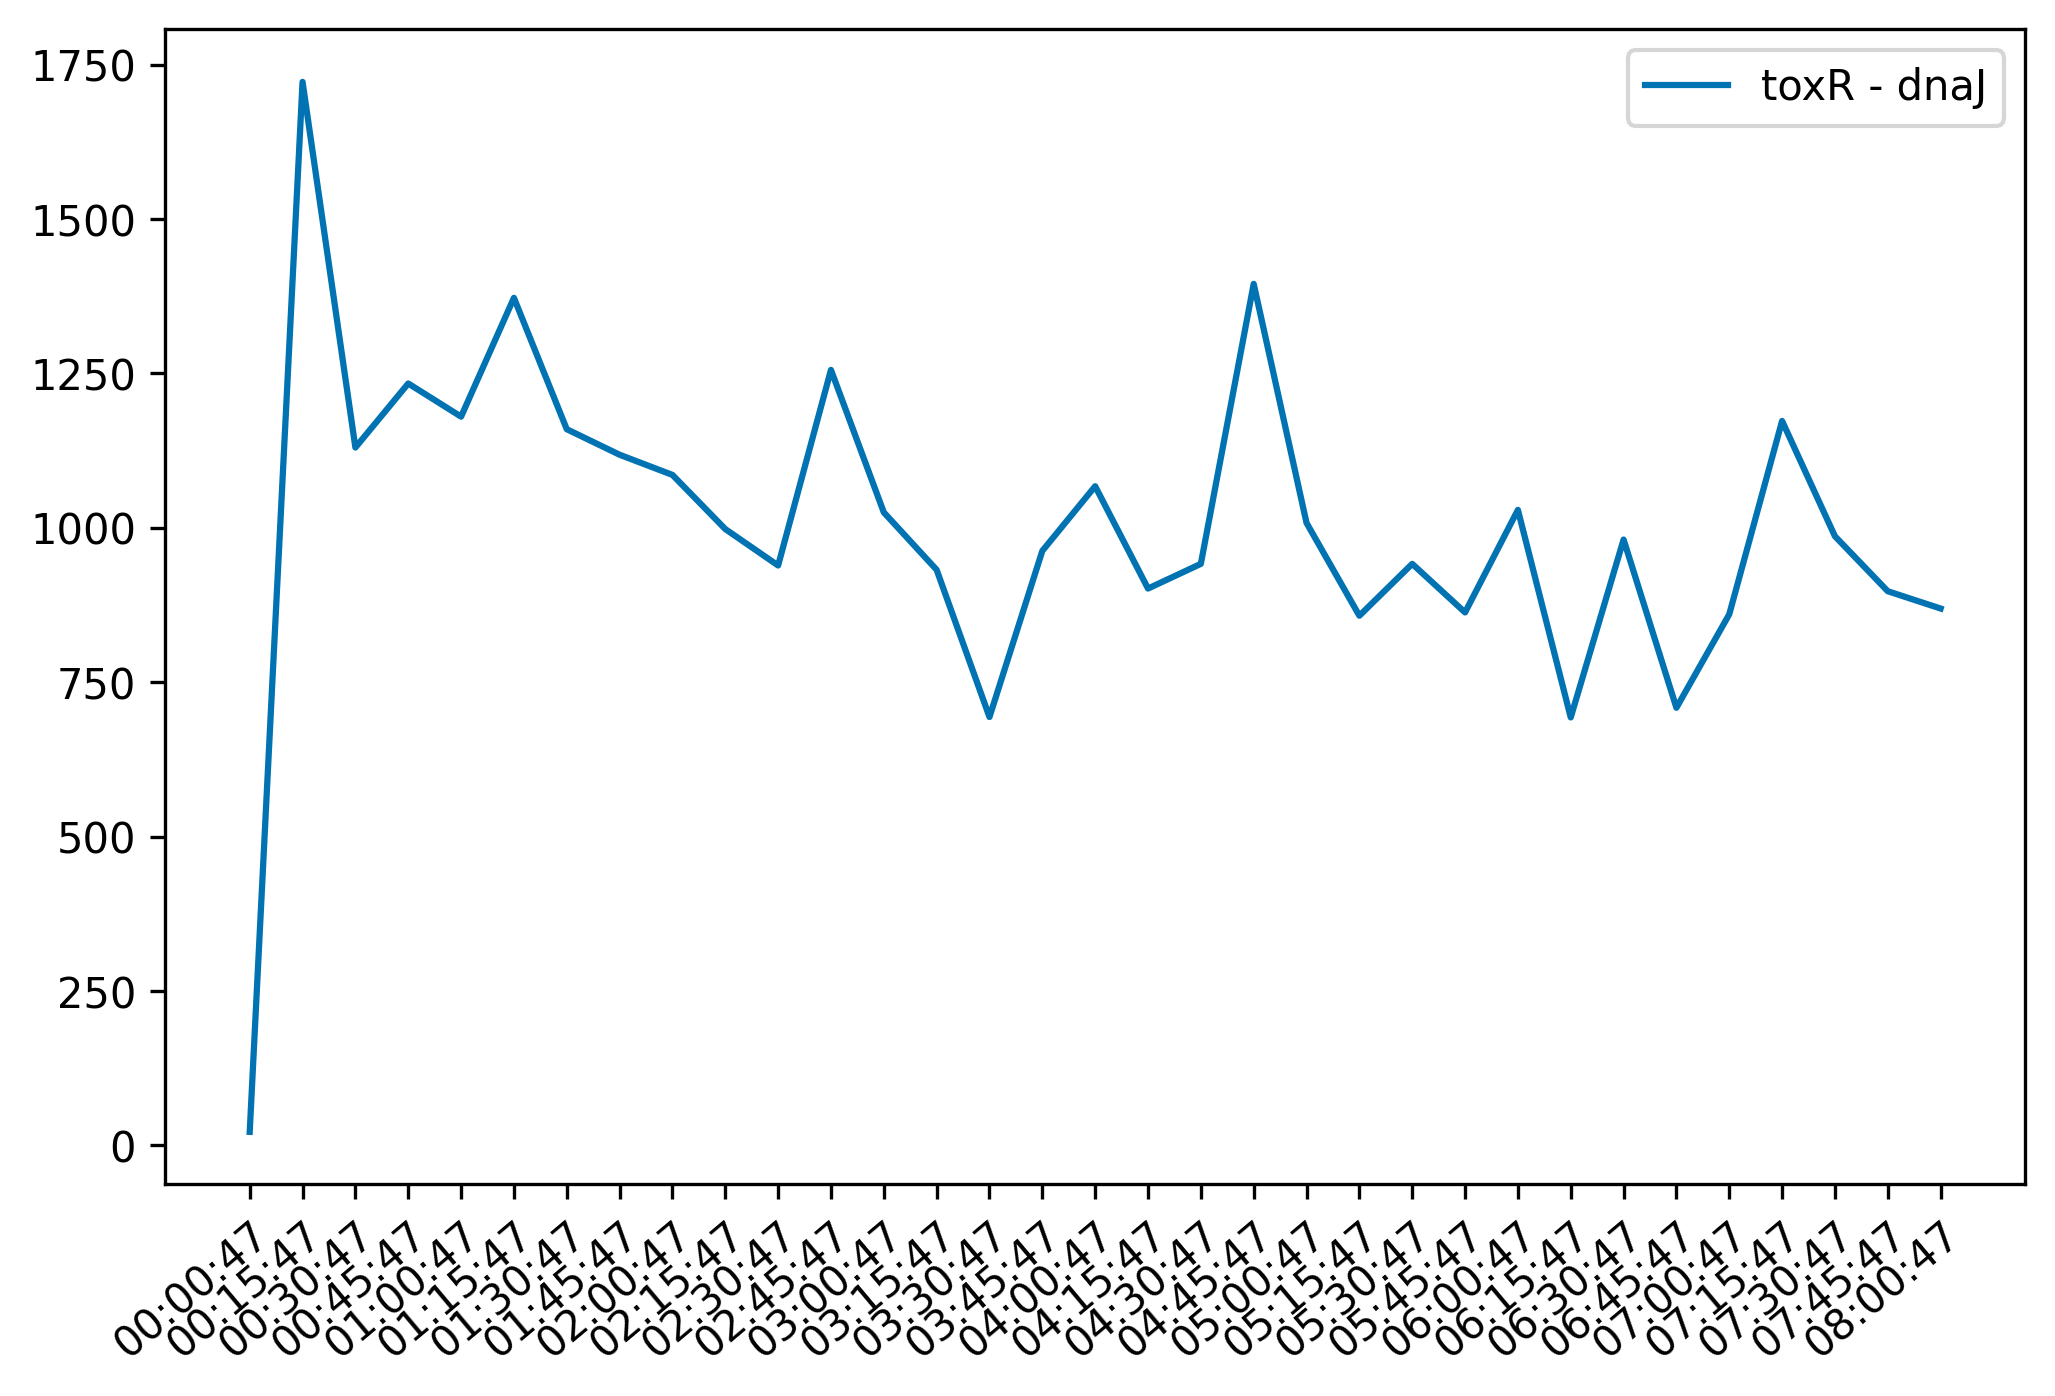

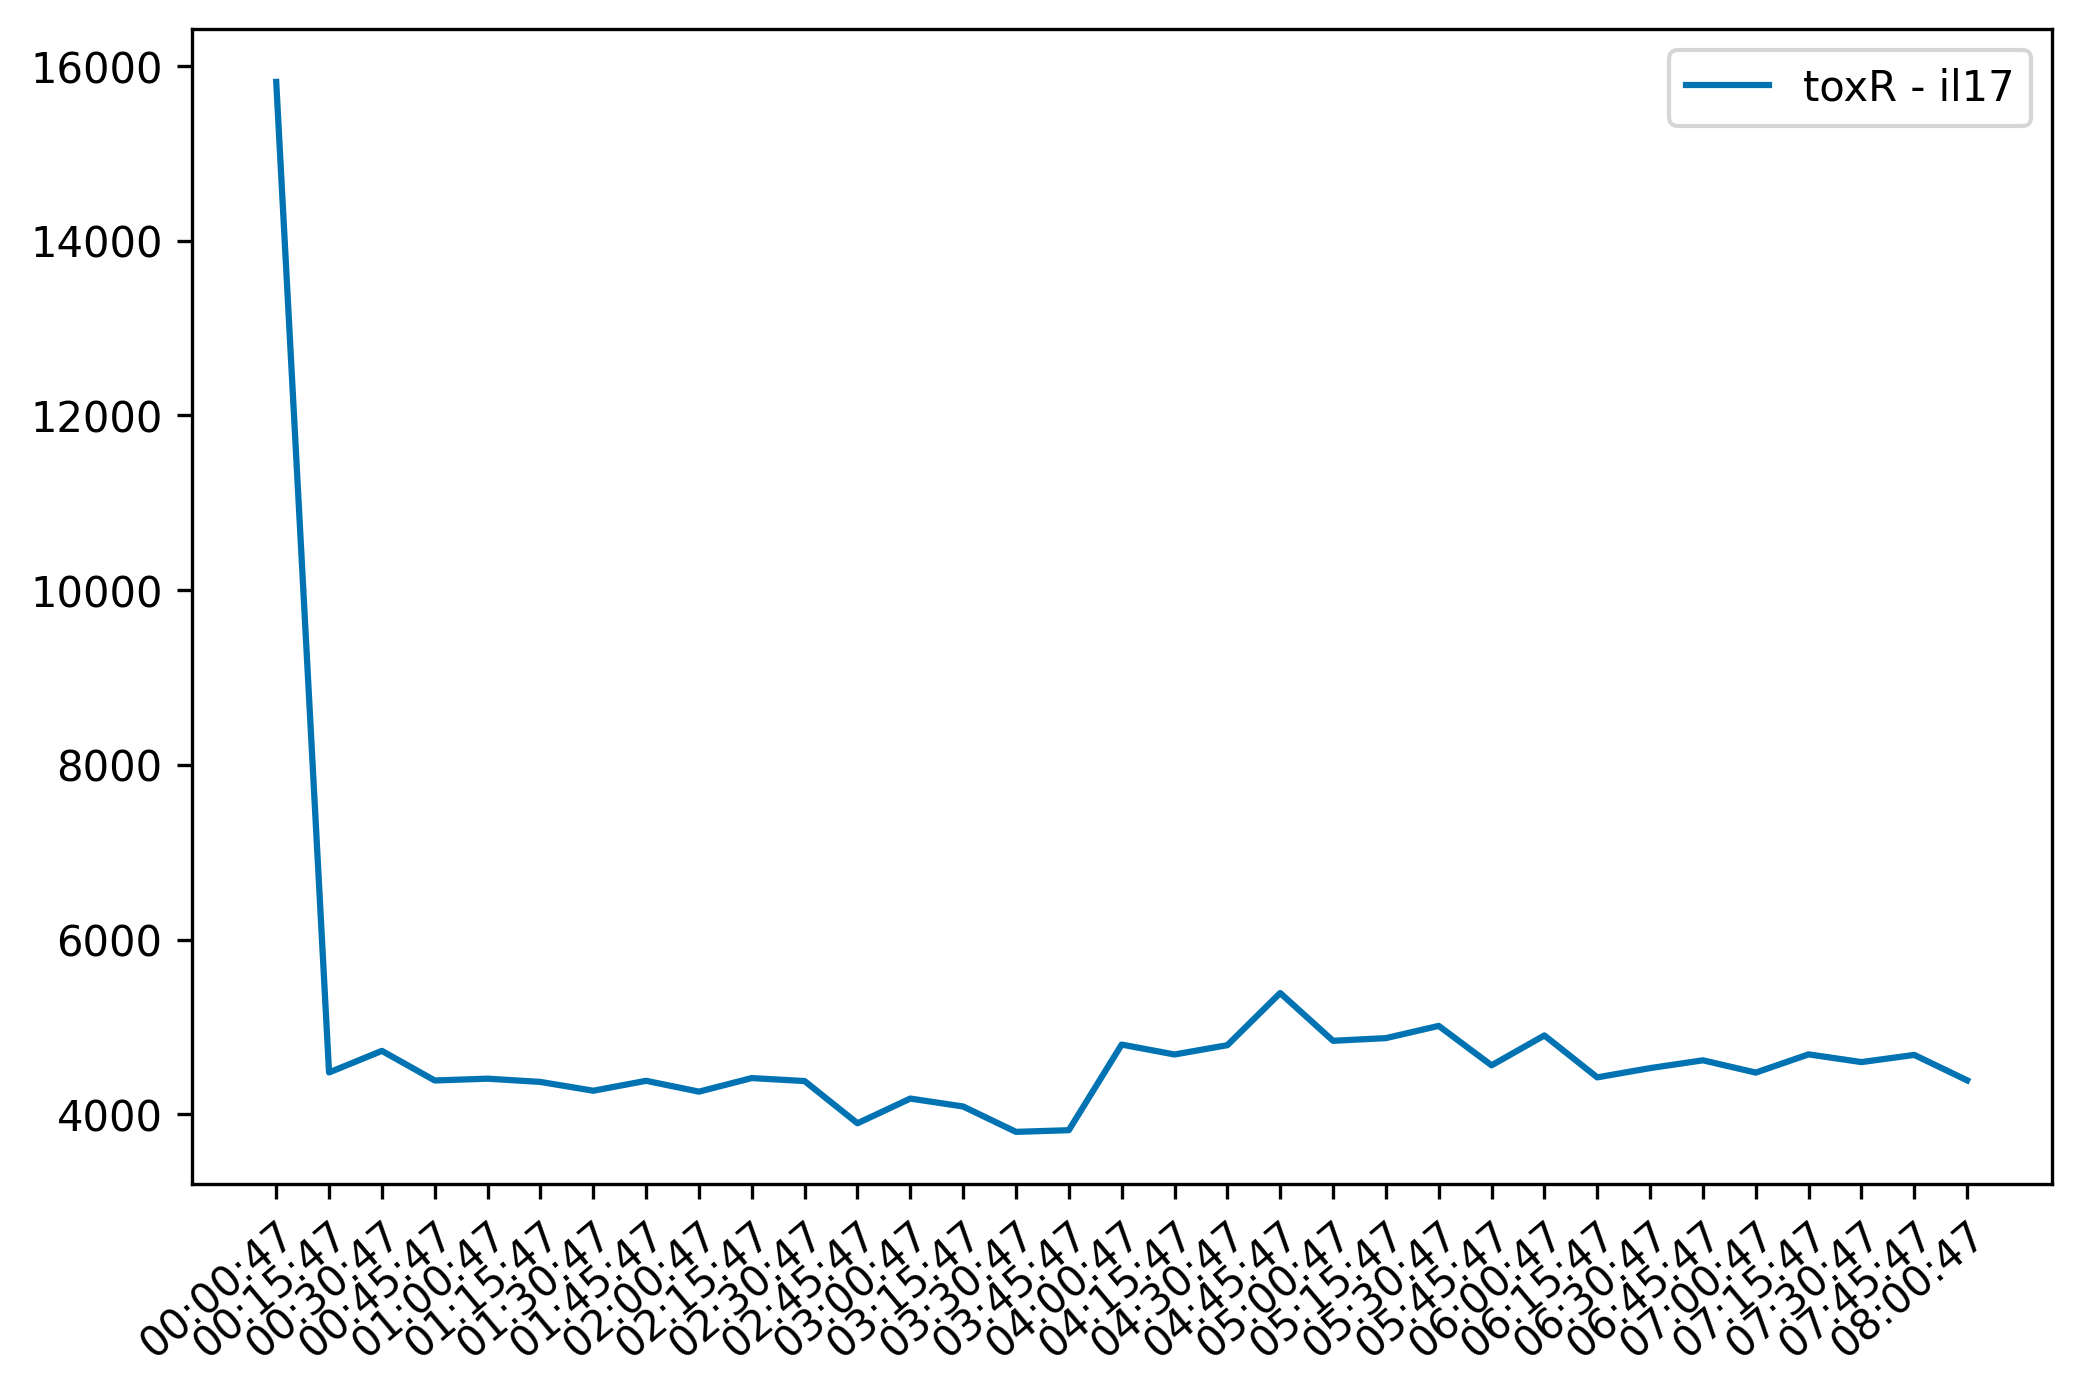

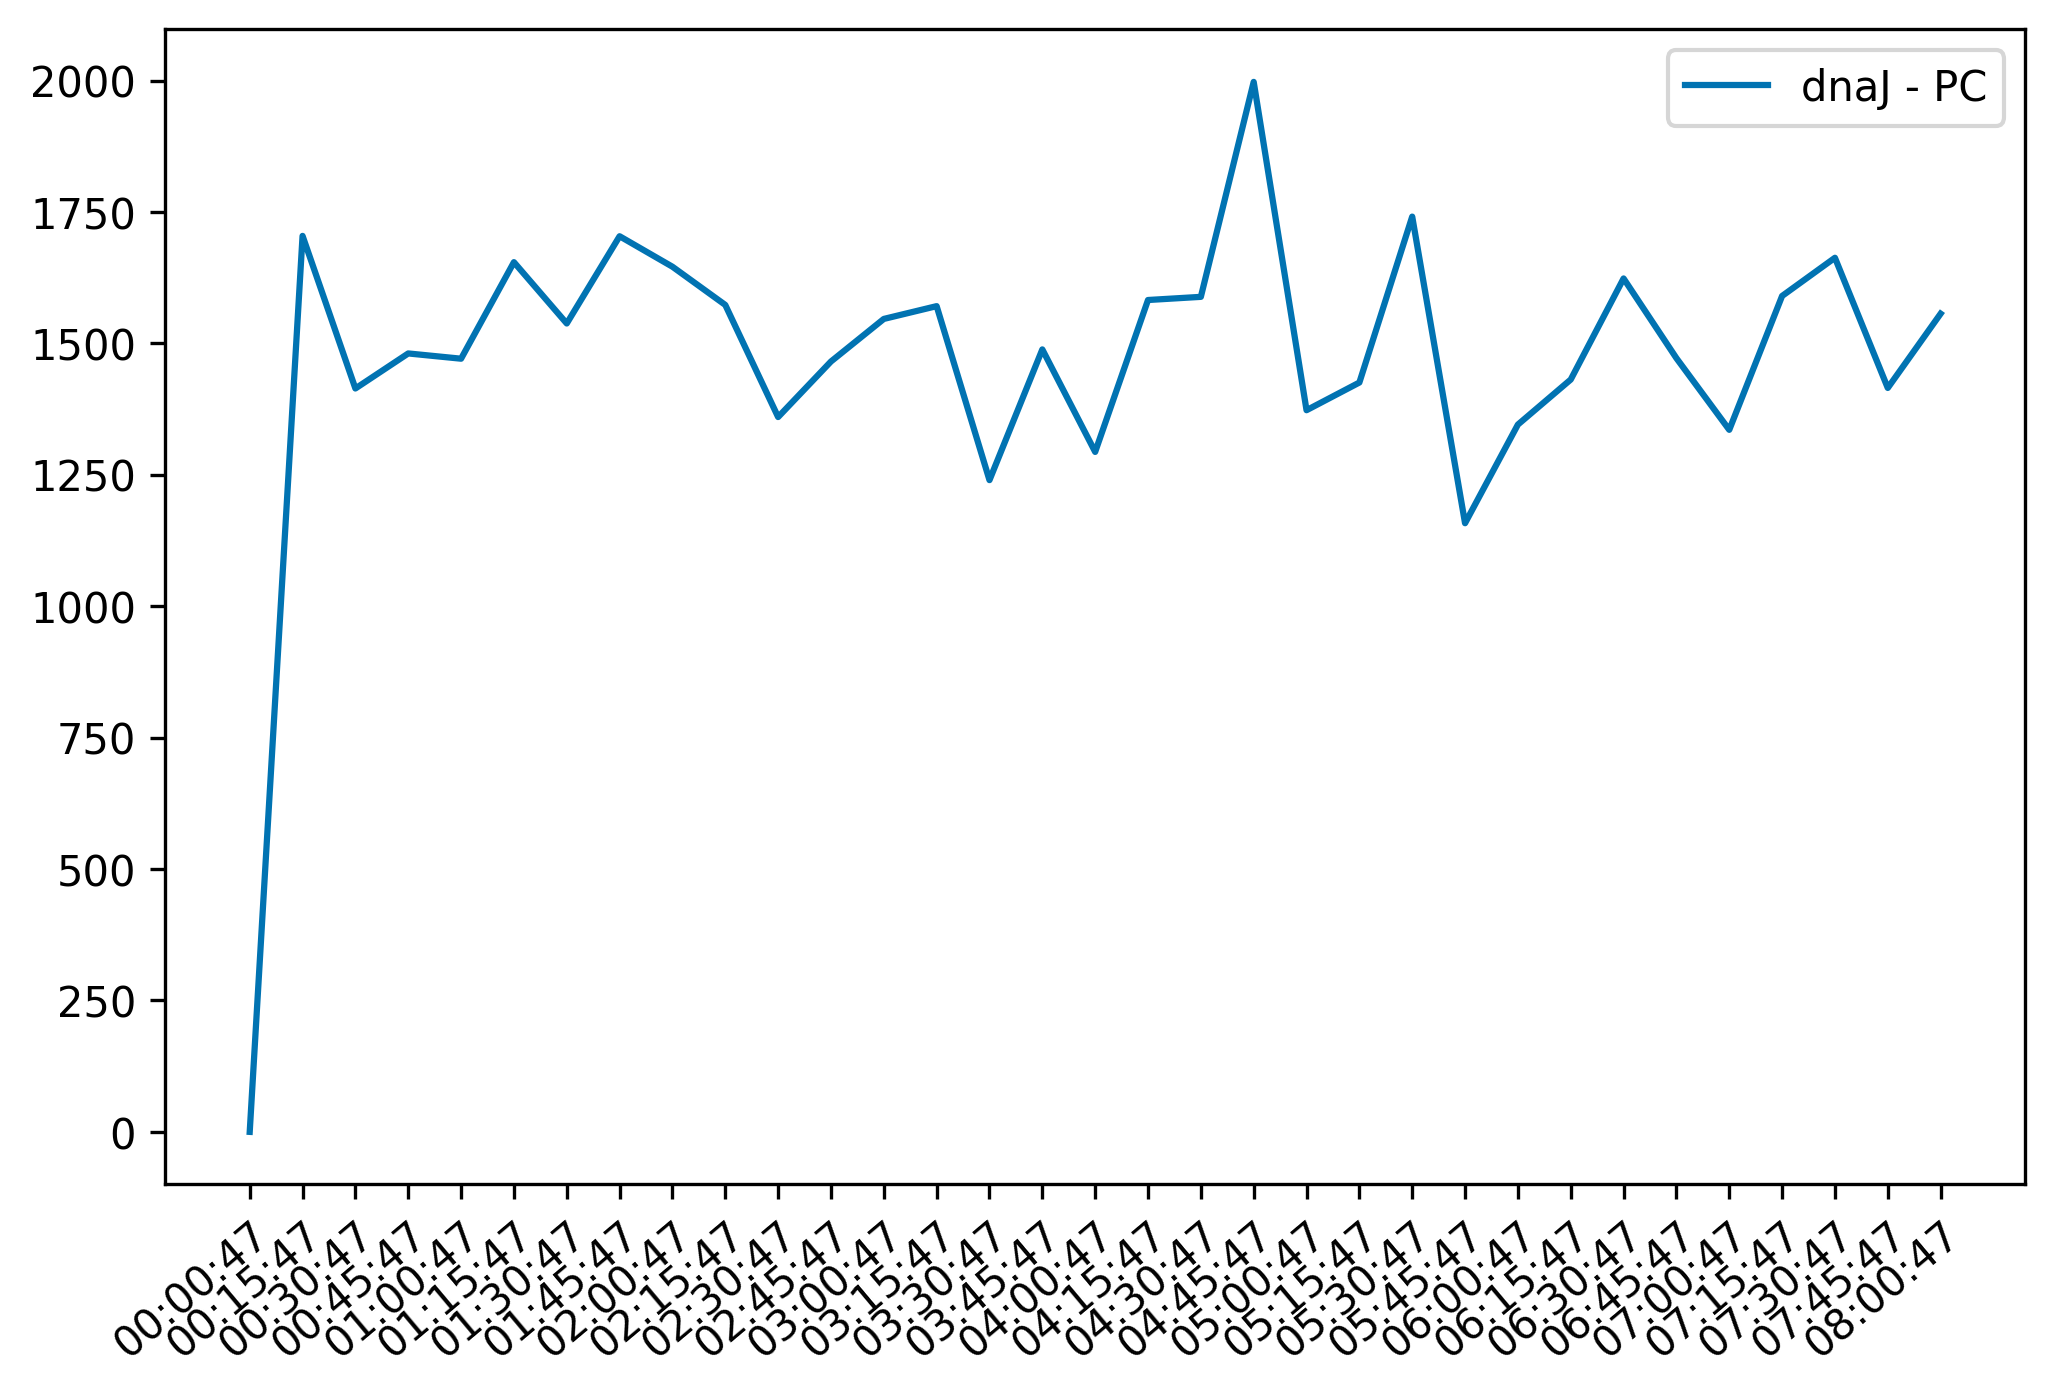

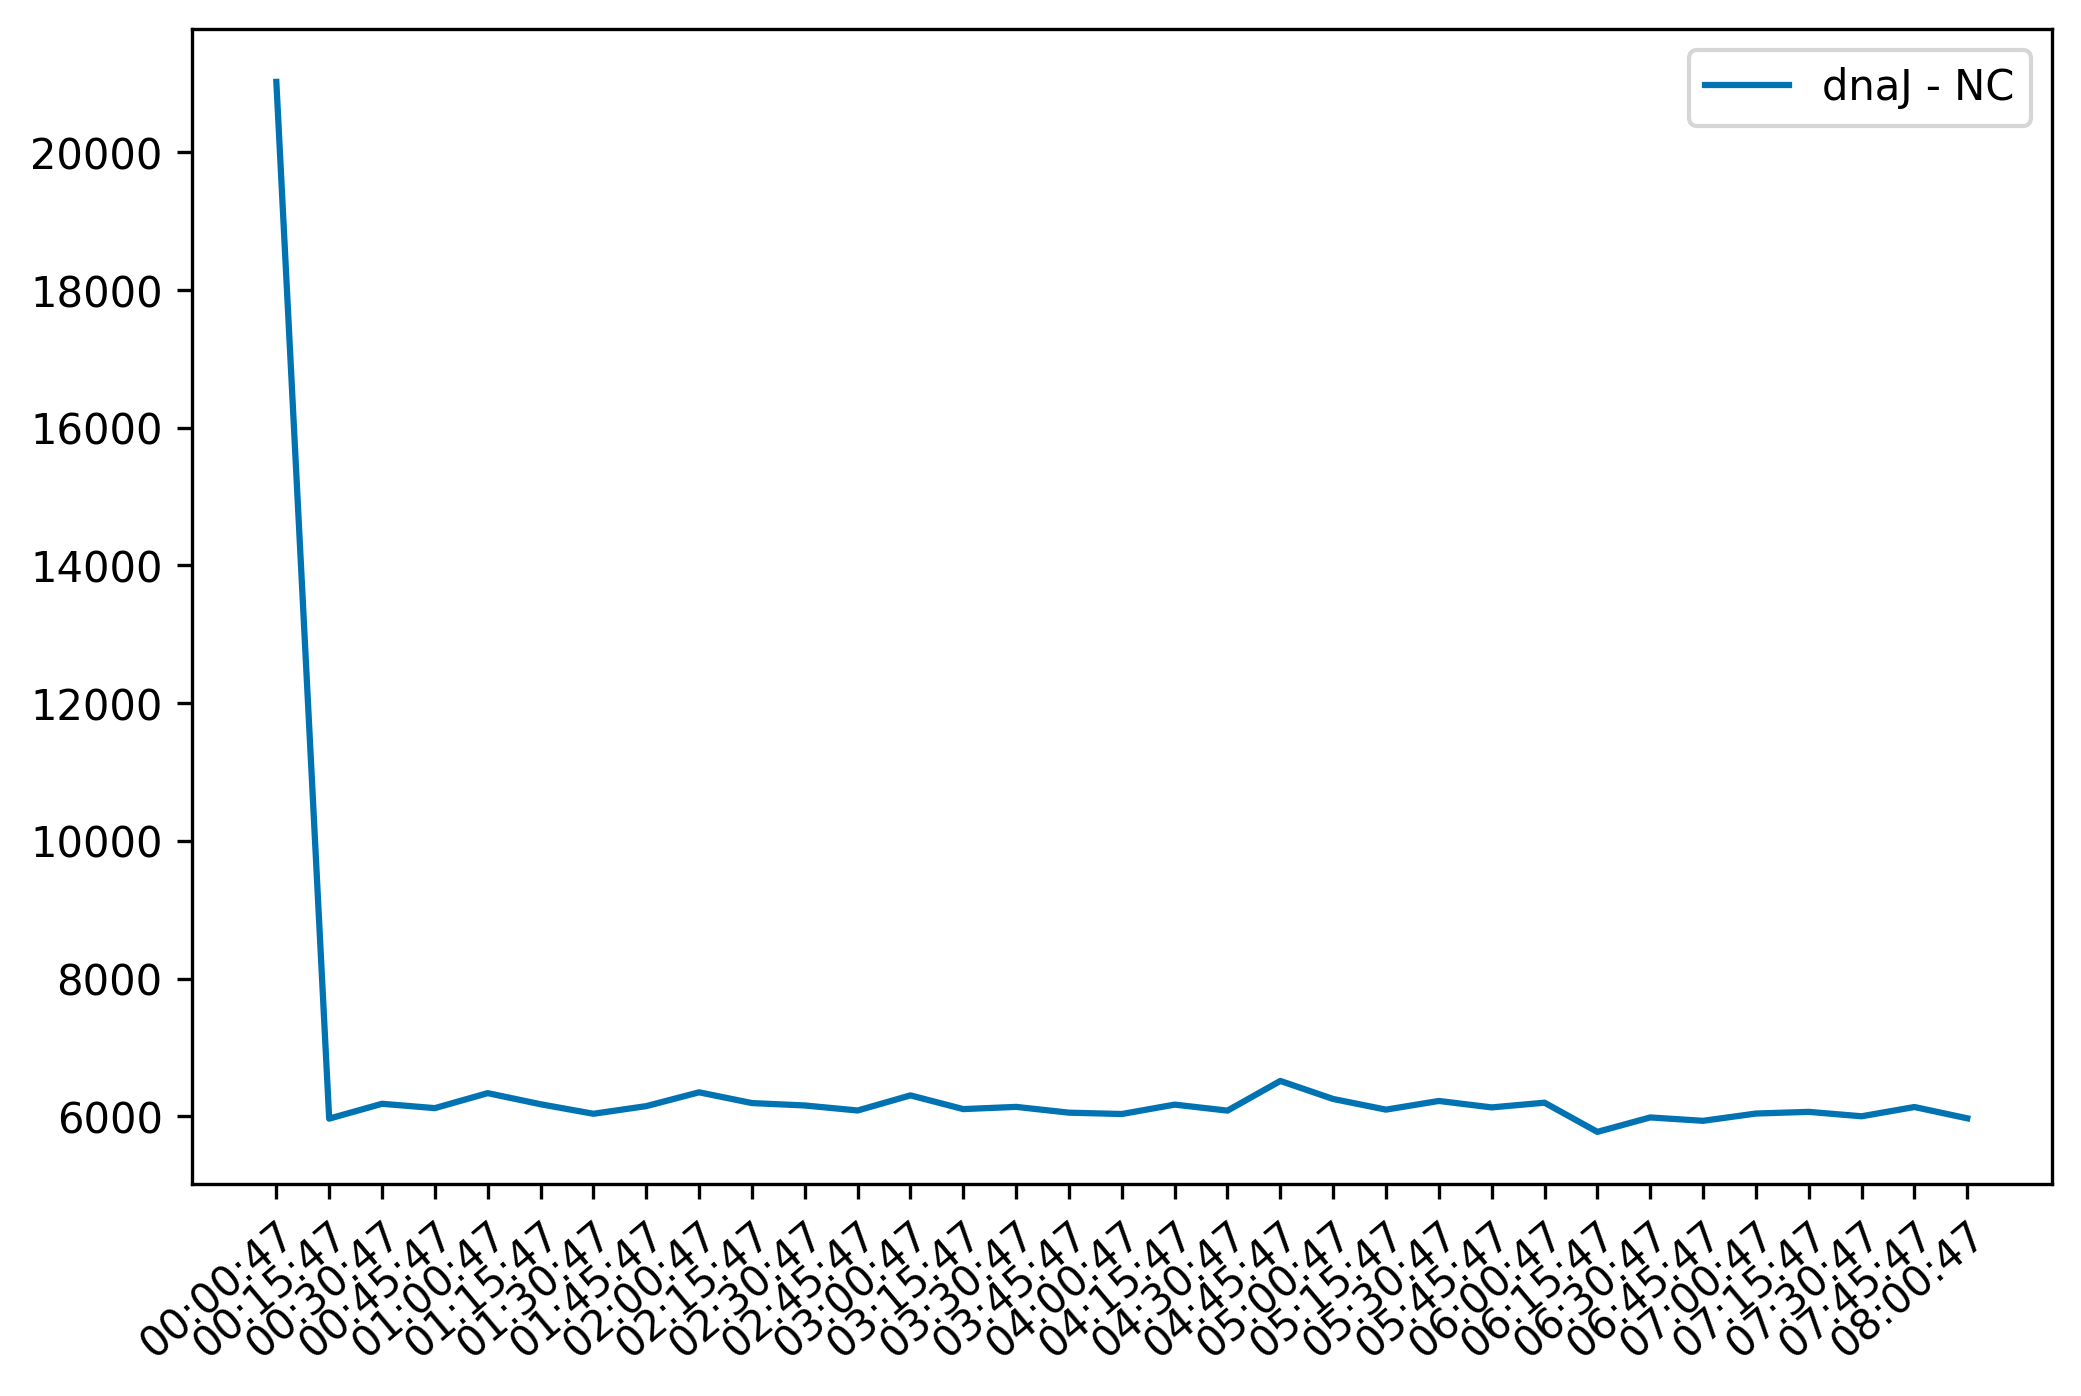

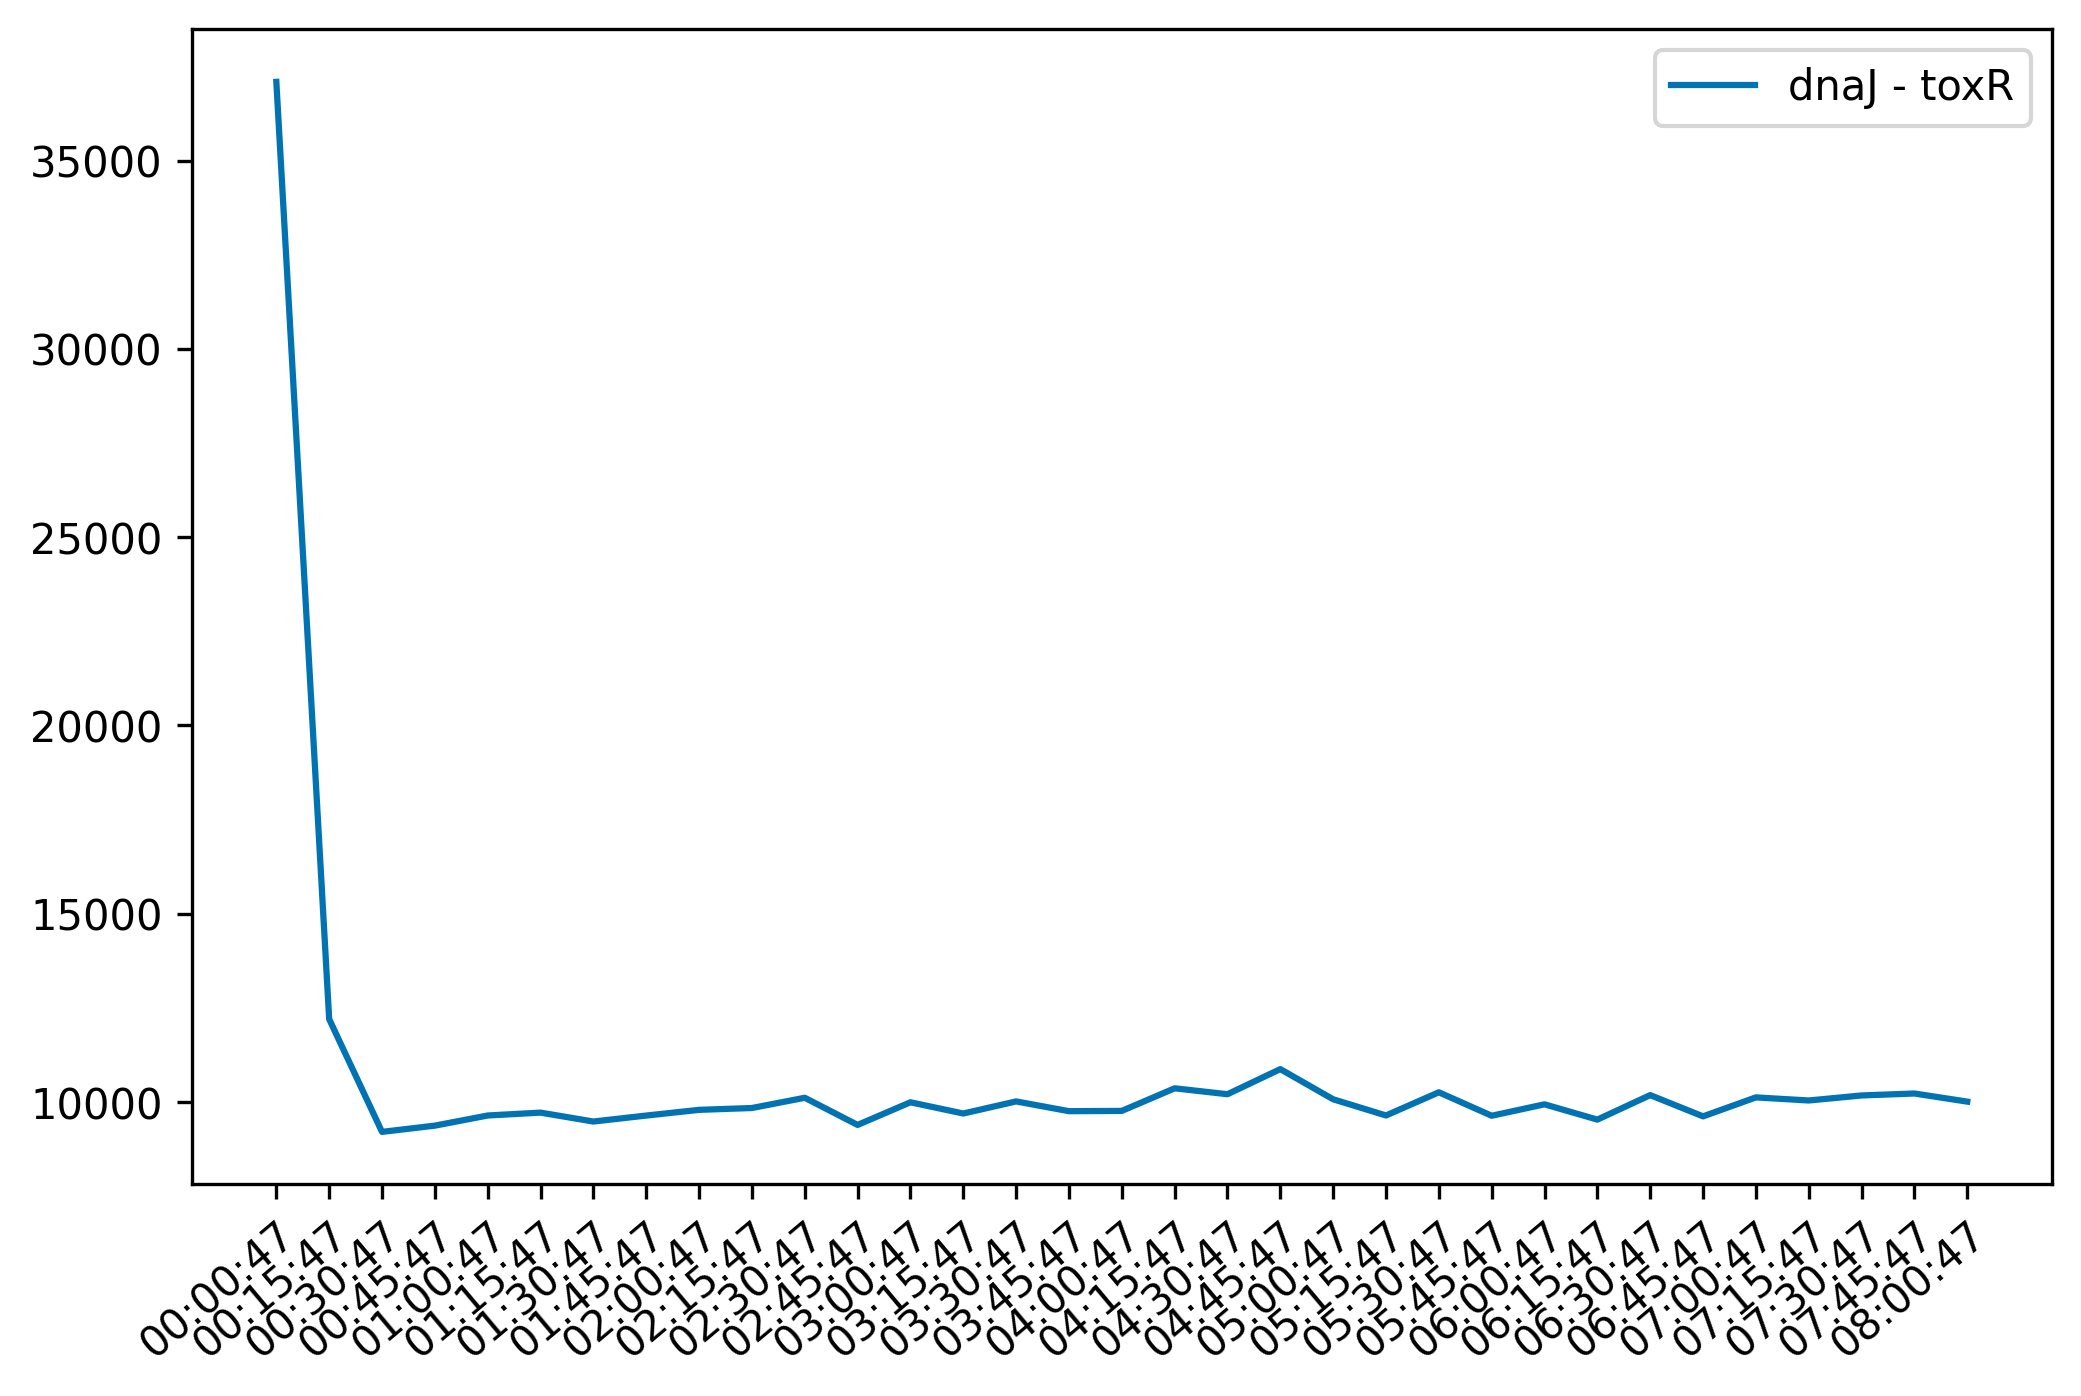

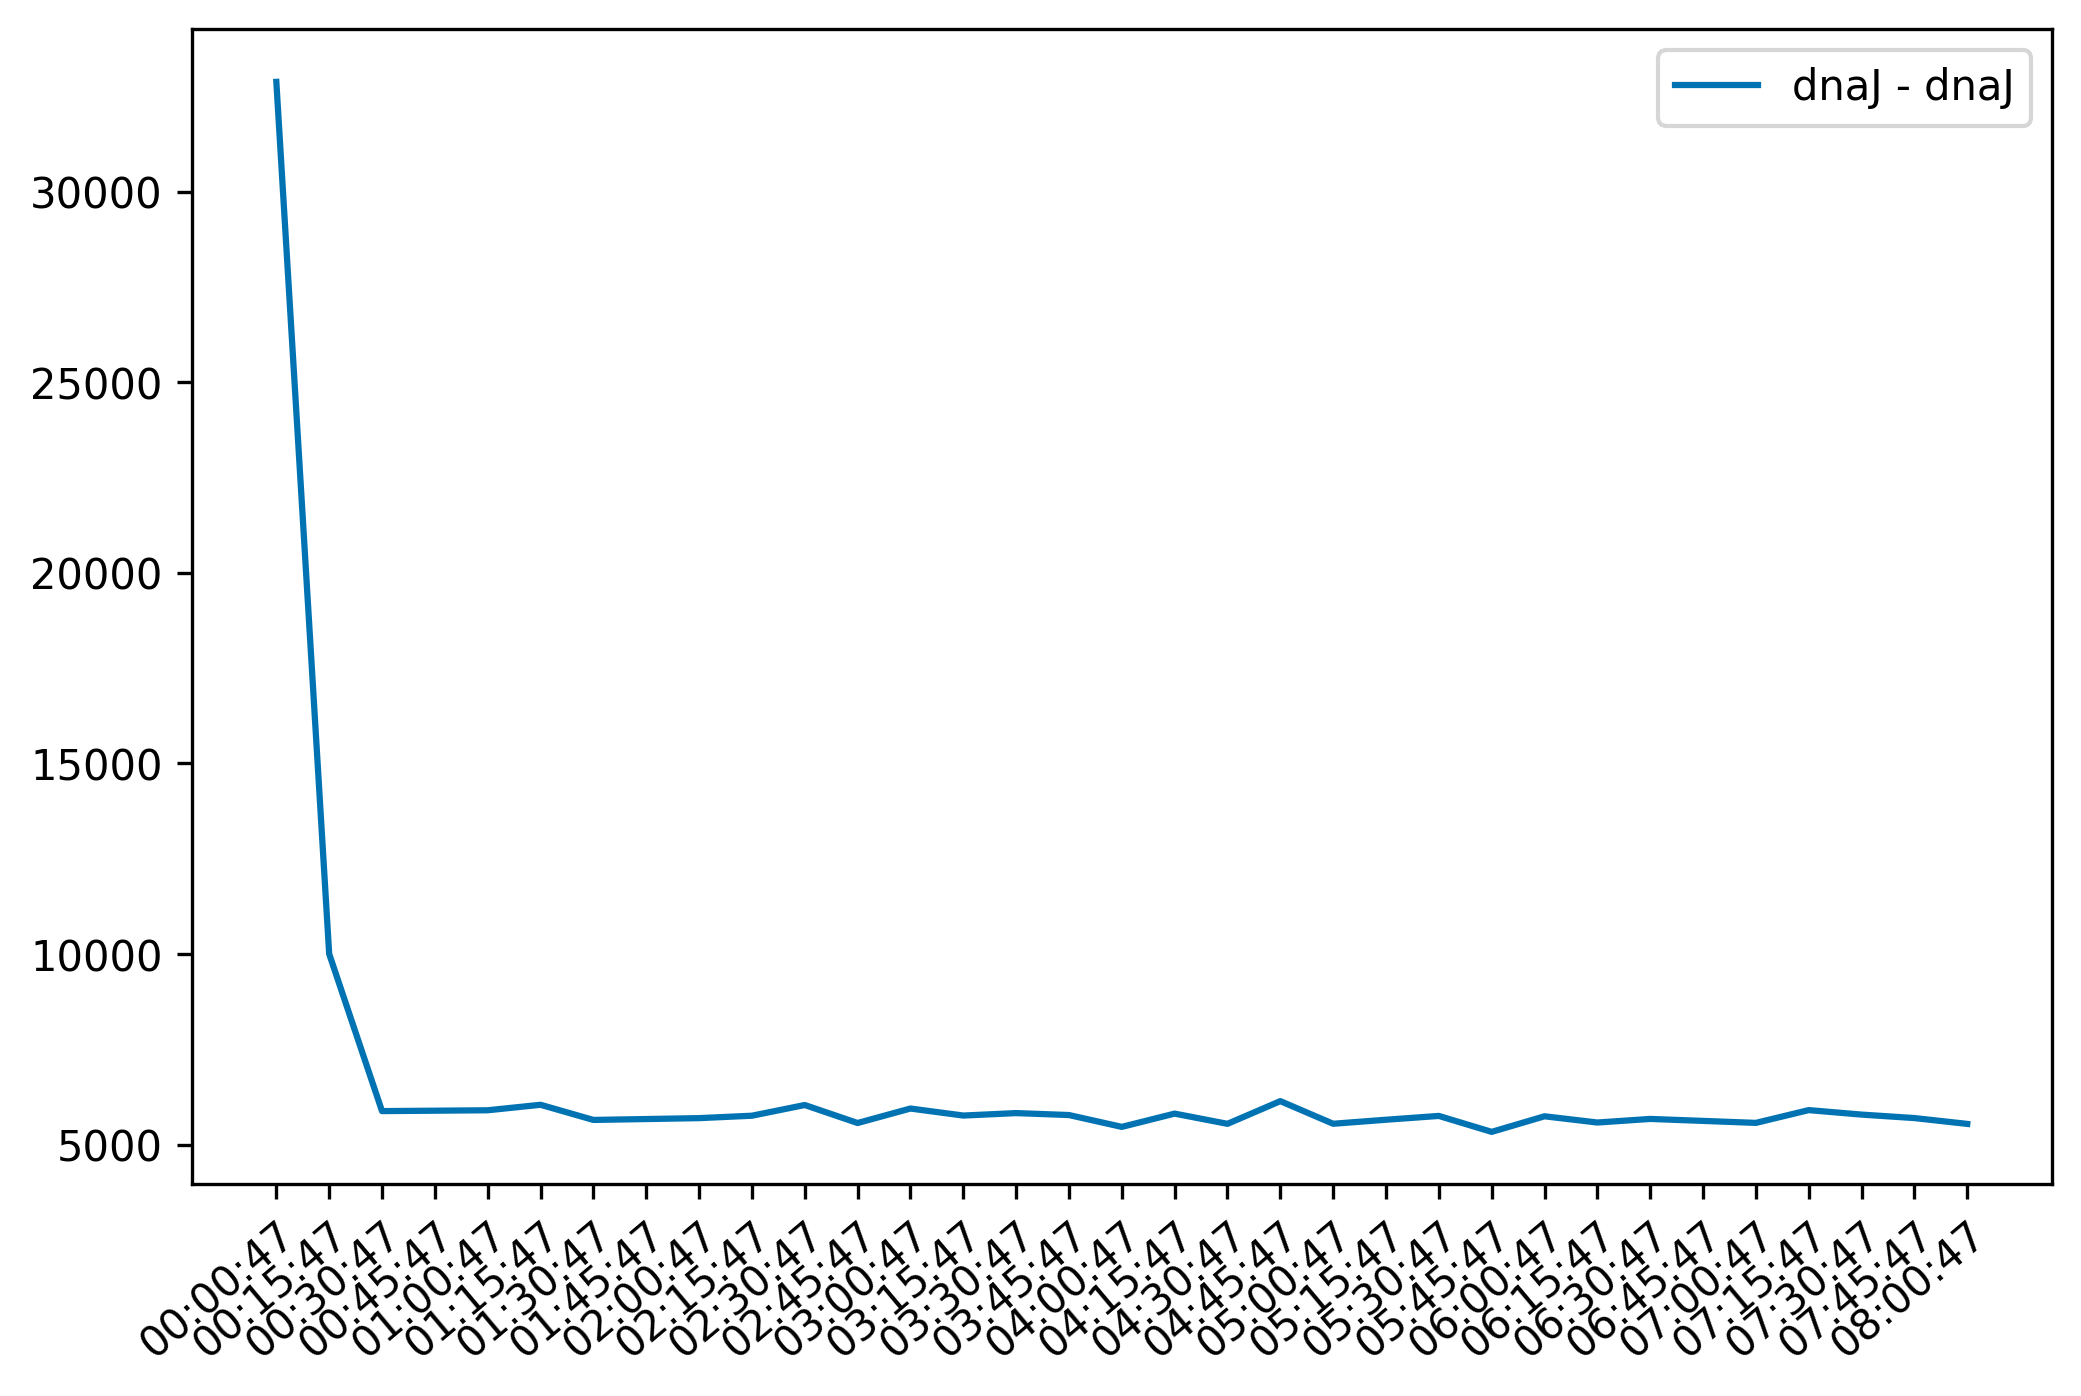

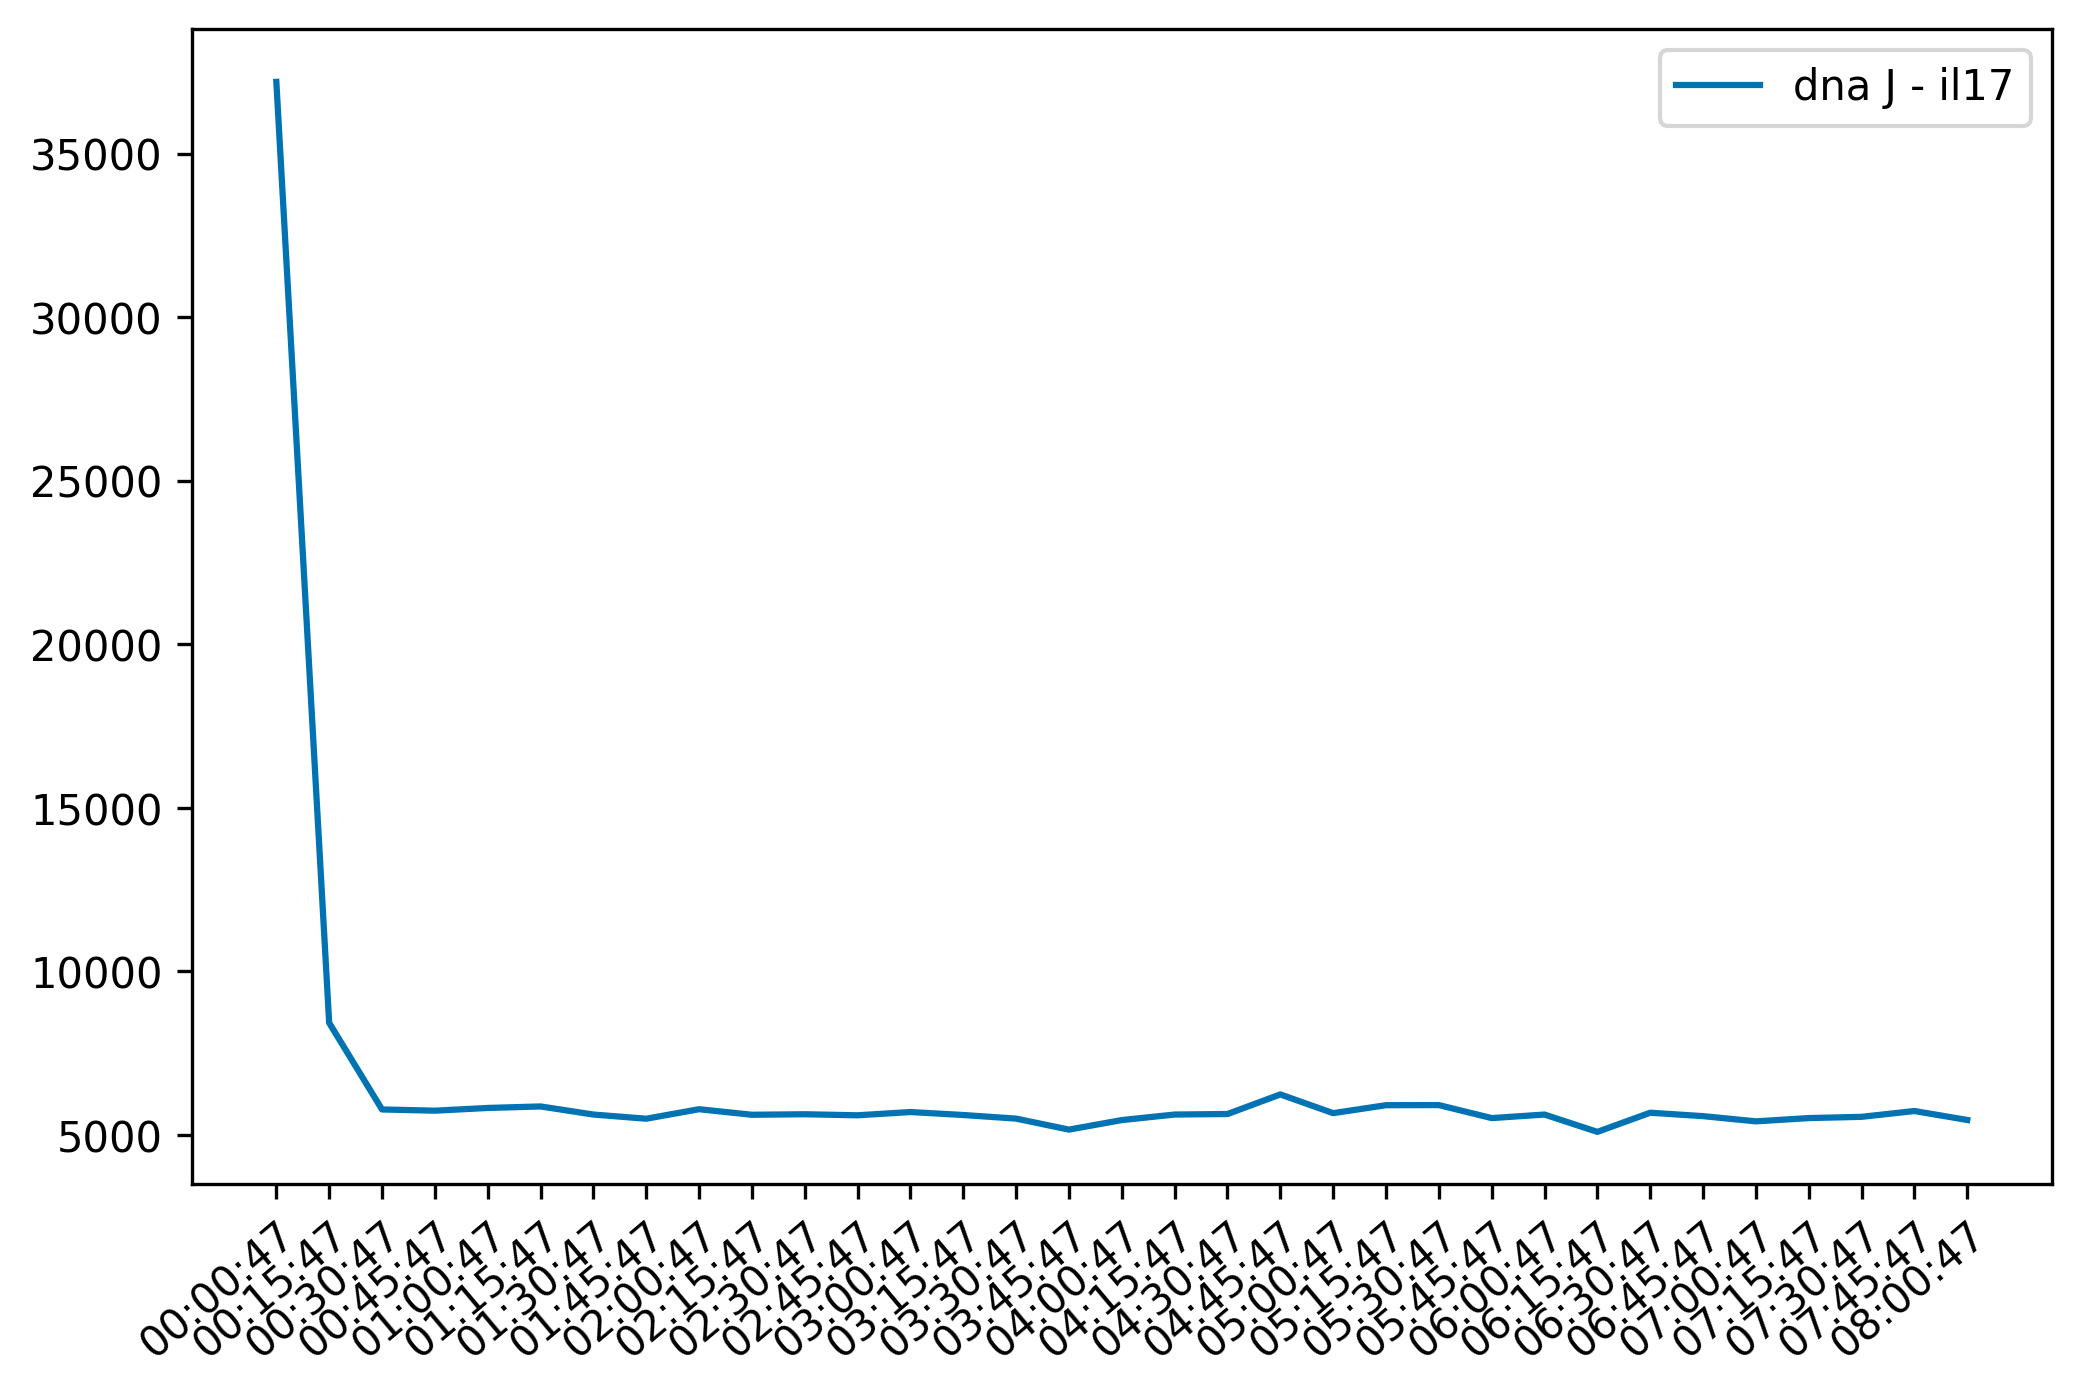

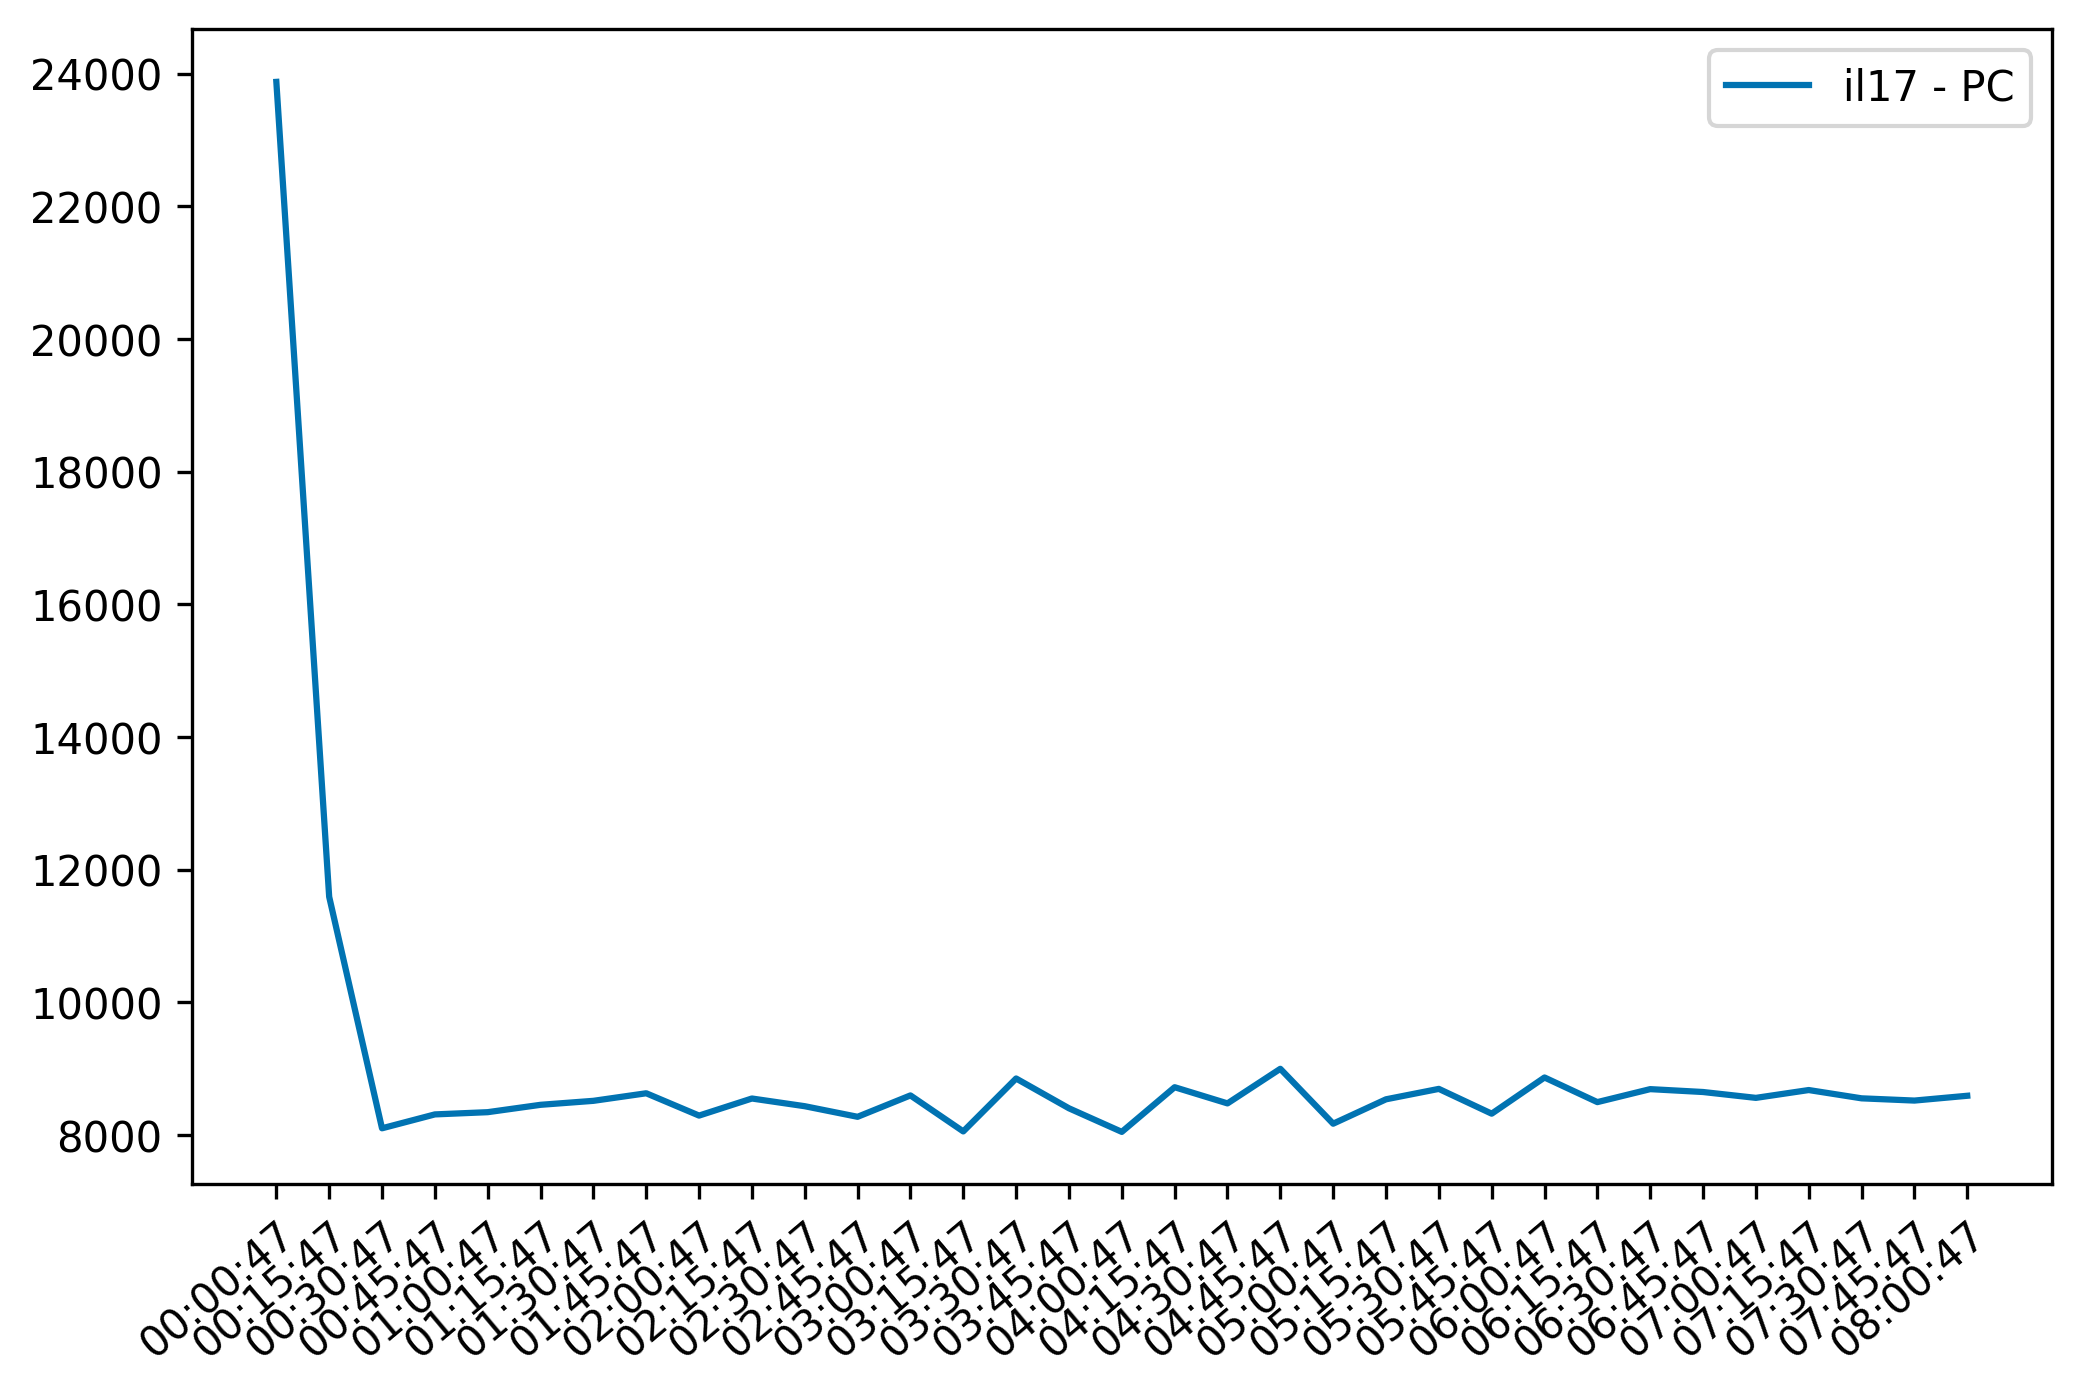

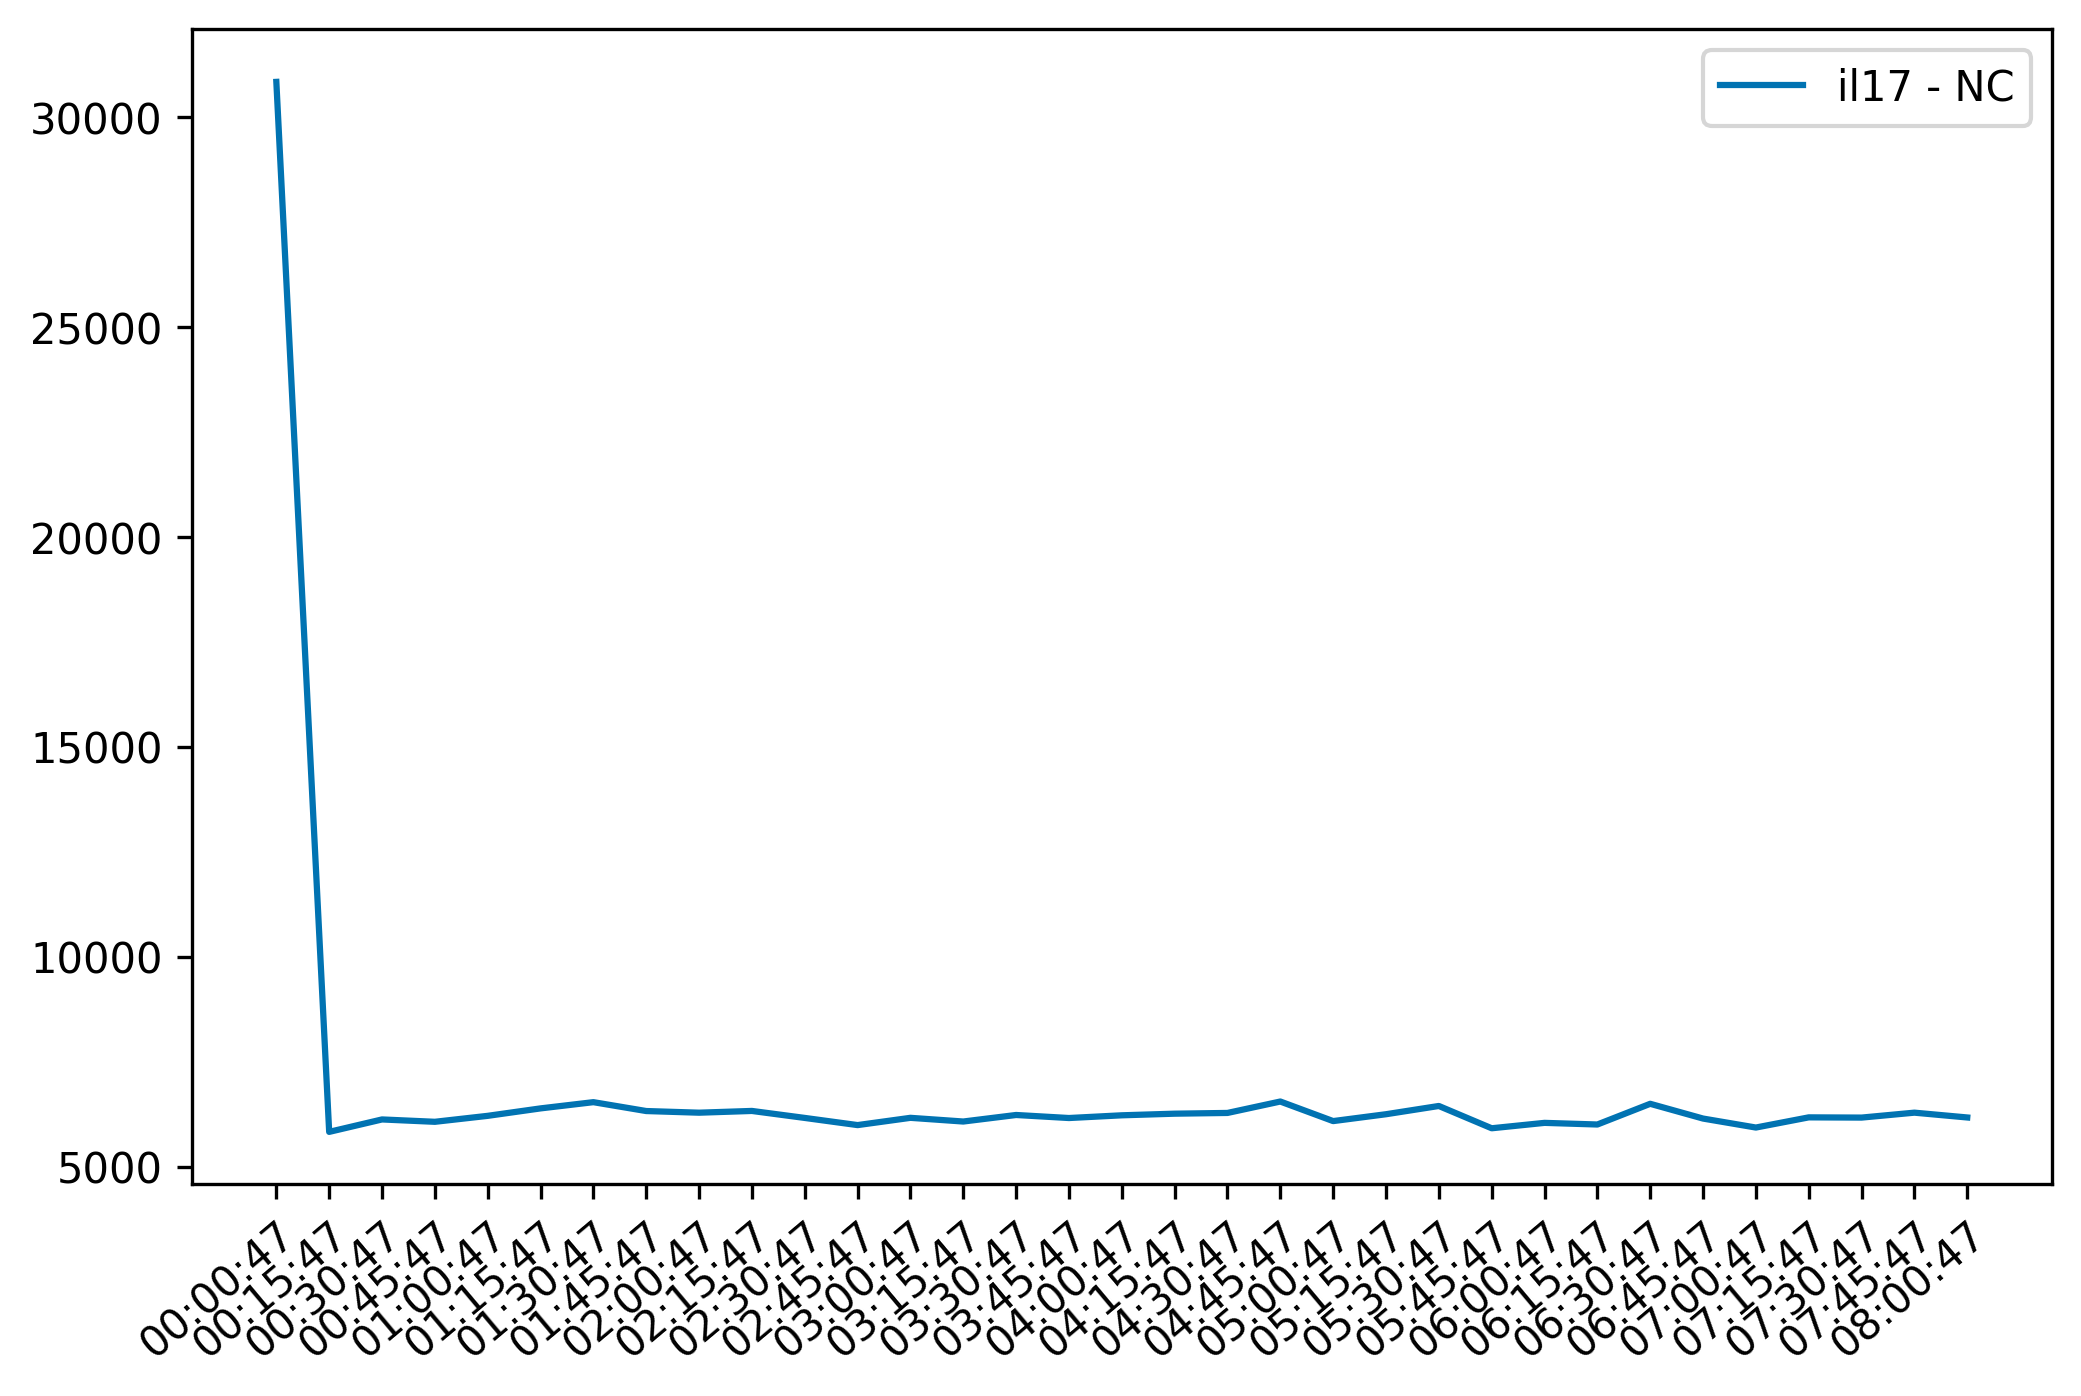

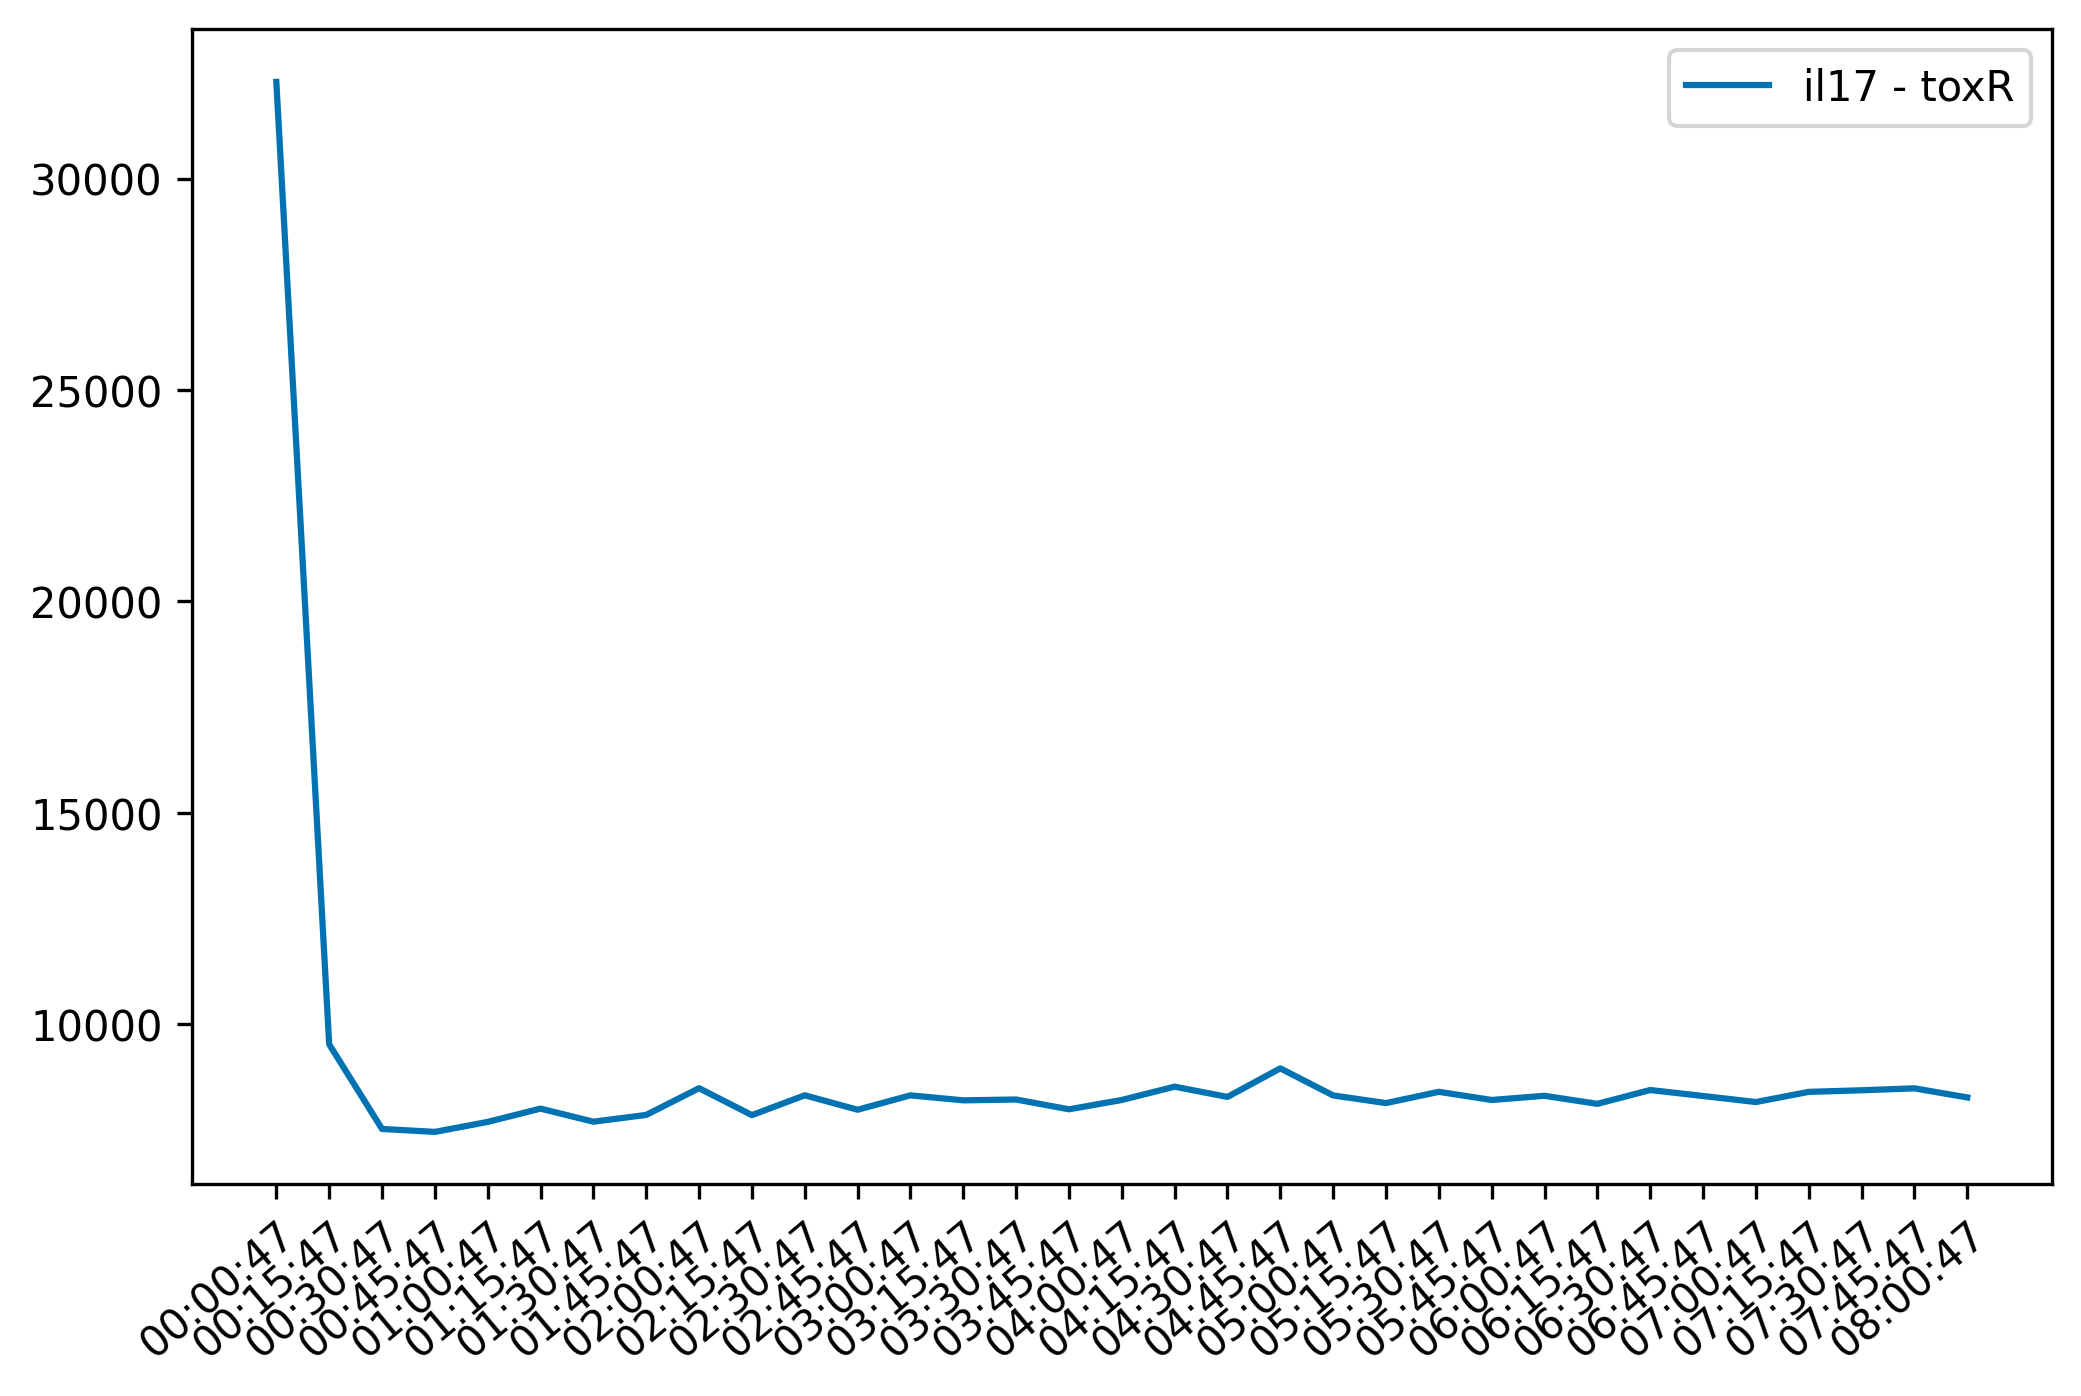

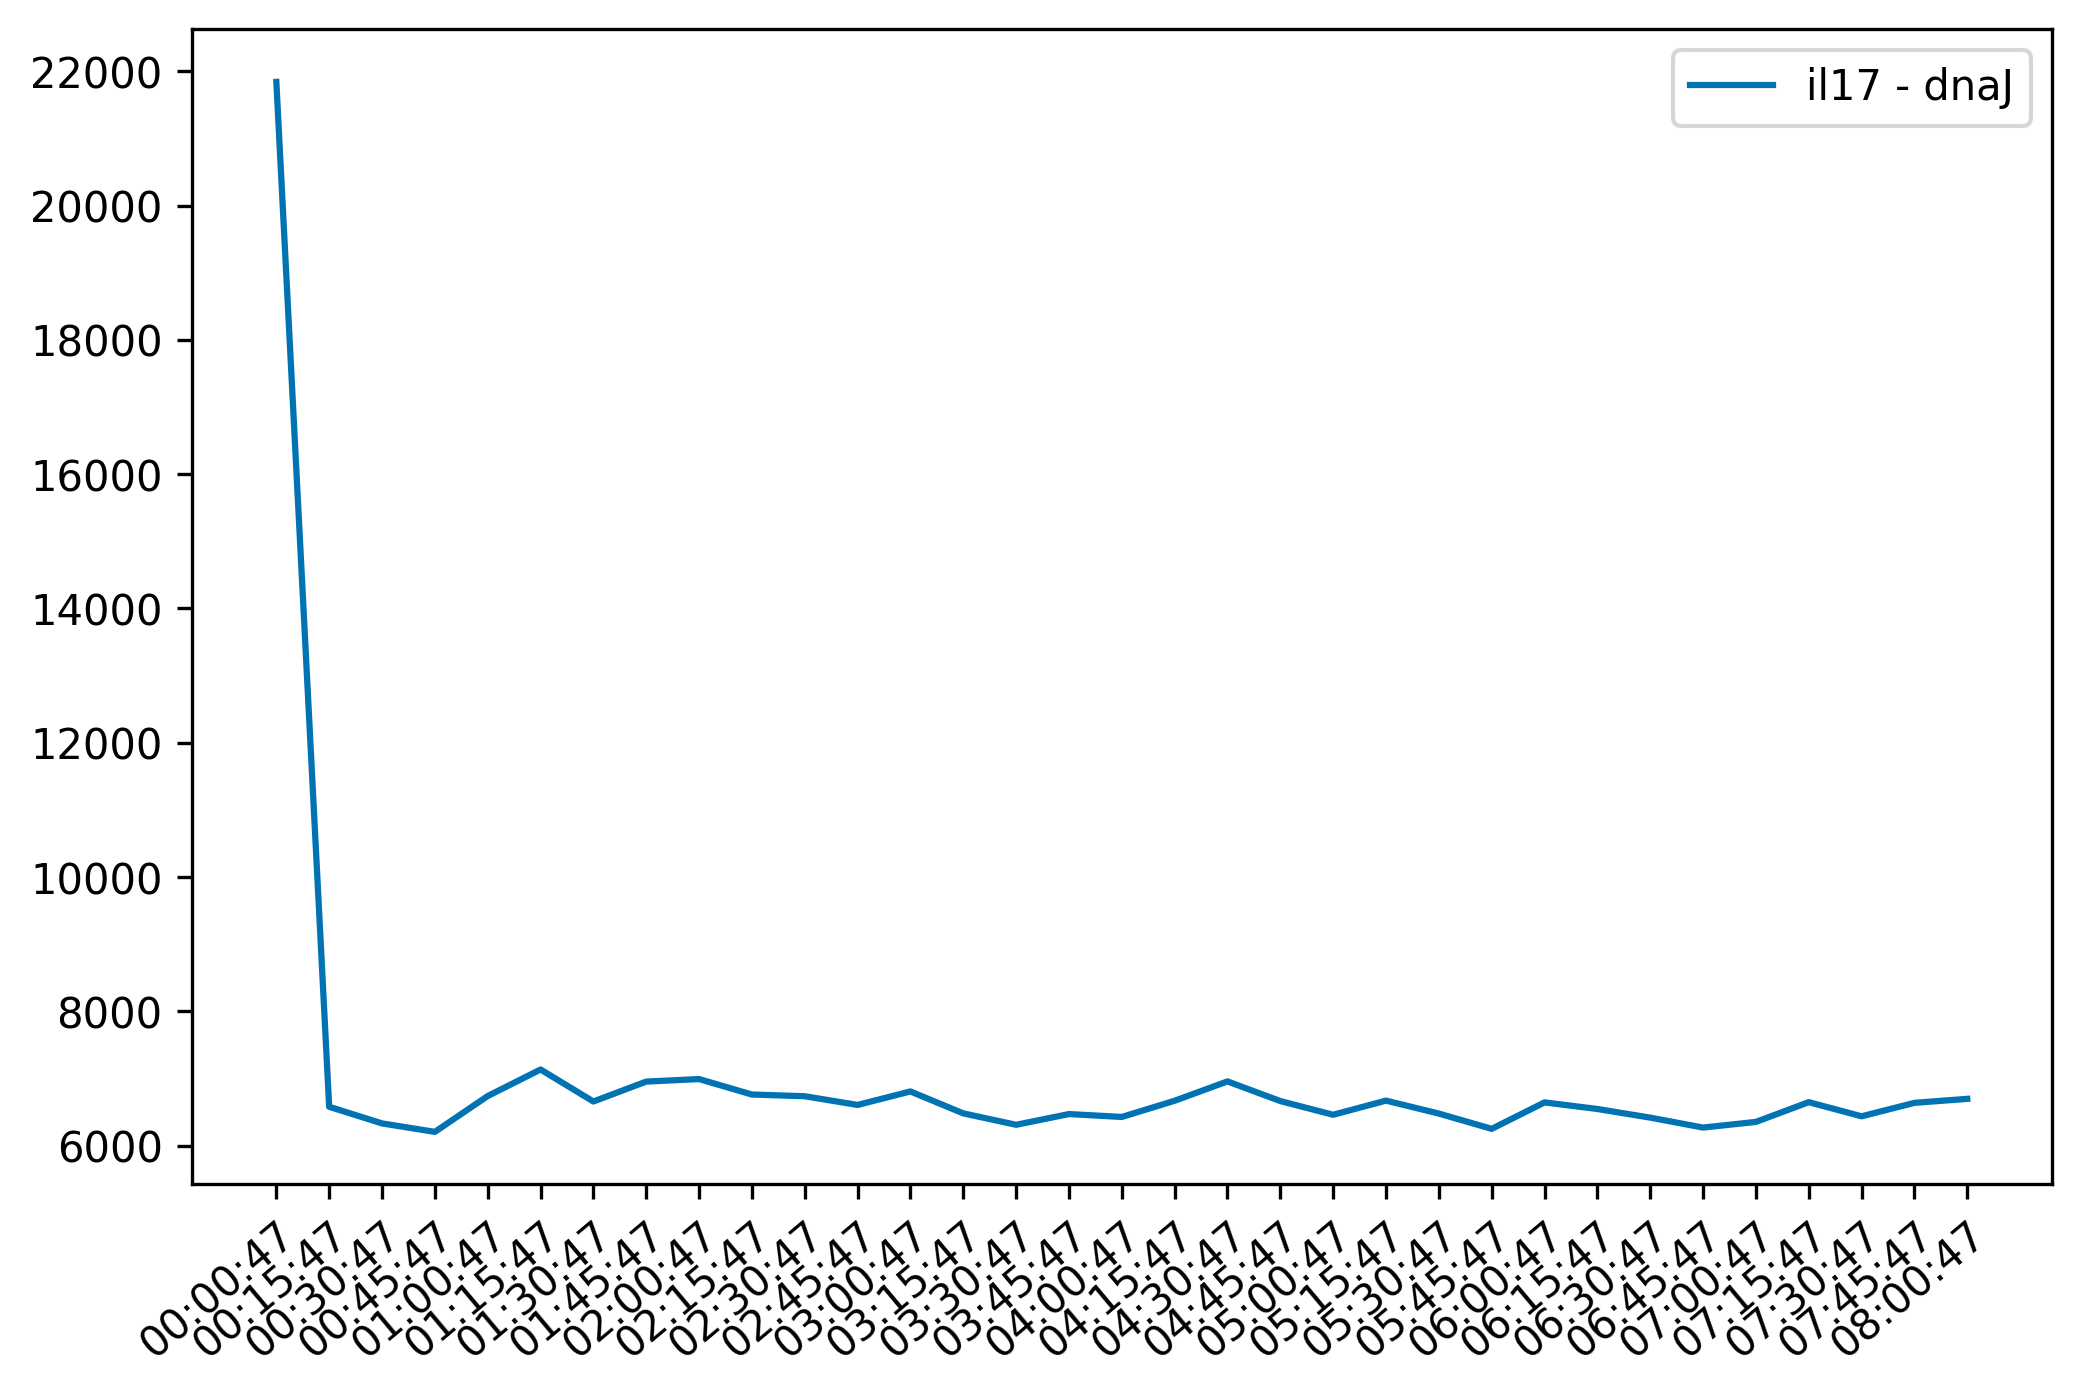

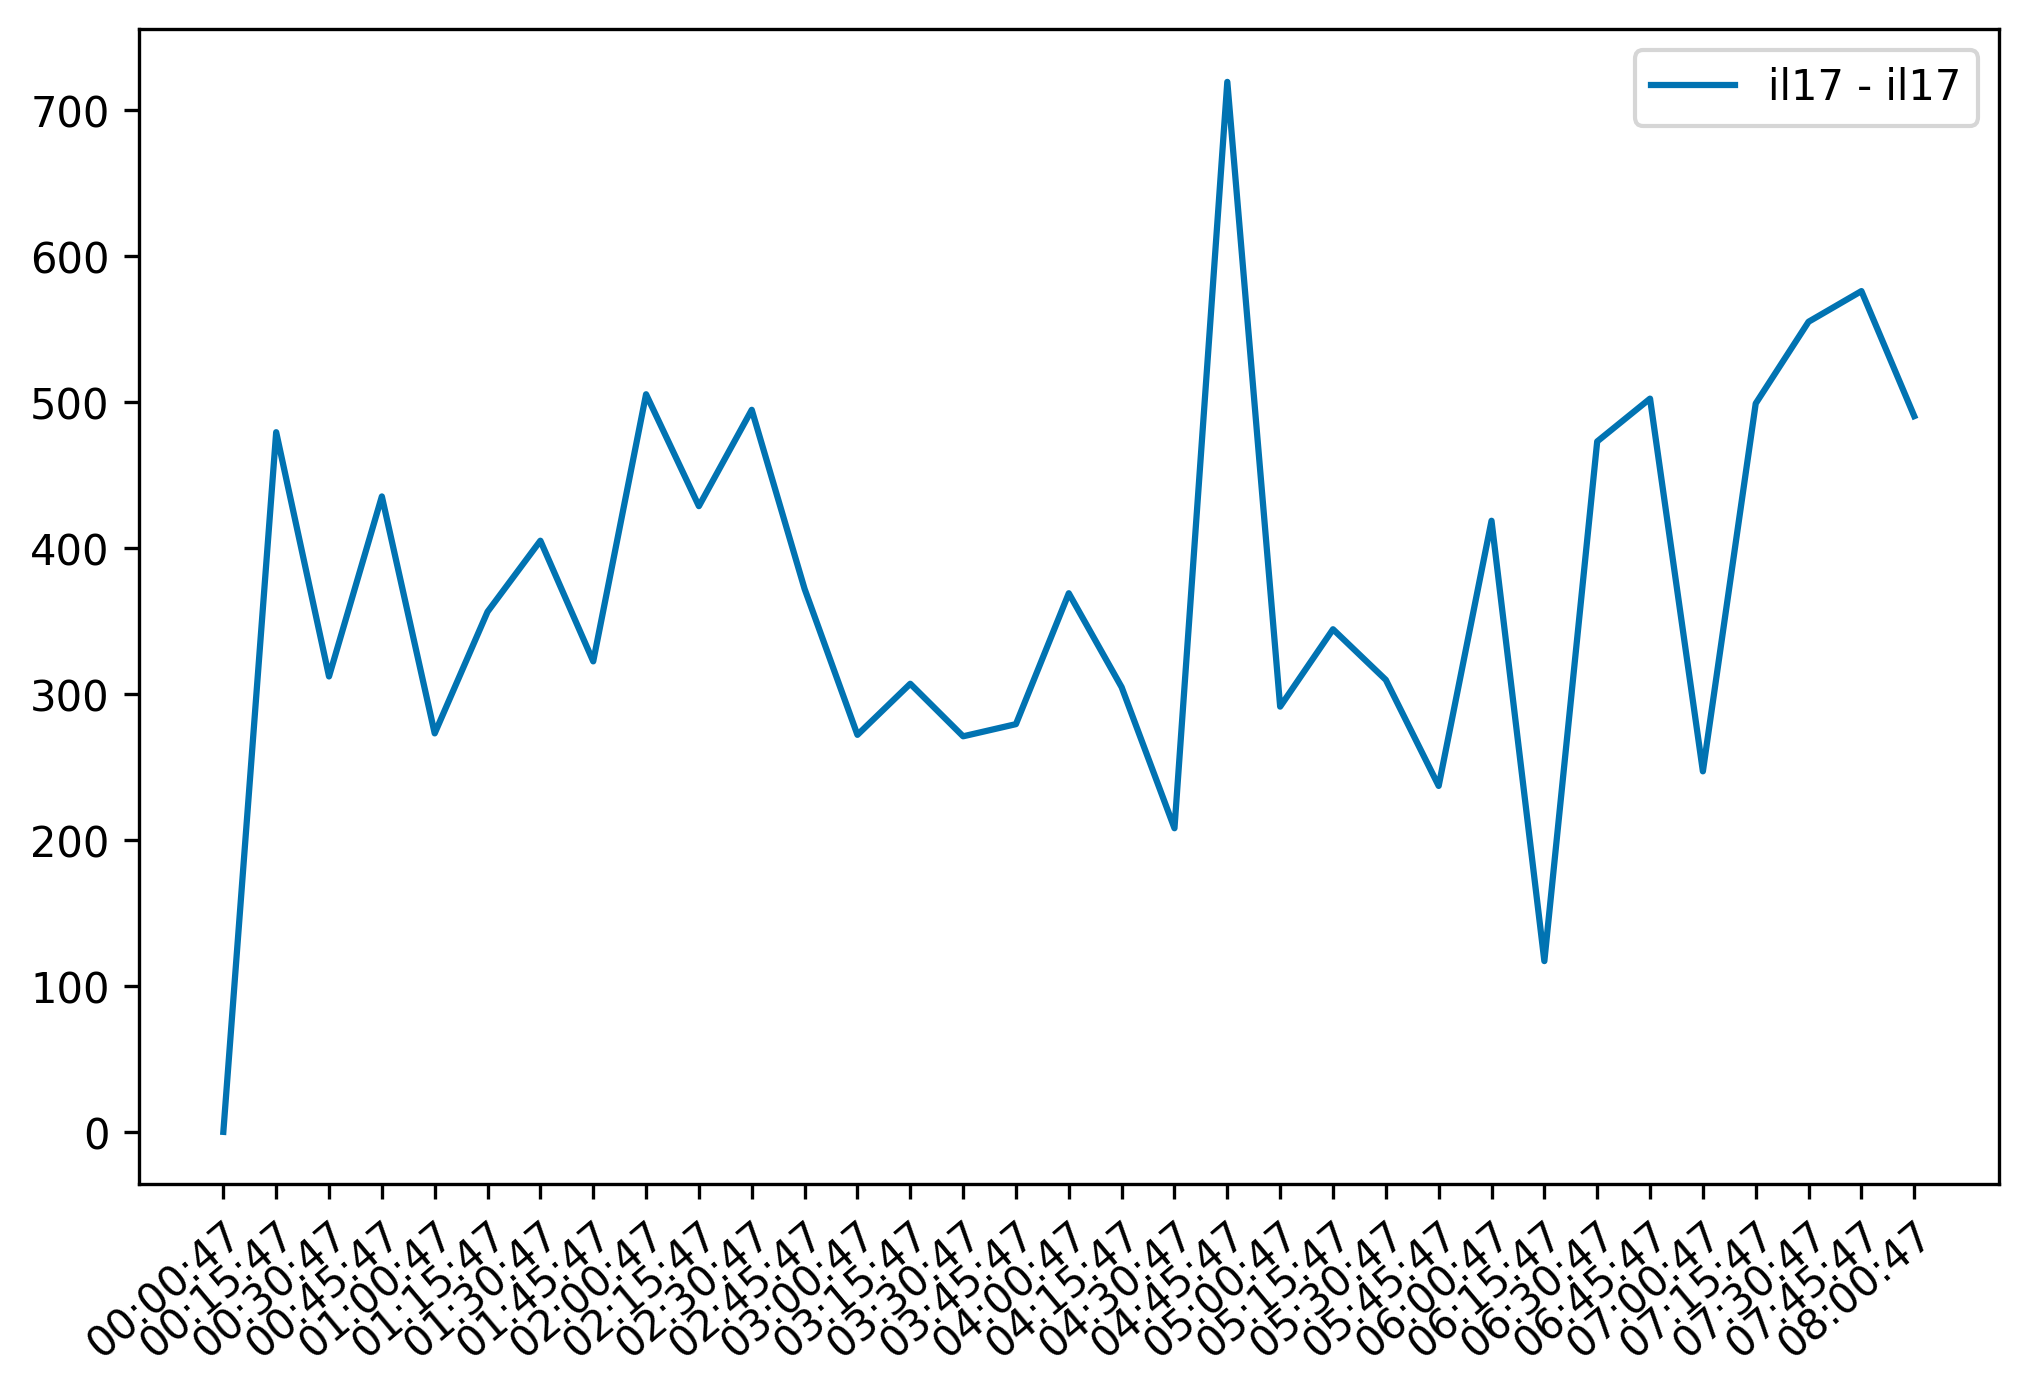

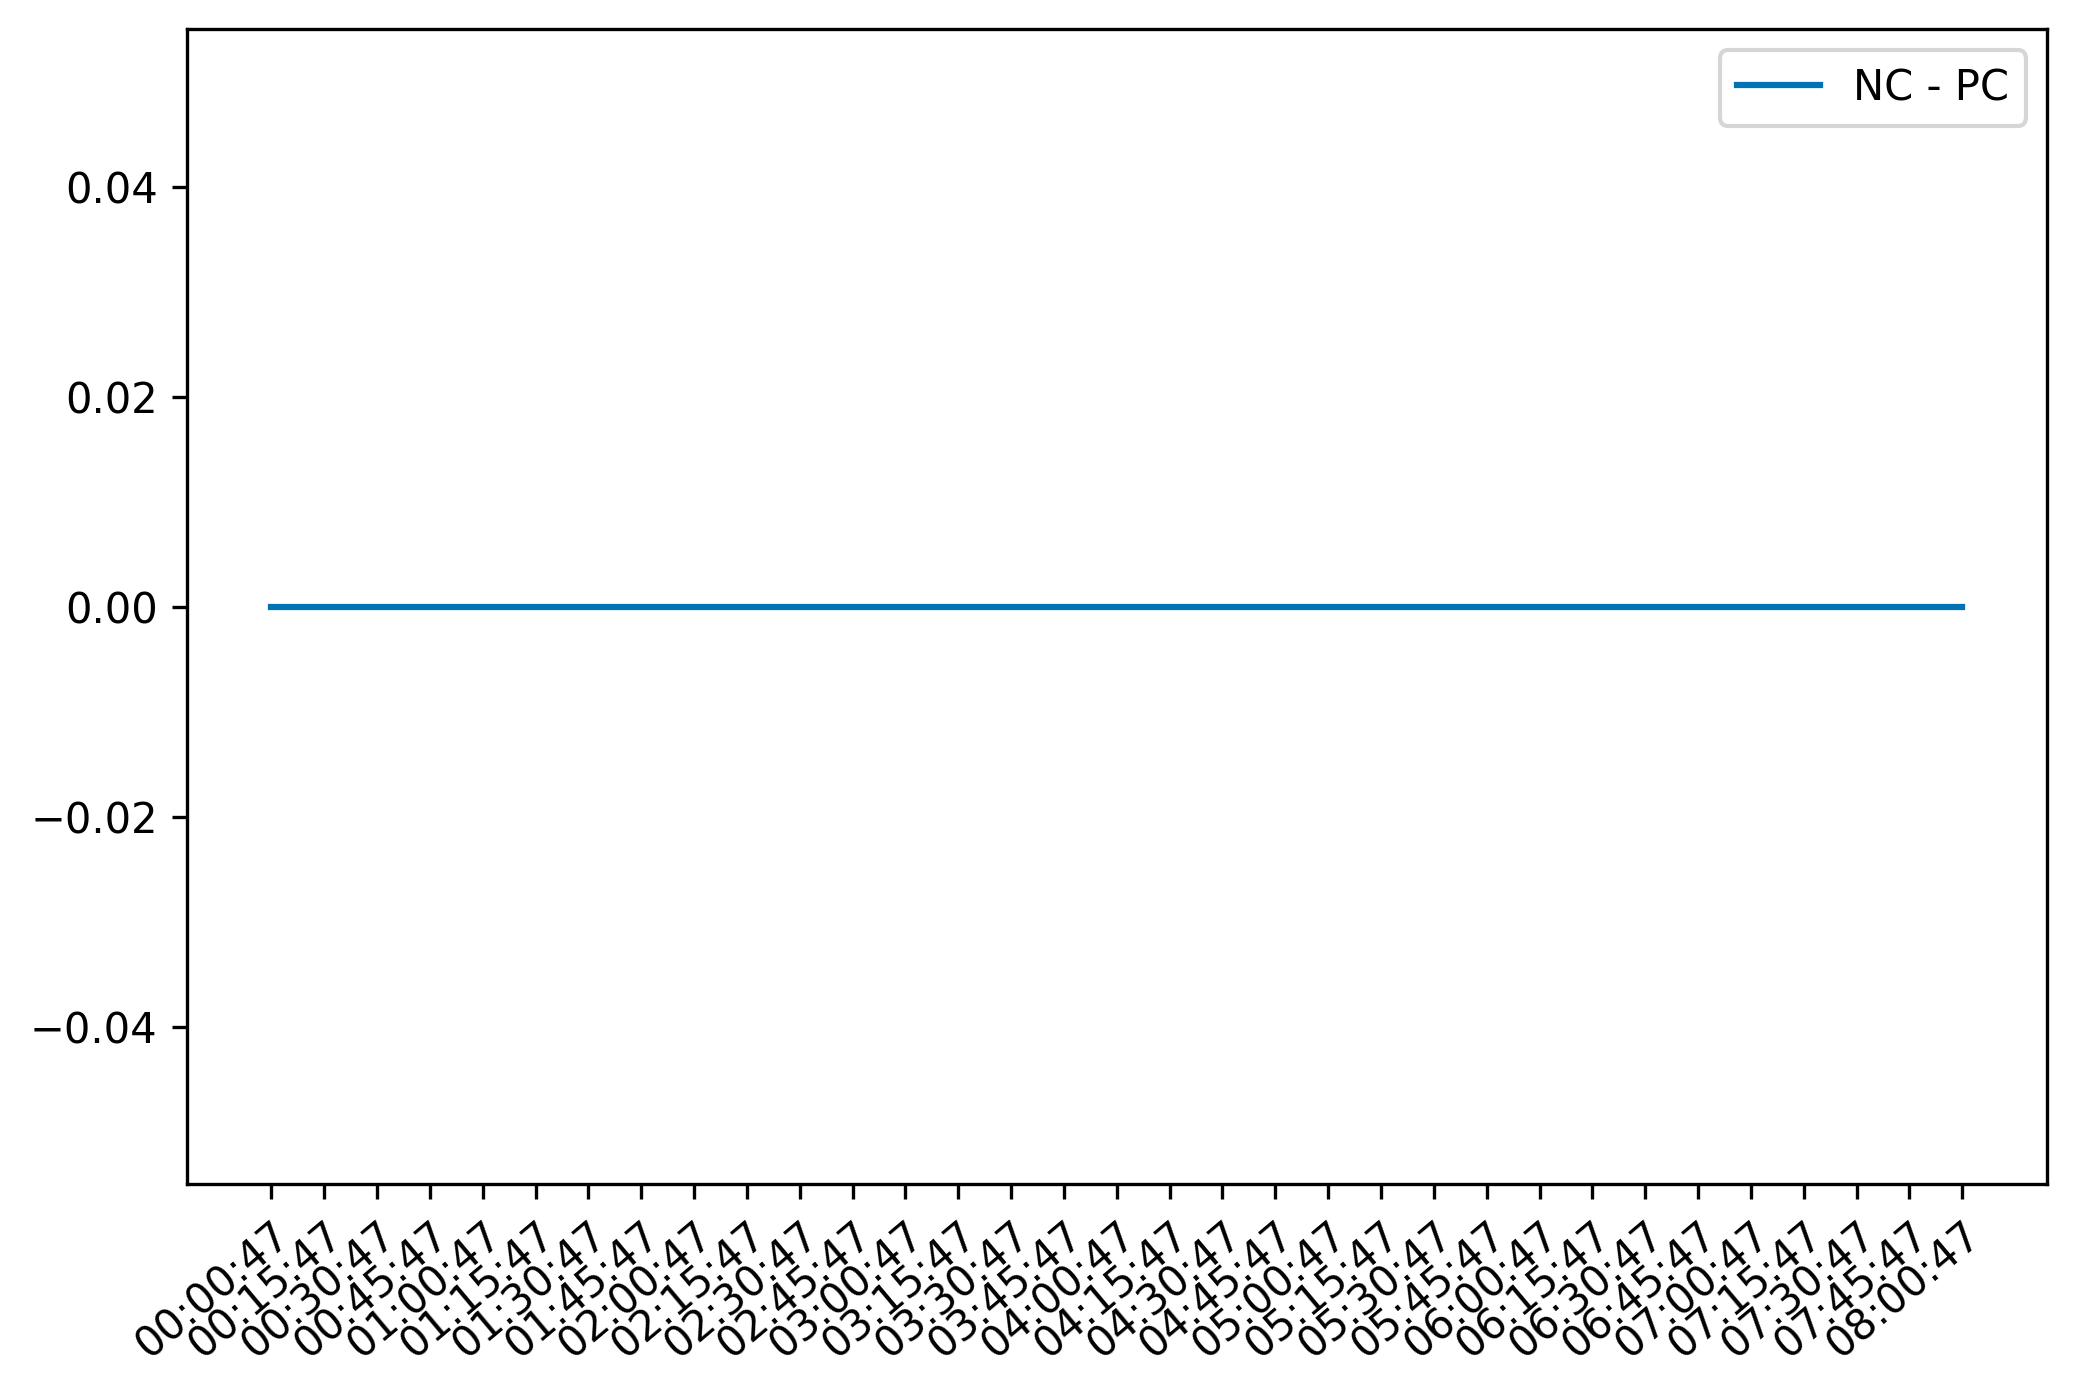

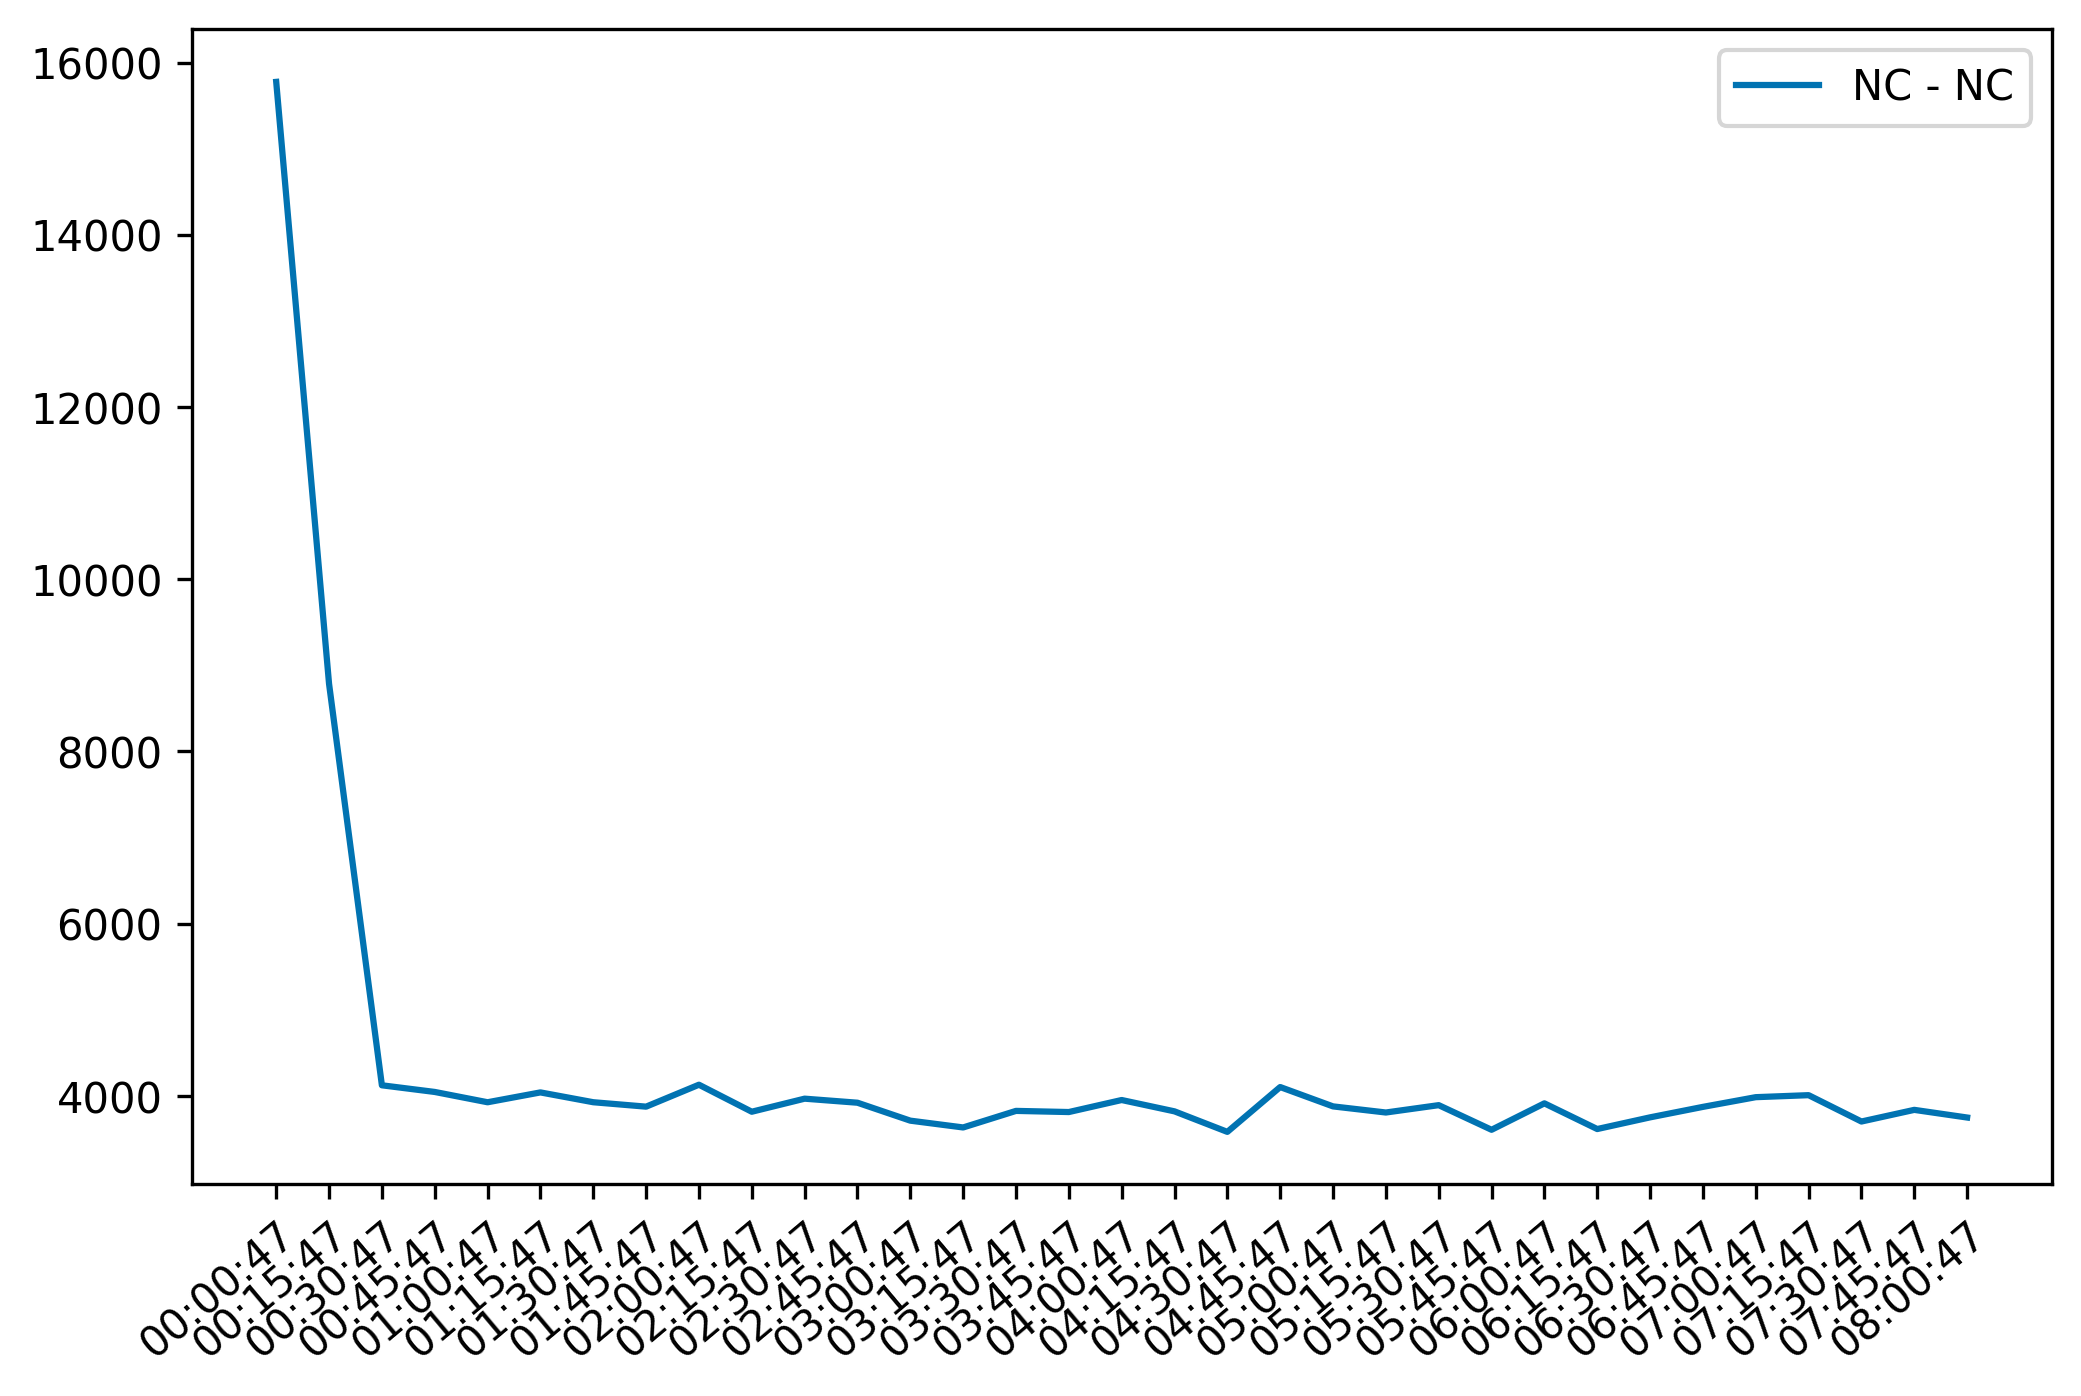

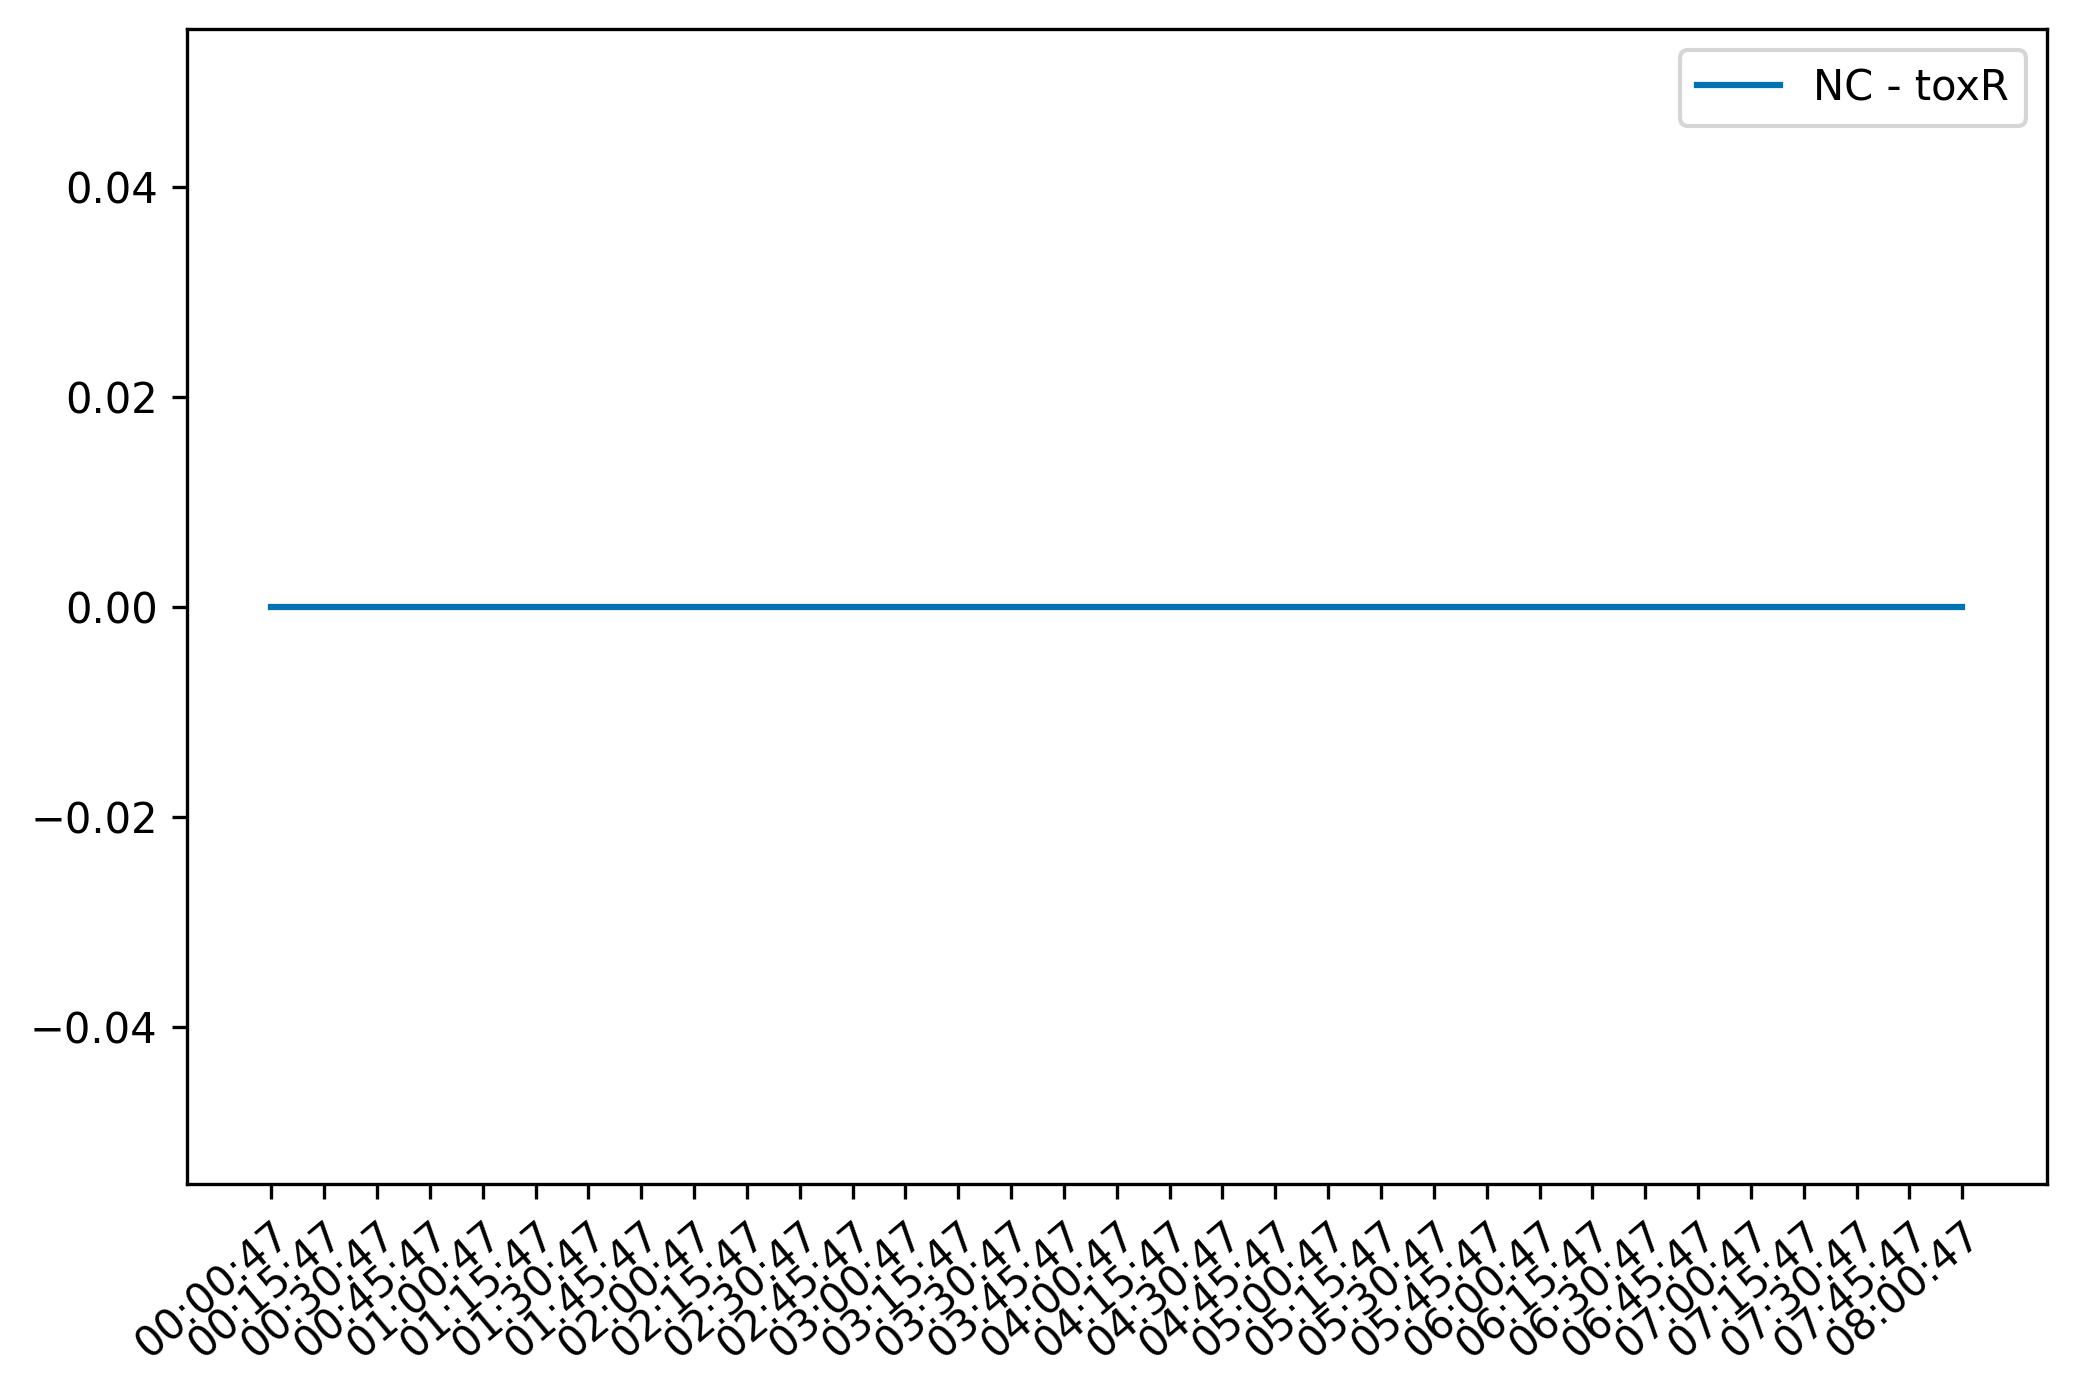

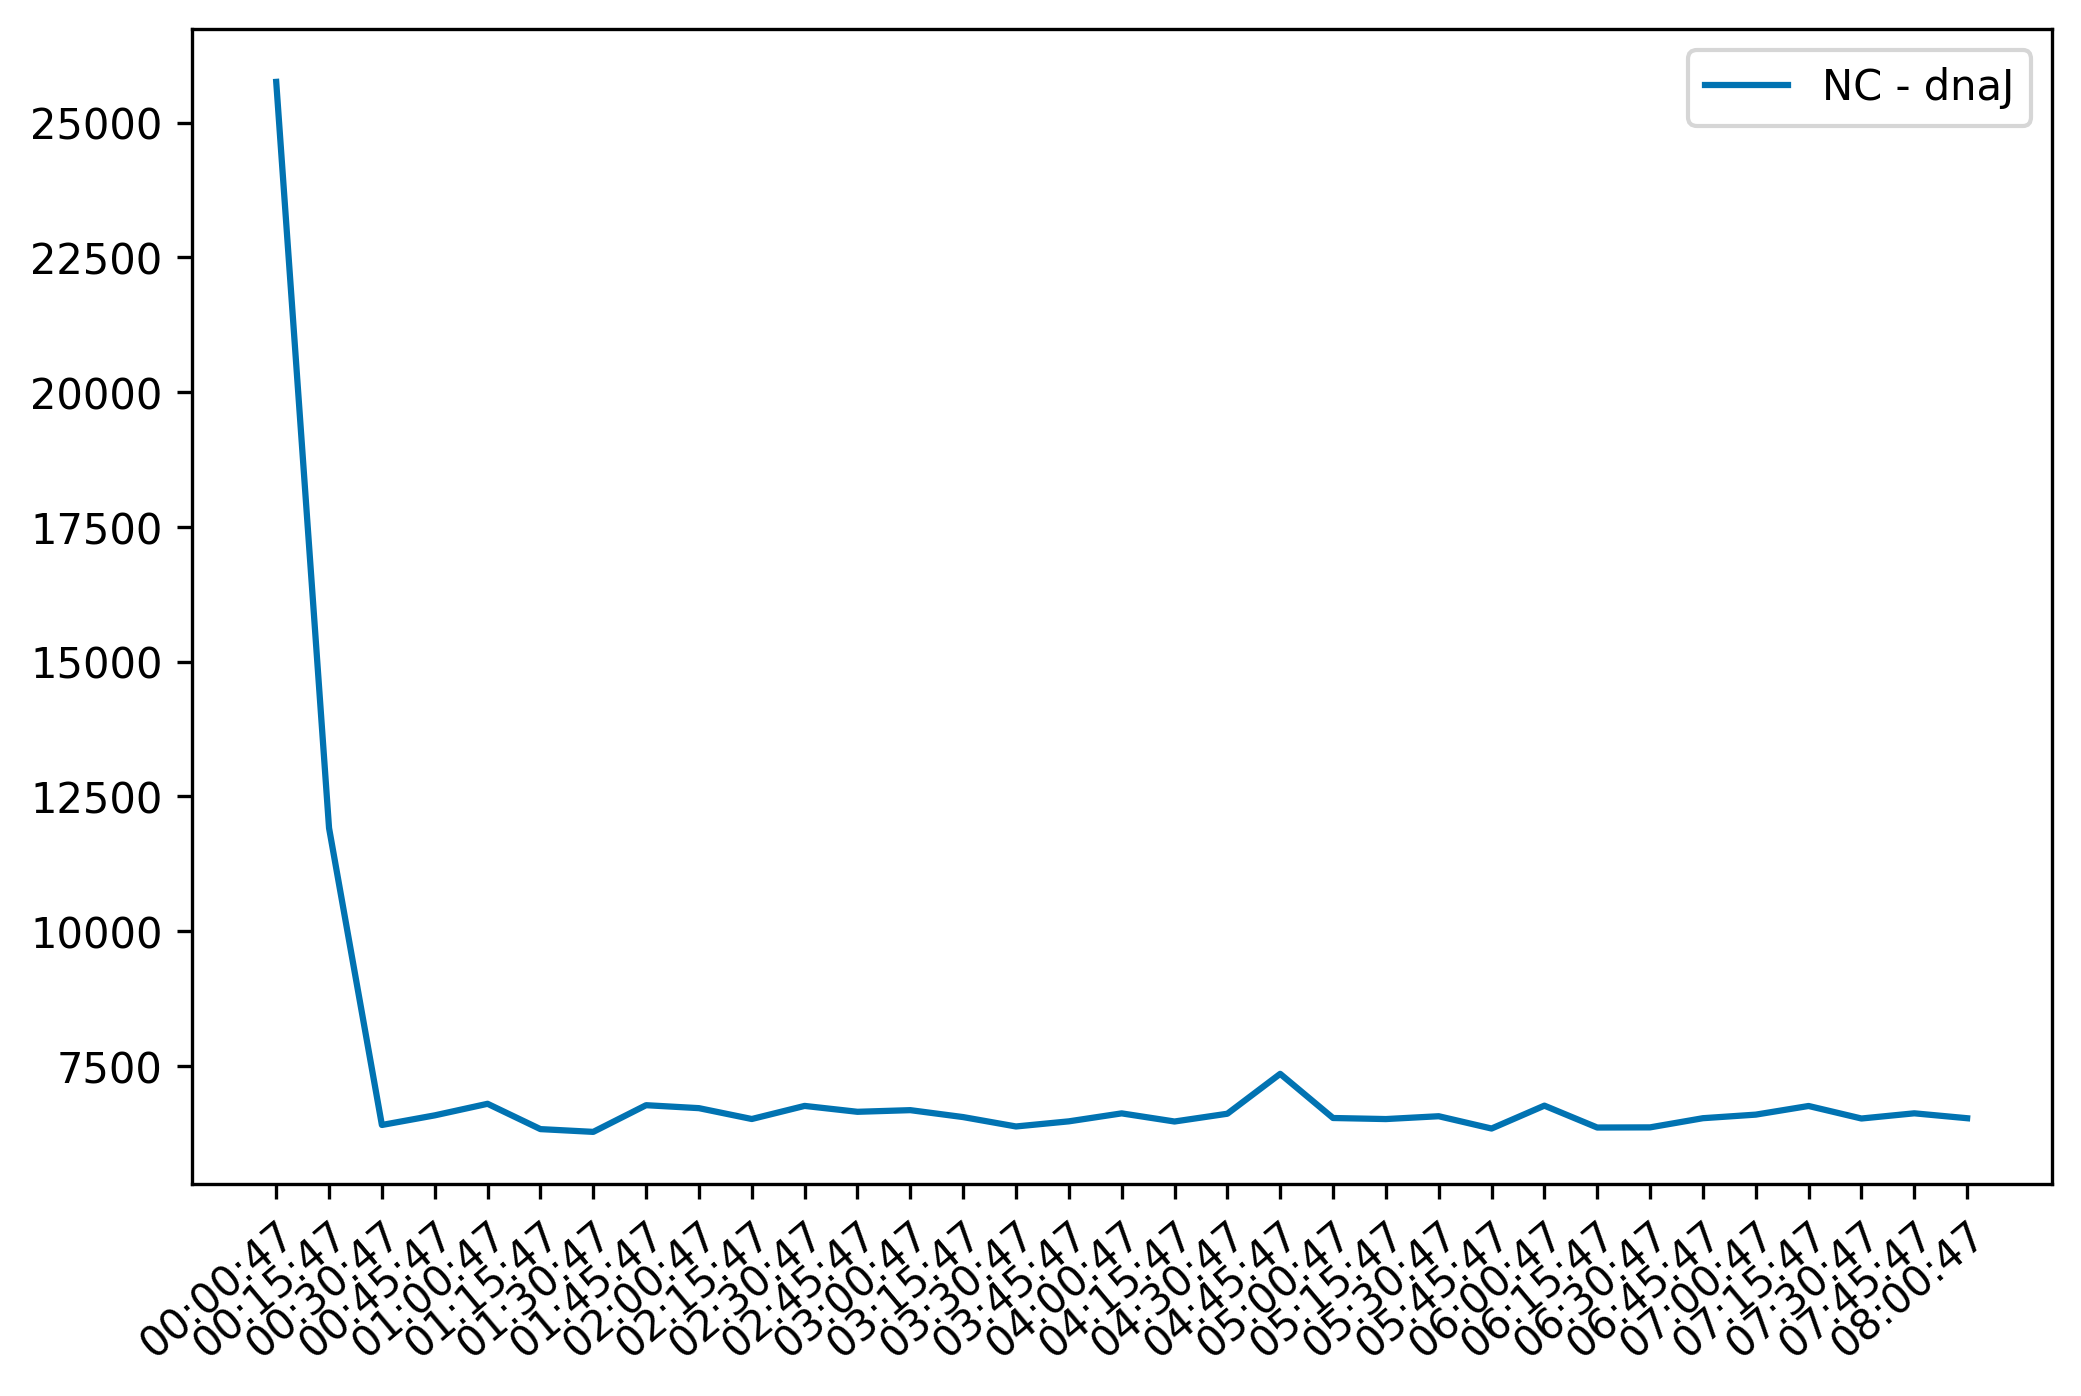

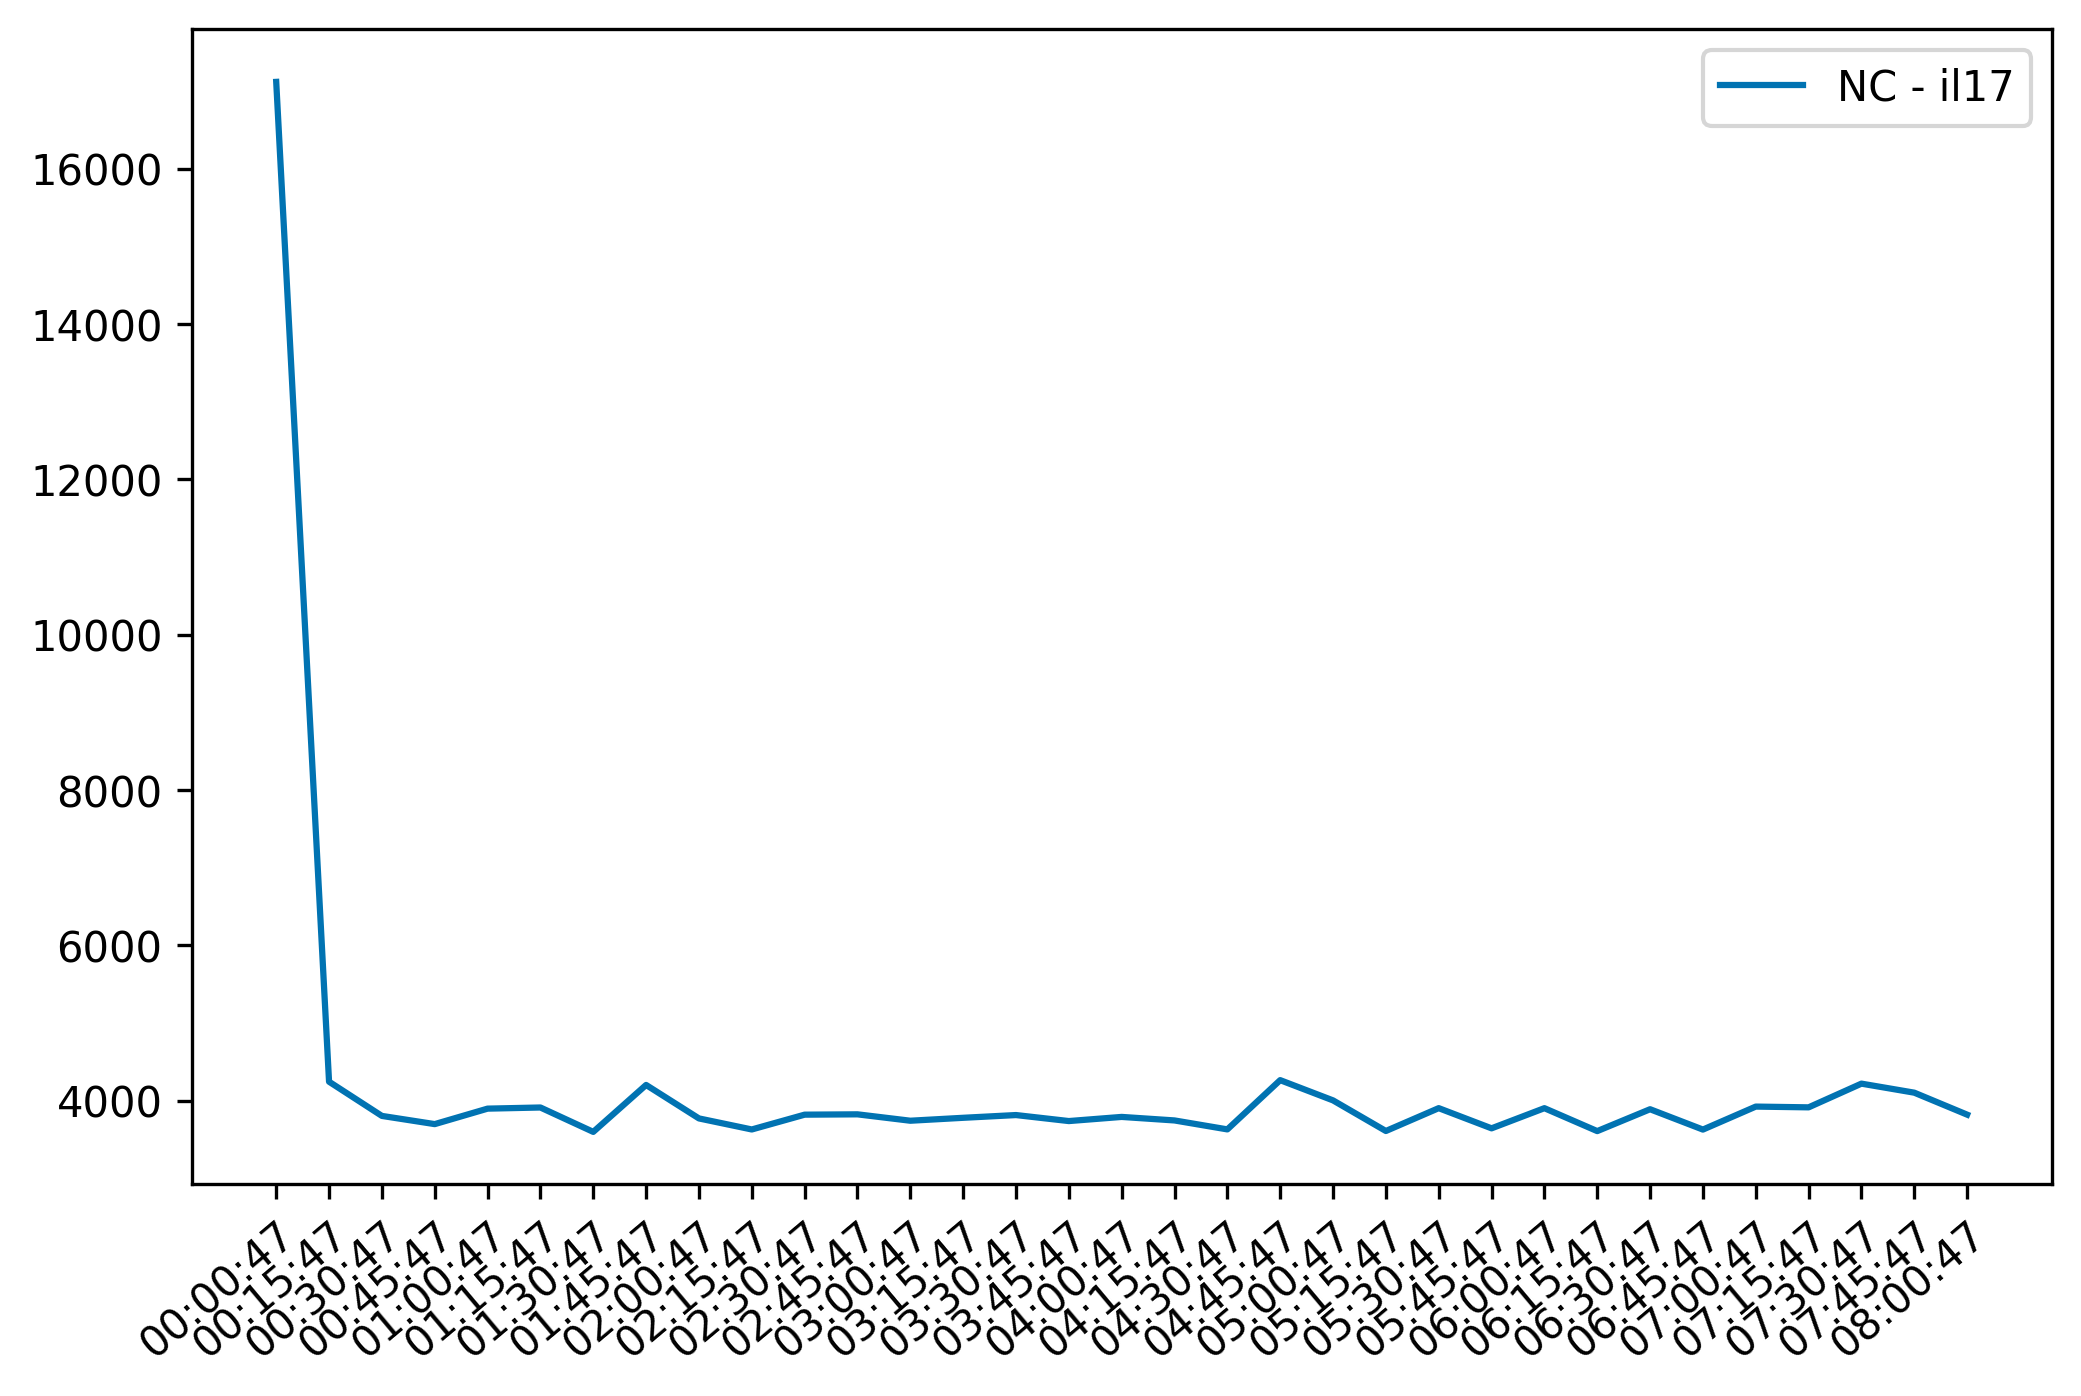

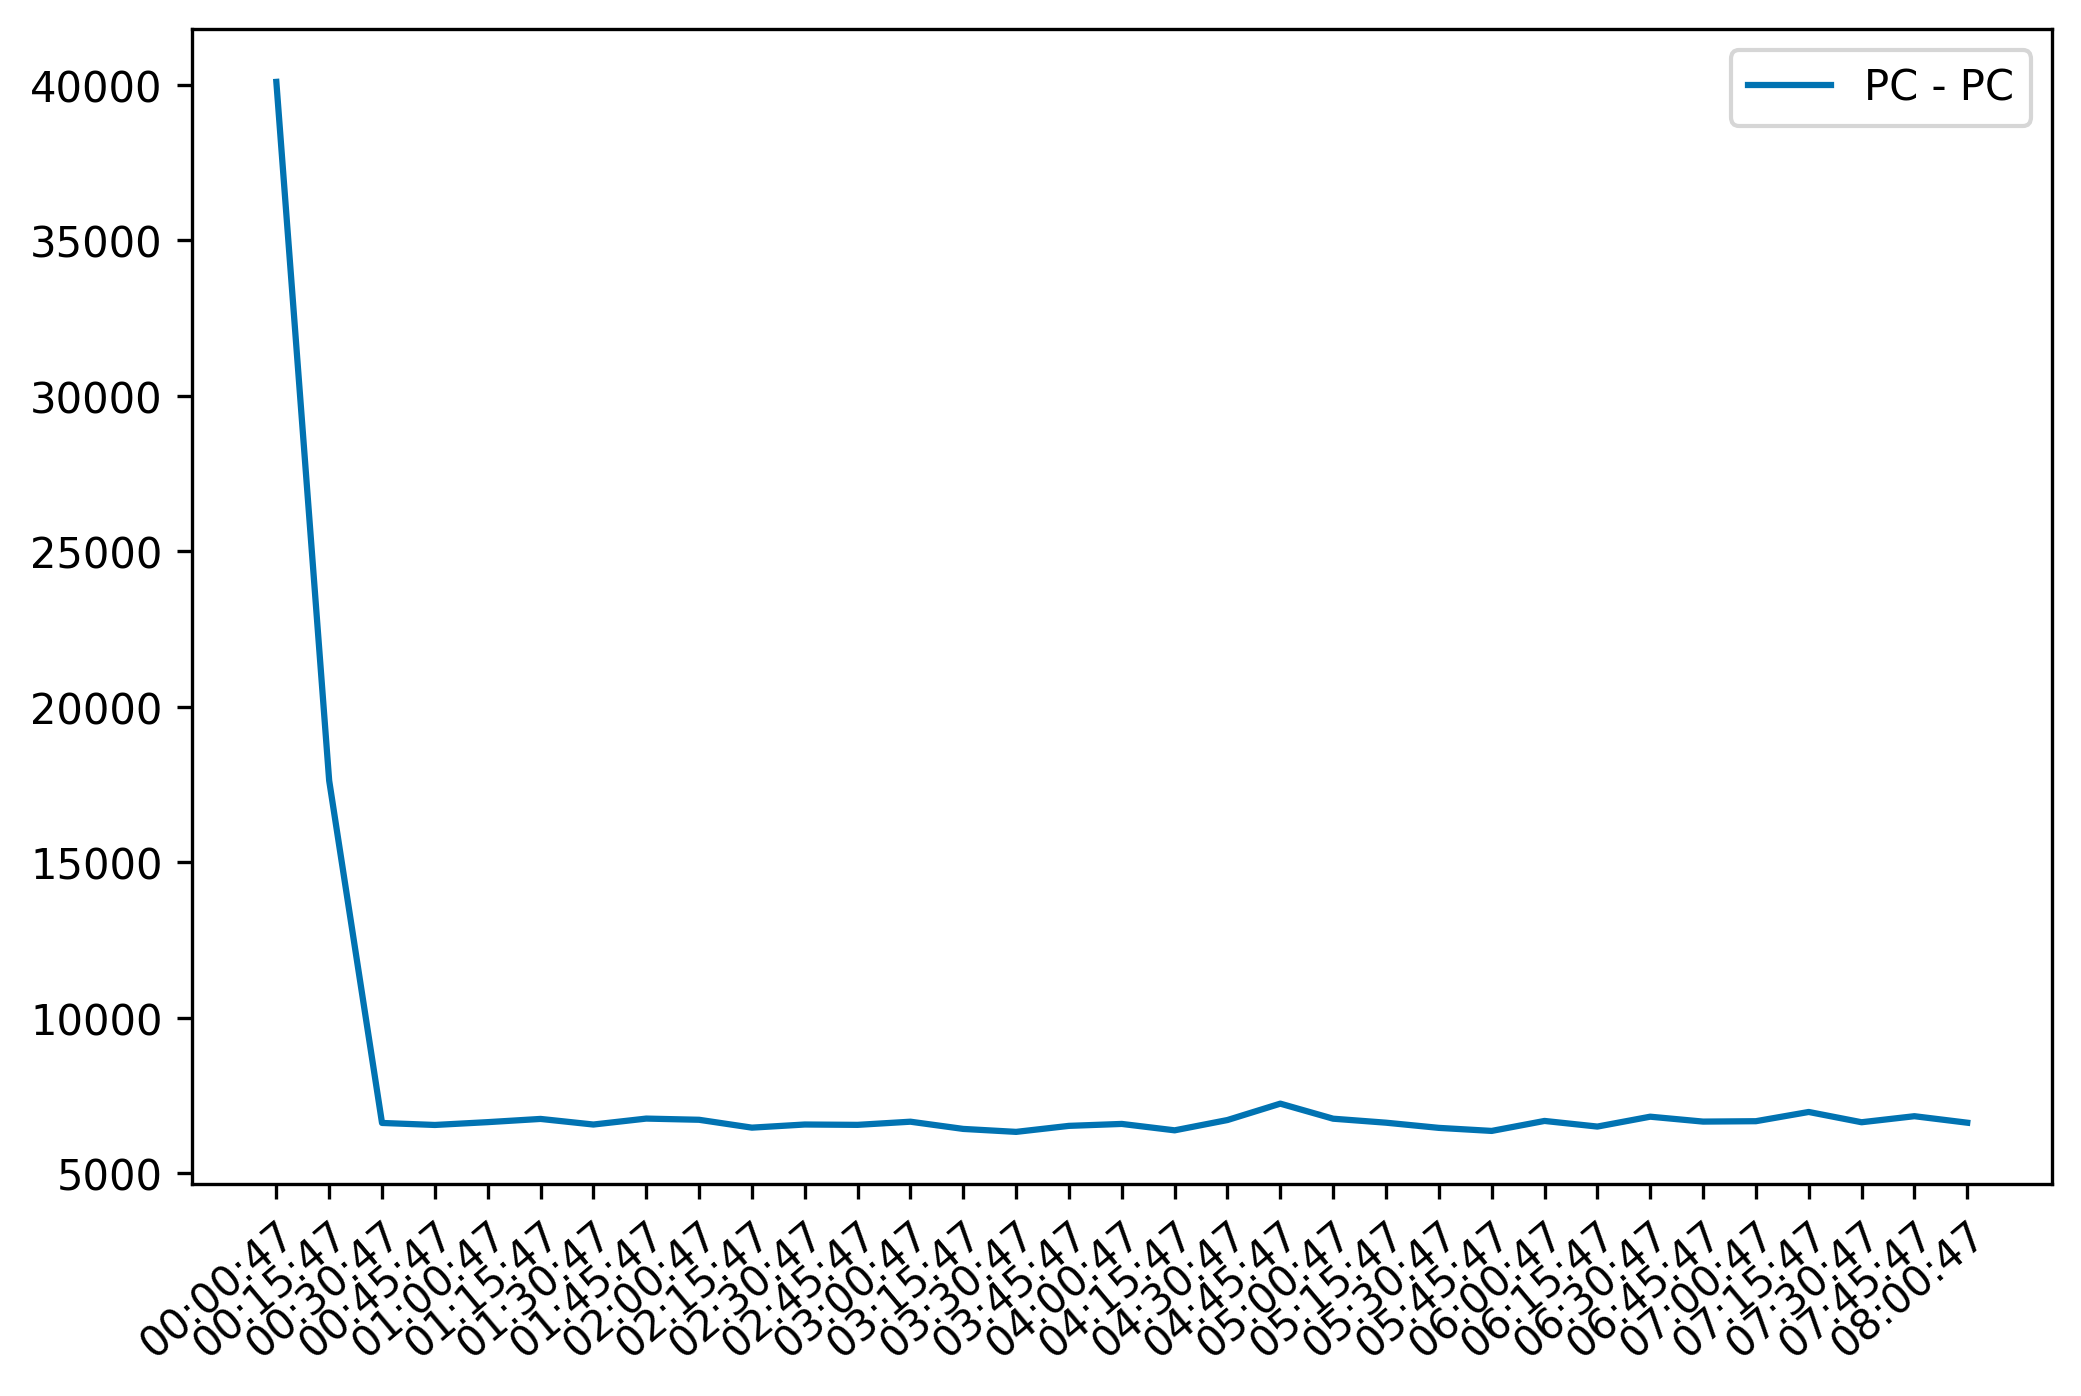

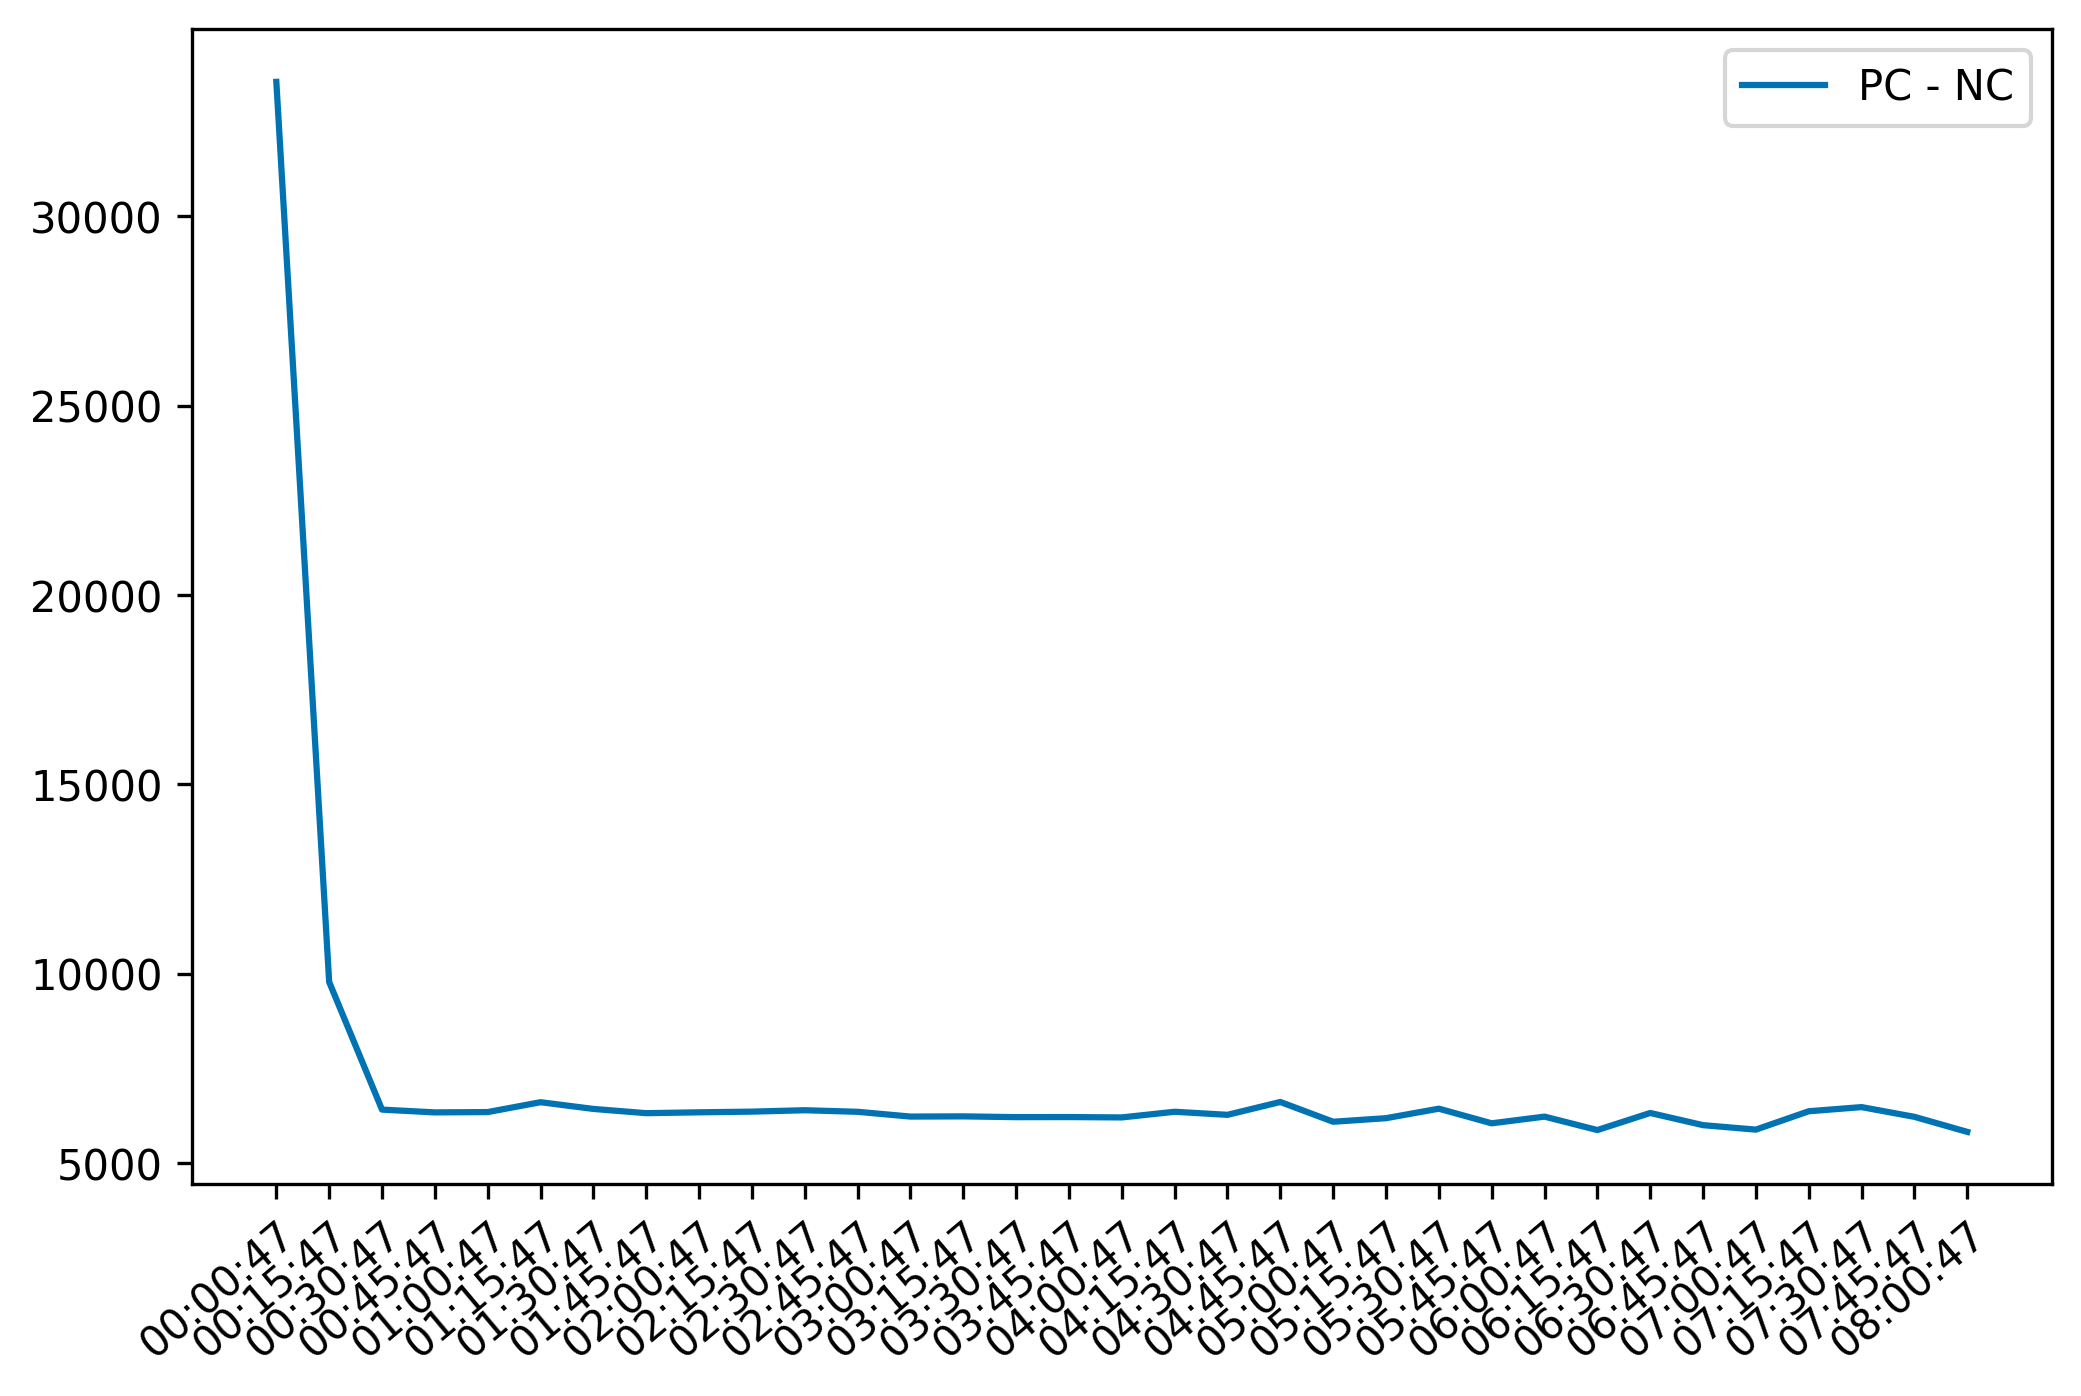

In [25]:
c = [x for x in targets.columns if x != 'Time' and '_sd' not in x]

for i in c:
    targets[i].plot(label=i)
    plt.legend()
    # replace the ticks
    # changing the rotation parameter (angle) will tilt the names 
    plt.xticks(targets.index.values,targets.Time,rotation=40,rotation_mode="anchor",ha='right')
    plt.show()

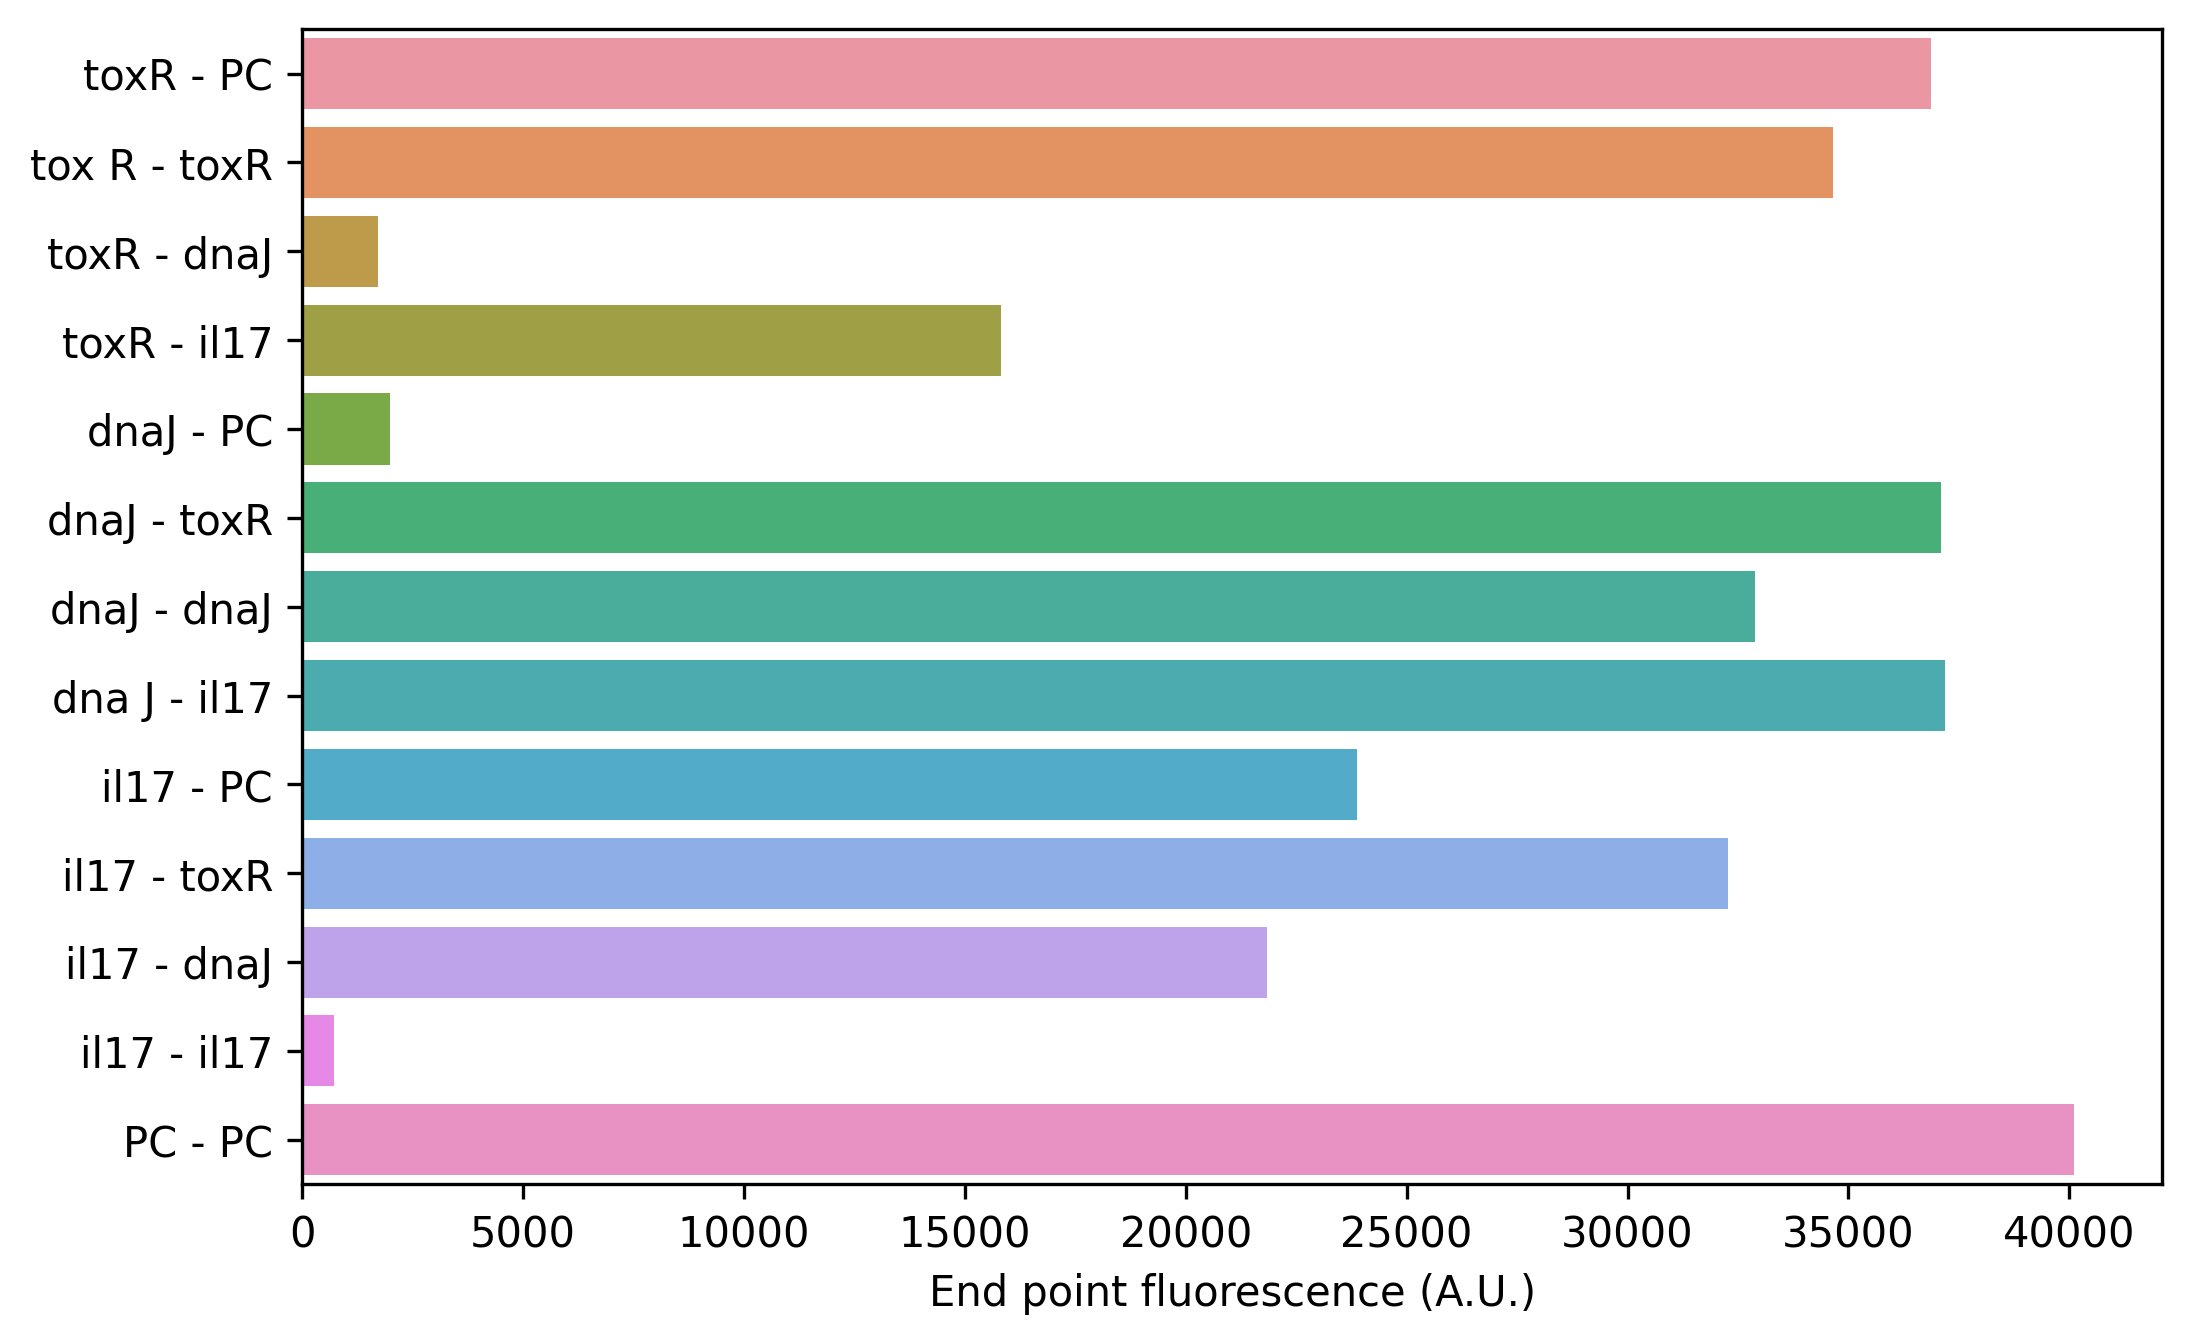

In [26]:
targ = targets.copy()

targ.drop(sd,axis=1,inplace=True)
targ.drop('Time',axis=1,inplace=True)

df = endpoint(targ)
sns.barplot(data=df, orient = 'h')
plt.xlabel('End point fluorescence (A.U.)')
#plt.savefig(path+'all_seq.png',dpi=300)
plt.show()

## Find conditions that did not work

In [8]:
df_0 = df[df ==0]
df_0 = df_0.dropna(axis=1)

list(df_0.columns)

['ToxRm10',
 'Synthetic DNA full',
 '1nM_Trigopus',
 '16s03',
 '16s04',
 '60s',
 '1nM_ToxR',
 'ToxRm4',
 'ToxRm6',
 'ToxRm8',
 '1nM_DnaJ07']

## Make a dataframe with only positive targets

In [9]:
pos_targ = targets.copy()

pos_targ.drop(df_0,axis=1,inplace=True)

pos_targ.drop(sd,axis=1,inplace=True)

pos_targ.drop('Time',axis=1,inplace=True)


pos_targ.head()

PositiveC  100nM_Trigopus        SD  Synthetic DNA  10nM_Trigopus  IL17  \
0        0.0             0.0  0.000000       0.000000            0.0   0.0   
1        0.0             0.0  0.000000       0.000000            0.0   0.0   
2        0.0             0.0  0.090476       0.000000            0.0   0.0   
3        0.0             0.0  1.211587       0.000000            0.0   0.0   
4        0.0             0.0  1.891746       0.507302            0.0   0.0   

   40s  100µM_ToxR      EF1a  DnaJ07  ...    DnaJ09  DnaJ10  flaA      ToxR  \
0  0.0    0.000000  0.000000     0.0  ...  0.000000     0.0   0.0  0.000000   
1  0.0    0.000000  0.000000     0.0  ...  0.000000     0.0   0.0  0.000000   
2  0.0    0.000000  0.000000     0.0  ...  0.000000     0.0   0.0  0.000000   
3  0.0    0.000000  0.526190     0.0  ...  0.000000     0.0   0.0  0.660476   
4  0.0    0.376825  1.000635     0.0  ...  0.193651     0.0   0.0  1.126190   

   100nM_ToxR    ToxRm1  10nM_ToxR  ToxRm2  100nM_DnaJ07  10nM_DnaJ07  
0    0.000000  0.000000        0.0     0.0           0.0          0.0  
1    0.000000  0.000000        0.0     0.0           0.0          0.0  
2    0.000000  0.000000        0.0     0.0           0.0          0.0  
3    0.000000  0.506190        0.0     0.0           0.0          0.0  
4    0.407937  1.189048        0.0     0.0           0.0          0.0  

[5 rows x 22 columns]

In [10]:
n = [x for x in pos_targ.columns if 'nM' not in x and 'µM' not in x and 'ToxRm' not in x 
     and 'DnaJ10' not in x and 'PositiveC' not in x and '40s' not in x]
print(n)

['SD', 'Synthetic DNA', 'IL17', 'EF1a', 'DnaJ07', 'Tigriopus', 'NC ', 'DnaJ09', 'flaA', 'ToxR']


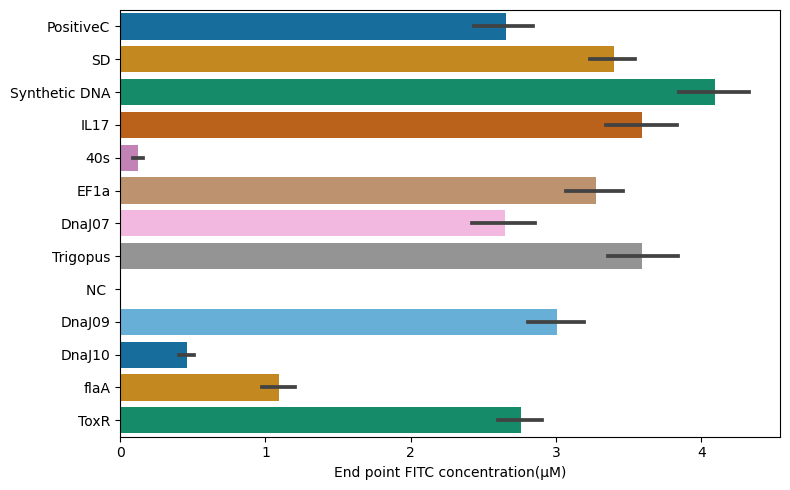

In [11]:
sns.barplot(data=pos_targ[n], orient = 'h',palette='colorblind')
plt.xlabel("End point FITC concentration(µM)")
plt.tight_layout()
plt.savefig(path+"all_pos_seq_clearer.png",dpi=300)

## Making a dataframe for presentation figure

In [11]:
targsd = targets.copy(deep = True)

m = [x for x in targsd.columns if 'nM' not in x and 'µM' not in x and 'ToxRm' not in x and 'sd' in x and 'DnaJ10' not in x
    and '40s' not in x]


targsd = targsd[m]


dfsd = pd.DataFrame(targsd.iloc[-1]).T

dfsd.drop(['16s03_sd','16s04_sd','60s_sd','Synthetic DNA full_sd','NC _sd','PositiveC_sd'],axis=1,inplace=True)

dfsd



#targets[m]

SD_sd  Synthetic DNA_sd   IL17_sd   EF1a_sd  DnaJ07_sd  Tigriopus_sd  \
96  0.99936          0.317384  0.643123  0.486105    1.00471      0.417095   

    DnaJ09_sd  flaA_sd   ToxR_sd  
96   0.458893  0.32658  0.888029

               End_Point        sd            Organism
Synthetic DNA   4.856825  0.317384  Synthetic sequence
Tigriopus       4.394127  0.417095           Tigriopus
IL17            4.379524  0.643123              Oyster
SD              3.892222  0.999360              Oyster
EF1a            3.858254  0.486105              Mussel


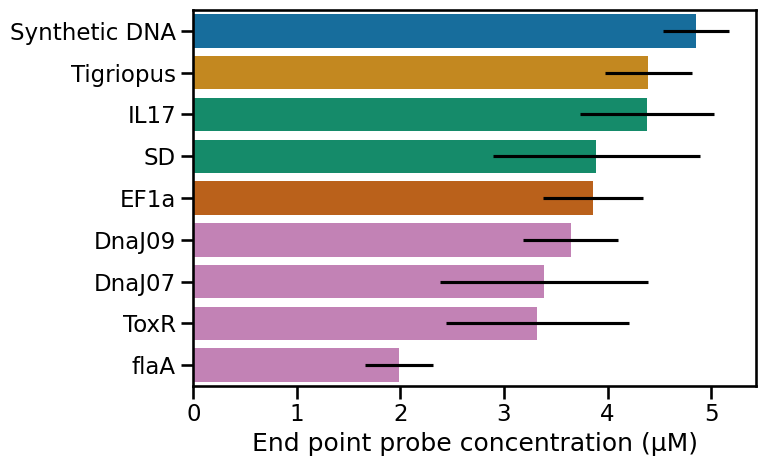

In [20]:
sns.set_context('talk')
fi = endpoint(pos_targ[n]).T

fi['sd'] = dfsd.iloc[0].values

fi['Organism'] = ['Oyster','Synthetic sequence','Oyster','Mussel',
              'V.aestuarianus','Tigriopus','V.aestuarianus',
            'V.aestuarianus','V.aestuarianus']

fi.rename(columns={0:'End_Point'},inplace=True)

fi.sort_values(by=['Organism'],inplace=True)

fi.sort_values(by=['End_Point'],inplace=True,ascending=False)

print(fi.head()) 

sns.barplot(x=fi.End_Point,y=fi.index, orient = 'h',palette='colorblind',hue=fi.Organism,dodge=False,xerr=fi.sd)
plt.xlabel('End point probe concentration (µM)')
#plt.legend(bbox_to_anchor=(0.9, 0.75),fancybox=True, shadow=True,title='Organism')
plt.tight_layout()
plt.legend('',frameon=False)
plt.savefig('../images/SHERLOCK/figure_all_targ.png',dpi=300)
plt.show()

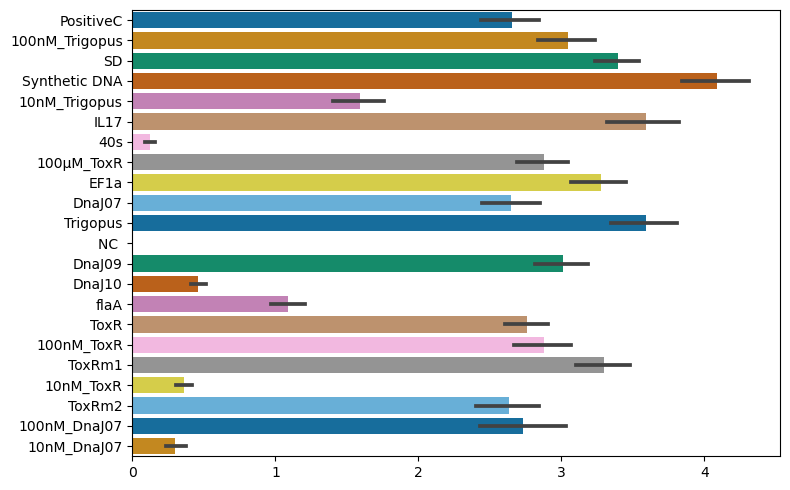

In [25]:
sns.barplot(data=pos_targ, orient = 'h',palette='colorblind')
plt.tight_layout()
#plt.savefig(path+"all_pos_seq.png",dpi=300)

## ToxR mutation

['ToxR', 'ToxRm1_sd', 'ToxRm2_sd', 'ToxRm4_sd', 'ToxRm6_sd', 'ToxRm8_sd', 'ToxRm10_sd']
['ToxR', 'ToxRm1', 'ToxRm2', 'ToxRm4', 'ToxRm6', 'ToxRm8', 'ToxRm10']


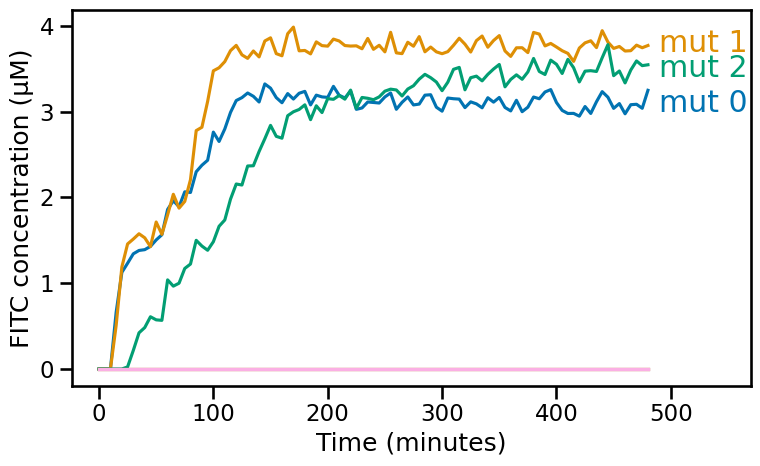

In [47]:
sns.set_context('talk')

tox = [x for x in targets if "ToxRm" in x and "ToxR" in x and "_sd" not in x]
tox.insert(0,'ToxR')
#print(tox)
#tox.pop()

sd_tox = [x for x in targets if "ToxR" in x and "ToxRm" in x and "_sd" in x ]
sd_tox.insert(0,'ToxR')
sd_tox = sorted(sd_tox,key=len)
print(sd_tox)
#sd_tox.pop(0)

counter = 0 

print(sorted(tox,key=len))

for i in sorted(tox,key=len):
    sns.lineplot(targets.Time,targets[i])
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_tox[counter]],label=i)
    counter+=1 
    
plt.ylabel("FITC concentration (µM)")
plt.xlabel("Time (minutes)")

plt.text(490,3,'mut 0', color = sns.color_palette('colorblind')[0],fontsize='large')
plt.text(490,3.7,'mut 1', color = sns.color_palette('colorblind')[1],fontsize='large')
plt.text(490,3.4,'mut 2', color = sns.color_palette('colorblind')[2],fontsize='large')


#plt.legend(['ToxR','m1','m2','m4','m6','m8','m10'],bbox_to_anchor=(0.9, 0.4),shadow=True)
plt.xlim(-24.0, 570.0)
plt.tight_layout()
plt.savefig(path+'mutation.png',dpi=300)
plt.show()


## Dilutions

### ToxR

['100µM_ToxR', '100nM_ToxR', '10nM_ToxR', '1nM_ToxR']
['100µM_ToxR_sd', '100nM_ToxR_sd', '10nM_ToxR_sd', '1nM_ToxR_sd']


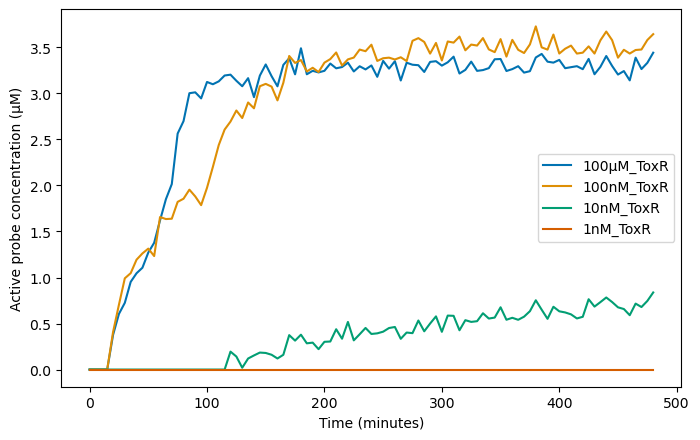

In [33]:
tox = [x for x in targets if "ToxR" in x and "ToxRm" not in x and "_sd" not in x and 'ToxR_f' not in x]
print(tox)

sd_tox = [x for x in targets if "ToxR" in x and "ToxRm" not in x and "sd" in x and 'ToxR_f' not in x ]
print(sd_tox)

counter = 0 

for i in tox:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_tox[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
#plt.savefig(path+'toxR_dilution.png',dpi=300)
plt.show()

### DNAJ

['DnaJ07', '100nM_DnaJ07', '10nM_DnaJ07', '1nM_DnaJ07']
['DnaJ07_sd', '100nM_DnaJ07_sd', '10nM_DnaJ07_sd', '1nM_DnaJ07_sd']


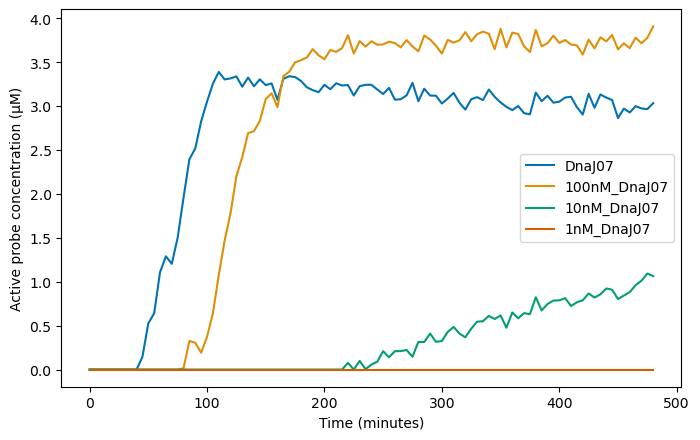

In [36]:
dnaj = [x for x in targets if "DnaJ07" in x  and "_sd" not in x ]
print(dnaj)

sd_dnaj = [x for x in targets if "DnaJ07" in x  and "_sd" in x]
print(sd_dnaj)

counter = 0 

for i in dnaj:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_dnaj[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
plt.savefig(path+'DnaJ_dilution.png',dpi=300)
plt.show()

### Trigriopus

['100nM_Trigopus', '10nM_Trigopus', '1nM_Trigopus', 'Trigopus']
['100nM_Trigopus_sd', '10nM_Trigopus_sd', '1nM_Trigopus_sd', 'Trigopus_sd']


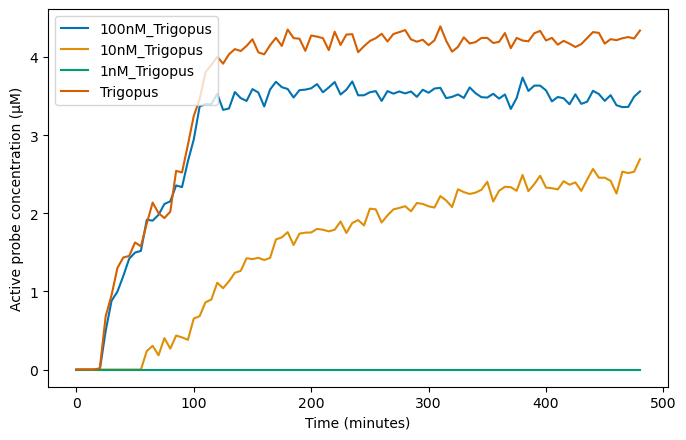

In [39]:
trigopus = [x for x in targets if "Trigopus" in x  and "_sd" not in x ]
print(trigopus)

sd_trigopus = [x for x in targets if "Trigopus" in x  and "_sd" in x]
print(sd_trigopus)

counter = 0 

for i in trigopus:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_trigopus[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
plt.savefig(path+'trigopus_dilution.png',dpi=300)
plt.show()

## Look at individual curves

In [7]:
trip = px.excelreader('../results/SHERLOCK/all_targets/220920_sherlock.xlsx',70,"YES")

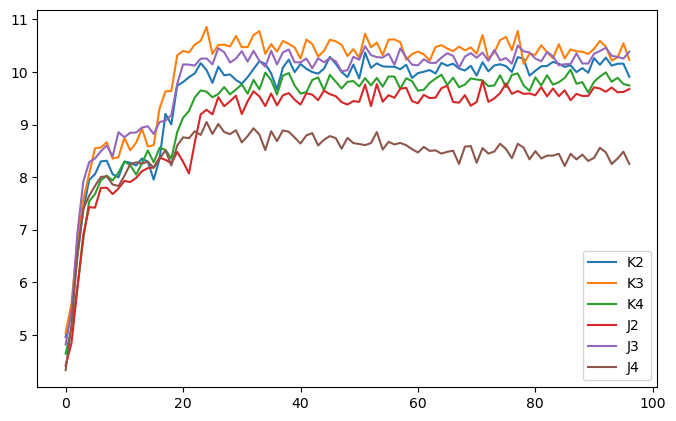

In [37]:
trip[['K2', 'K3', 'K4','J2', 'J3', 'J4']].plot()

#plt.title('ToxR')
plt.legend()
#plt.savefig(path+'ali_2.png',dpi=300)
plt.show()


## Export dataframe 

In [5]:
#pos_targ.to_csv('../results/SHERLOCK/all_targets/pos_targets.csv')